In [3]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix

###################################################################################################

# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())


with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())

with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())

pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

###################################################################################################
# Nettoyage

# Spam removable 
pdAvis['review_length'] = pdAvis['comment'].str.len()
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]
#Duplicates removable
pdAvis.drop_duplicates(subset=['author','title_review','note','title','comment'], inplace=True)
pdJeux.drop_duplicates(subset=['title',	'href','avis'], inplace=True)


allgames = sorted(pdJeux["title"].unique())
allusers = sorted(pdAvis['author'].unique())


# Création de la dataFrame  
ratings_matrix = pd.DataFrame(
    index=allusers,
    columns=allgames,
    dtype=float
)

# Remplissage de la matrice avec les notes
for _, row in pdAvis.iterrows():
    ratings_matrix.at[row['author'], row['title']] = row['note']




In [4]:
mask = ~ratings_matrix.isna()
sparse_ratings_matrix = csr_matrix(
    (
        ratings_matrix.values[mask], 
        np.where(mask)
    ),
    shape=ratings_matrix.shape
)

In [6]:
sparse_ratings_matrix

<13623x16366 sparse matrix of type '<class 'numpy.float64'>'
	with 176070 stored elements in Compressed Sparse Row format>


Filtering with min_ratings (min users,min games) = (10,10)
Iteration 0: 2849 users, 3471 games, 130627 ratings, KL-div: 0.0015
Iteration 1: 2622 users, 3103 games, 126067 ratings, KL-div: 0.0019
Iteration 2: 2570 users, 3060 games, 125225 ratings, KL-div: 0.0019
Iteration 3: 2562 users, 3053 games, 125091 ratings, KL-div: 0.0019
Iteration 4: 2561 users, 3052 games, 125073 ratings, KL-div: 0.0019
Converged after 5 iterations!
Number of users removed: 11062
Number of games removed: 13314


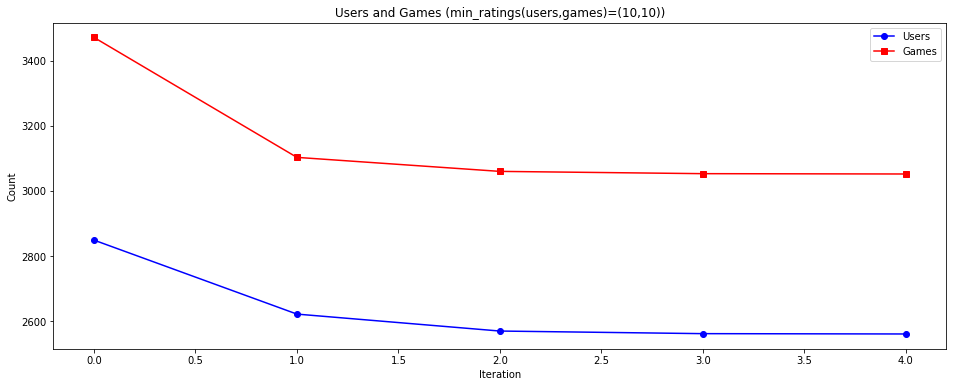

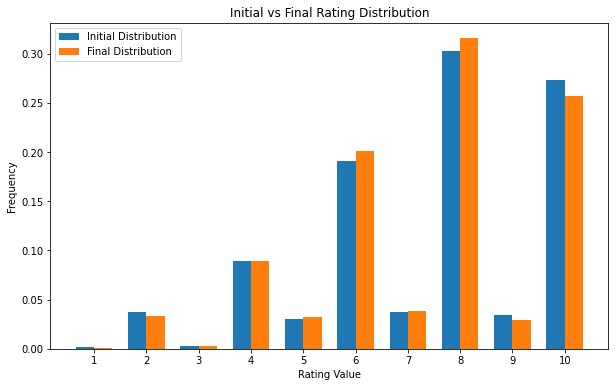


Filtering with min_ratings (min users,min games) = (11,10)
Iteration 0: 2621 users, 3471 games, 128619 ratings, KL-div: 0.0017
Iteration 1: 2426 users, 3066 games, 123829 ratings, KL-div: 0.0021
Iteration 2: 2384 users, 3034 games, 123142 ratings, KL-div: 0.0021
Iteration 3: 2379 users, 3025 games, 123011 ratings, KL-div: 0.0021
Converged after 4 iterations!
Number of users removed: 11244
Number of games removed: 13341


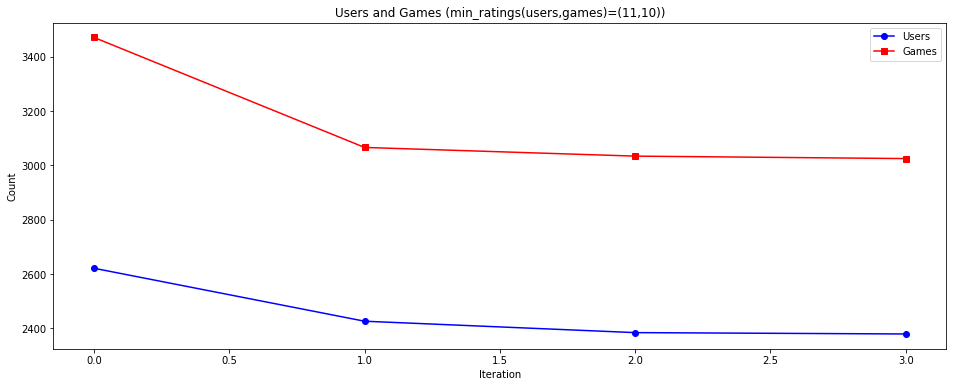

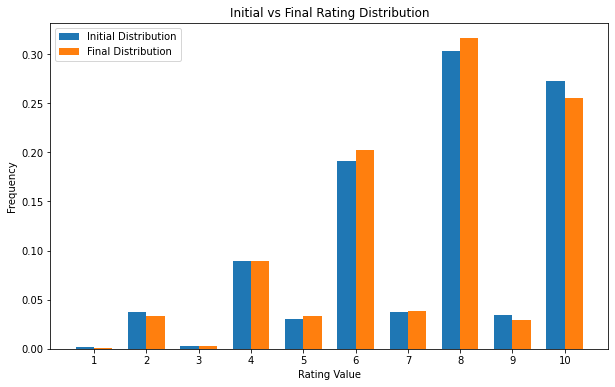


Filtering with min_ratings (min users,min games) = (12,10)
Iteration 0: 2470 users, 3471 games, 127139 ratings, KL-div: 0.0018
Iteration 1: 2293 users, 3046 games, 122232 ratings, KL-div: 0.0022
Iteration 2: 2241 users, 3019 games, 121440 ratings, KL-div: 0.0023
Iteration 3: 2240 users, 3007 games, 121321 ratings, KL-div: 0.0023
Iteration 4: 2238 users, 3007 games, 121299 ratings, KL-div: 0.0023
Iteration 5: 2238 users, 3006 games, 121290 ratings, KL-div: 0.0023
Converged after 6 iterations!
Number of users removed: 11385
Number of games removed: 13360


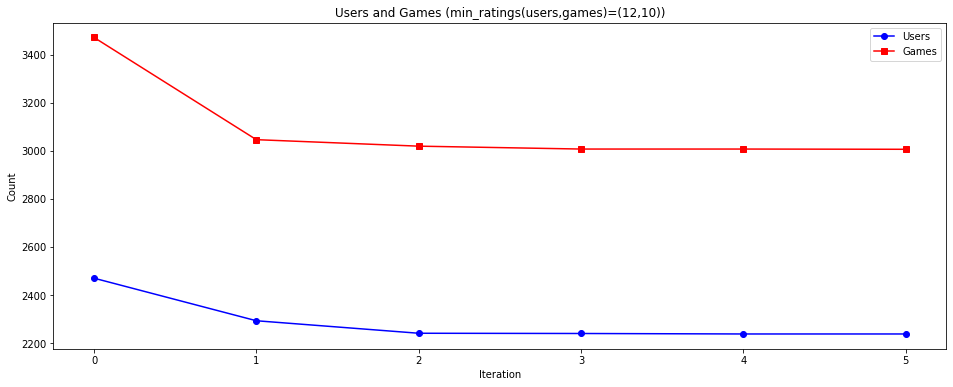

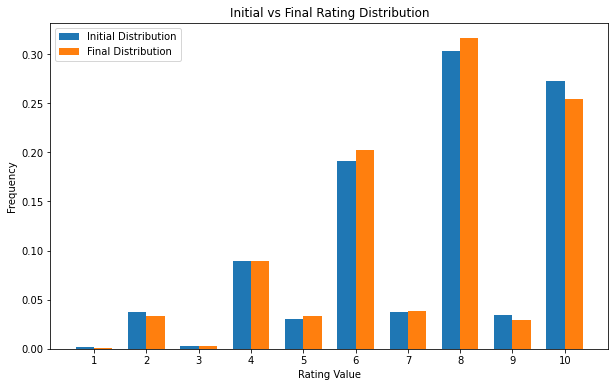


Filtering with min_ratings (min users,min games) = (13,10)
Iteration 0: 2337 users, 3471 games, 125708 ratings, KL-div: 0.0020
Iteration 1: 2150 users, 3029 games, 120417 ratings, KL-div: 0.0024
Iteration 2: 2101 users, 2992 games, 119519 ratings, KL-div: 0.0025
Iteration 3: 2098 users, 2980 games, 119376 ratings, KL-div: 0.0025
Iteration 4: 2098 users, 2978 games, 119358 ratings, KL-div: 0.0025
Iteration 5: 2097 users, 2978 games, 119346 ratings, KL-div: 0.0025
Iteration 6: 2097 users, 2977 games, 119337 ratings, KL-div: 0.0025
Converged after 7 iterations!
Number of users removed: 11526
Number of games removed: 13389


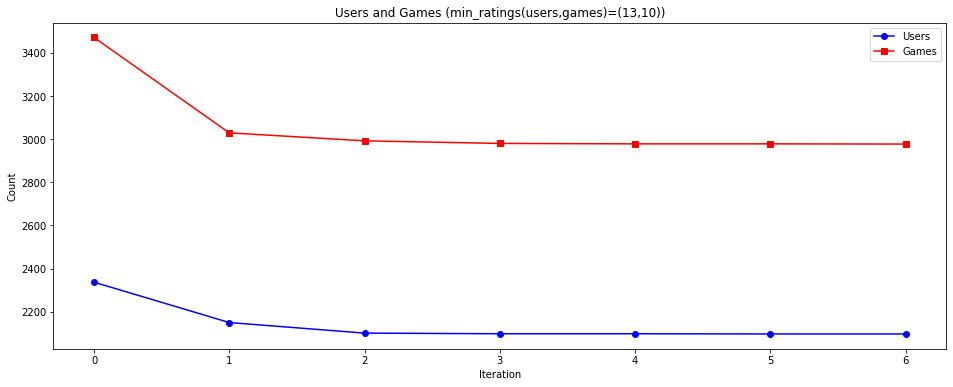

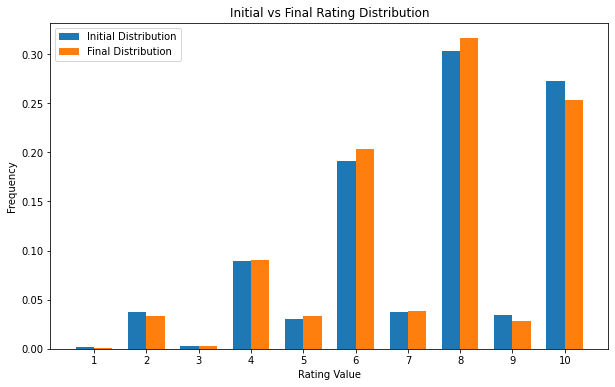


Filtering with min_ratings (min users,min games) = (14,10)
Iteration 0: 2204 users, 3471 games, 124150 ratings, KL-div: 0.0022
Iteration 1: 2022 users, 3013 games, 118672 ratings, KL-div: 0.0027
Iteration 2: 1979 users, 2967 games, 117714 ratings, KL-div: 0.0028
Iteration 3: 1972 users, 2960 games, 117560 ratings, KL-div: 0.0028
Iteration 4: 1970 users, 2956 games, 117498 ratings, KL-div: 0.0028
Converged after 5 iterations!
Number of users removed: 11653
Number of games removed: 13410


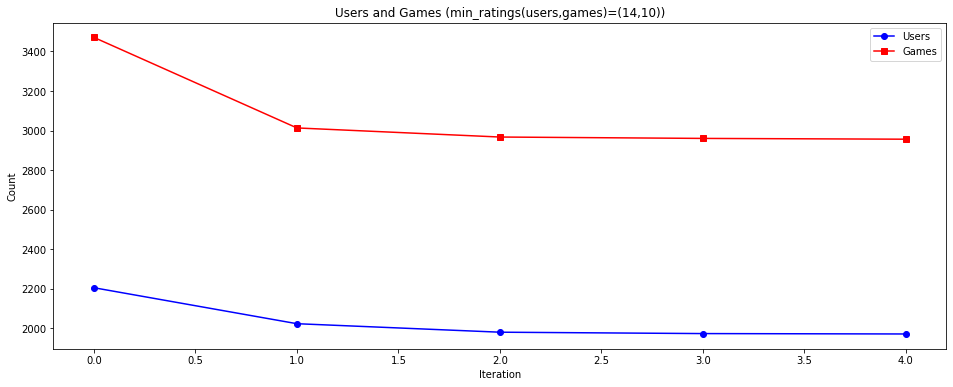

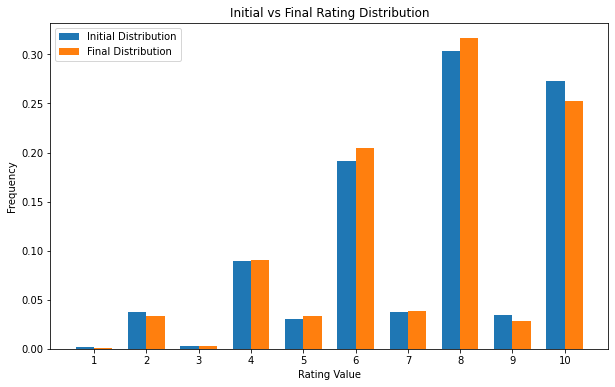


Filtering with min_ratings (min users,min games) = (15,10)
Iteration 0: 2071 users, 3471 games, 122490 ratings, KL-div: 0.0024
Iteration 1: 1918 users, 2986 games, 117011 ratings, KL-div: 0.0028
Iteration 2: 1869 users, 2951 games, 116040 ratings, KL-div: 0.0030
Iteration 3: 1868 users, 2938 games, 115909 ratings, KL-div: 0.0030
Iteration 4: 1867 users, 2938 games, 115895 ratings, KL-div: 0.0030
Iteration 5: 1867 users, 2937 games, 115886 ratings, KL-div: 0.0030
Converged after 6 iterations!
Number of users removed: 11756
Number of games removed: 13429


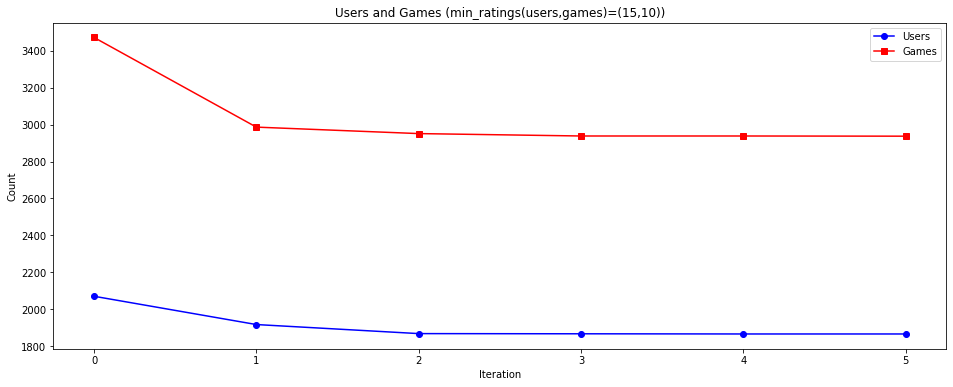

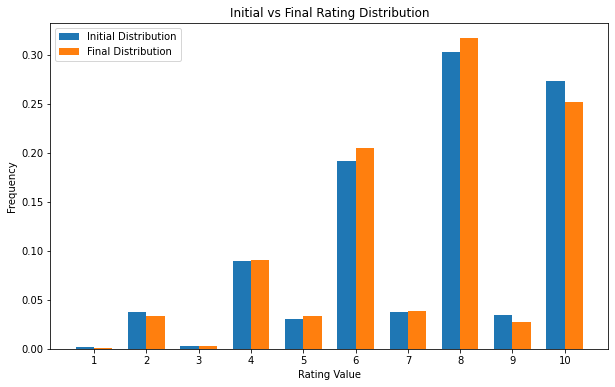


Filtering with min_ratings (min users,min games) = (16,10)
Iteration 0: 1975 users, 3471 games, 121173 ratings, KL-div: 0.0026
Iteration 1: 1817 users, 2974 games, 115437 ratings, KL-div: 0.0030
Iteration 2: 1762 users, 2932 games, 114268 ratings, KL-div: 0.0032
Iteration 3: 1758 users, 2905 games, 113966 ratings, KL-div: 0.0032
Iteration 4: 1753 users, 2904 games, 113882 ratings, KL-div: 0.0032
Iteration 5: 1753 users, 2903 games, 113873 ratings, KL-div: 0.0032
Converged after 6 iterations!
Number of users removed: 11870
Number of games removed: 13463


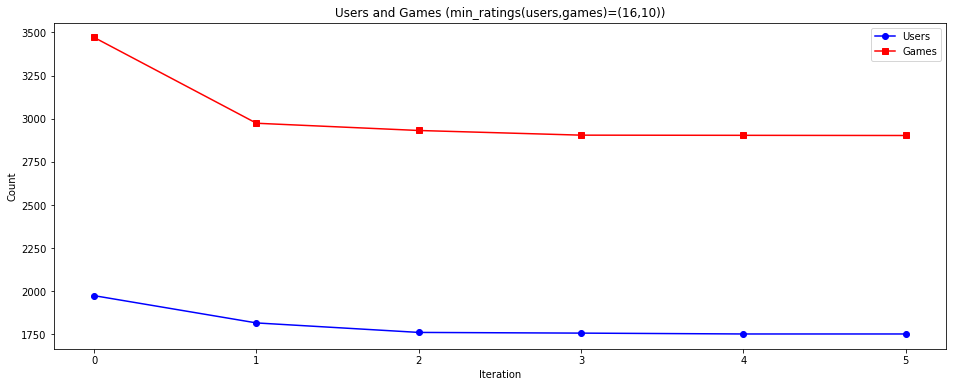

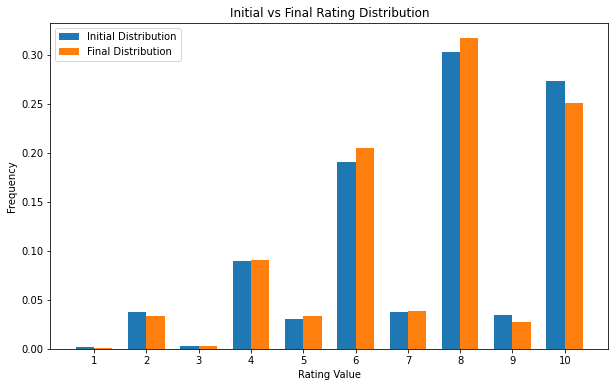


Filtering with min_ratings (min users,min games) = (18,10)
Iteration 0: 1794 users, 3471 games, 118499 ratings, KL-div: 0.0030
Iteration 1: 1642 users, 2935 games, 112333 ratings, KL-div: 0.0035
Iteration 2: 1598 users, 2874 games, 111081 ratings, KL-div: 0.0036
Iteration 3: 1592 users, 2858 games, 110835 ratings, KL-div: 0.0037
Iteration 4: 1590 users, 2854 games, 110765 ratings, KL-div: 0.0037
Iteration 5: 1590 users, 2852 games, 110747 ratings, KL-div: 0.0037
Converged after 6 iterations!
Number of users removed: 12033
Number of games removed: 13514


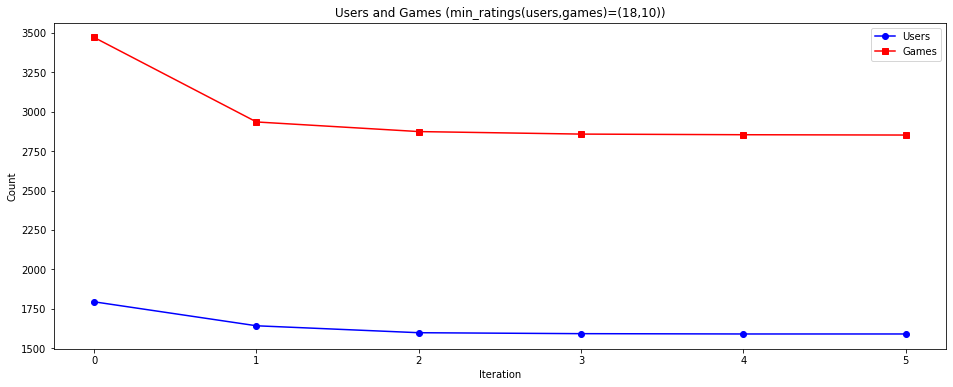

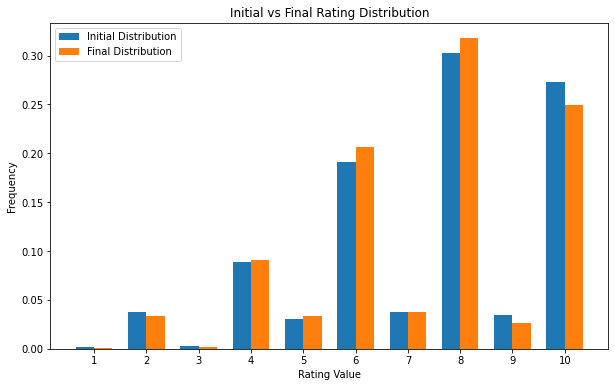


Filtering with min_ratings (min users,min games) = (20,10)
Iteration 0: 1631 users, 3471 games, 115853 ratings, KL-div: 0.0034
Iteration 1: 1511 users, 2887 games, 109584 ratings, KL-div: 0.0040
Iteration 2: 1460 users, 2839 games, 108227 ratings, KL-div: 0.0043
Iteration 3: 1457 users, 2806 games, 107875 ratings, KL-div: 0.0044
Iteration 4: 1453 users, 2805 games, 107790 ratings, KL-div: 0.0045
Converged after 5 iterations!
Number of users removed: 12170
Number of games removed: 13561


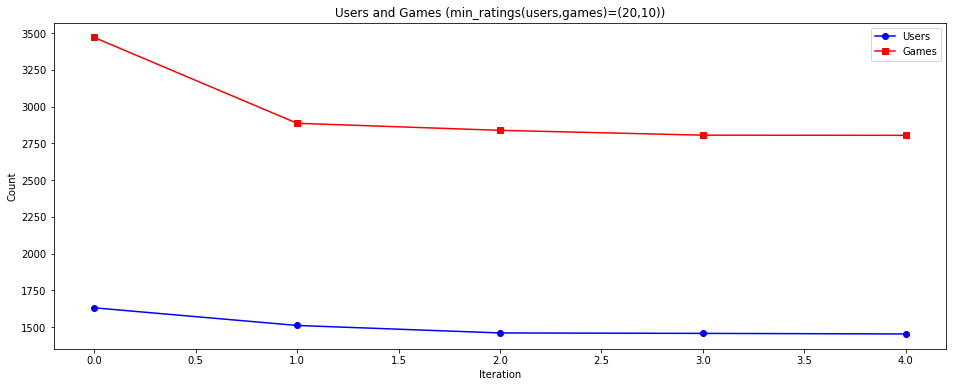

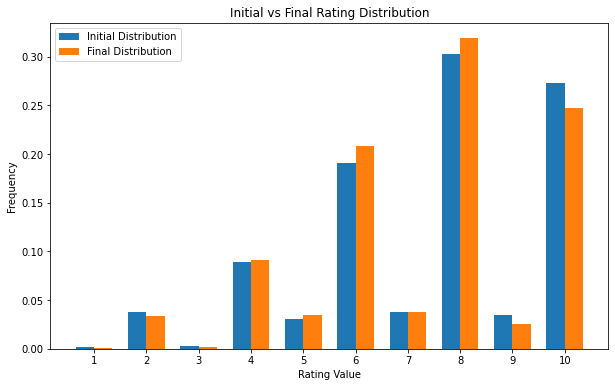


Filtering with min_ratings (min users,min games) = (22,10)
Iteration 0: 1520 users, 3471 games, 113747 ratings, KL-div: 0.0039
Iteration 1: 1397 users, 2859 games, 107119 ratings, KL-div: 0.0046
Iteration 2: 1351 users, 2785 games, 105532 ratings, KL-div: 0.0048
Iteration 3: 1346 users, 2764 games, 105240 ratings, KL-div: 0.0049
Iteration 4: 1343 users, 2759 games, 105133 ratings, KL-div: 0.0049
Iteration 5: 1342 users, 2757 games, 105094 ratings, KL-div: 0.0049
Iteration 6: 1342 users, 2754 games, 105067 ratings, KL-div: 0.0049
Converged after 7 iterations!
Number of users removed: 12281
Number of games removed: 13612


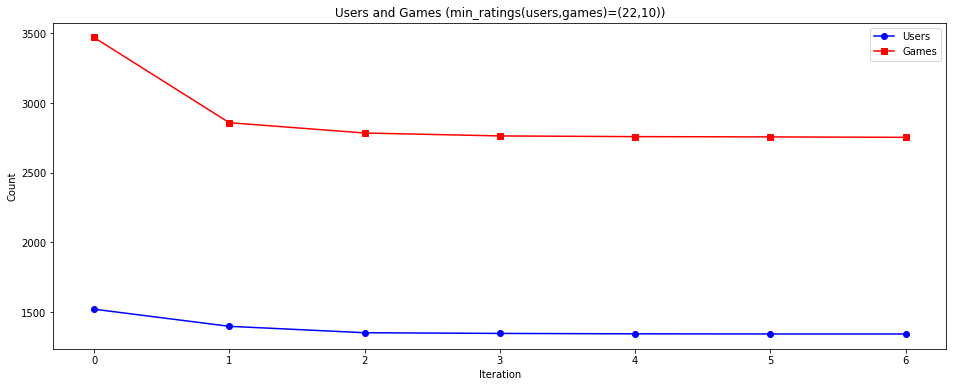

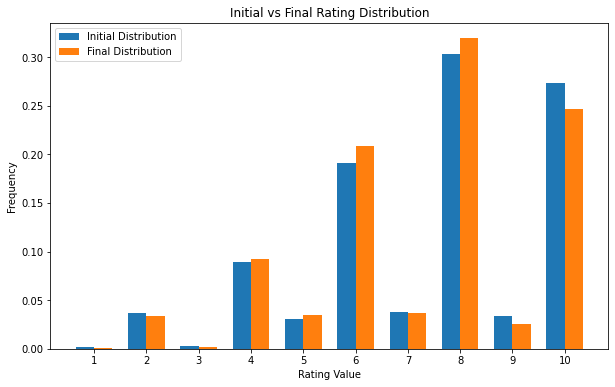


Filtering with min_ratings (min users,min games) = (25,10)
Iteration 0: 1372 users, 3471 games, 110713 ratings, KL-div: 0.0044
Iteration 1: 1260 users, 2801 games, 103629 ratings, KL-div: 0.0050
Iteration 2: 1219 users, 2735 games, 102100 ratings, KL-div: 0.0052
Iteration 3: 1210 users, 2706 games, 101625 ratings, KL-div: 0.0053
Iteration 4: 1208 users, 2703 games, 101550 ratings, KL-div: 0.0053
Converged after 5 iterations!
Number of users removed: 12415
Number of games removed: 13663


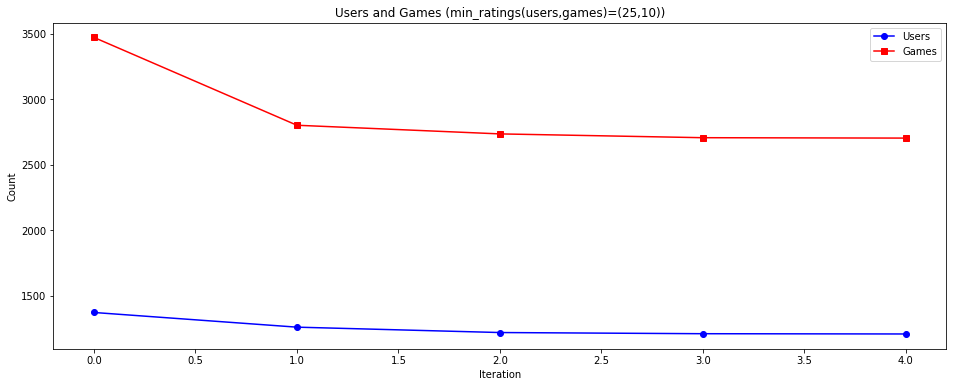

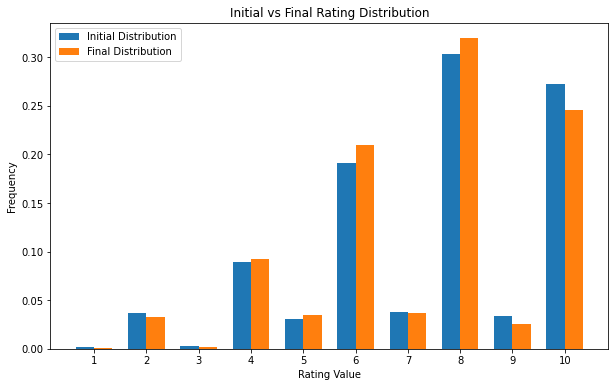


Filtering with min_ratings (min users,min games) = (10,11)
Iteration 0: 2849 users, 3274 games, 128948 ratings, KL-div: 0.0015
Iteration 1: 2601 users, 2914 games, 124038 ratings, KL-div: 0.0019
Iteration 2: 2541 users, 2875 games, 123123 ratings, KL-div: 0.0020
Iteration 3: 2535 users, 2868 games, 123001 ratings, KL-div: 0.0020
Iteration 4: 2534 users, 2868 games, 122992 ratings, KL-div: 0.0020
Converged after 5 iterations!
Number of users removed: 11089
Number of games removed: 13498


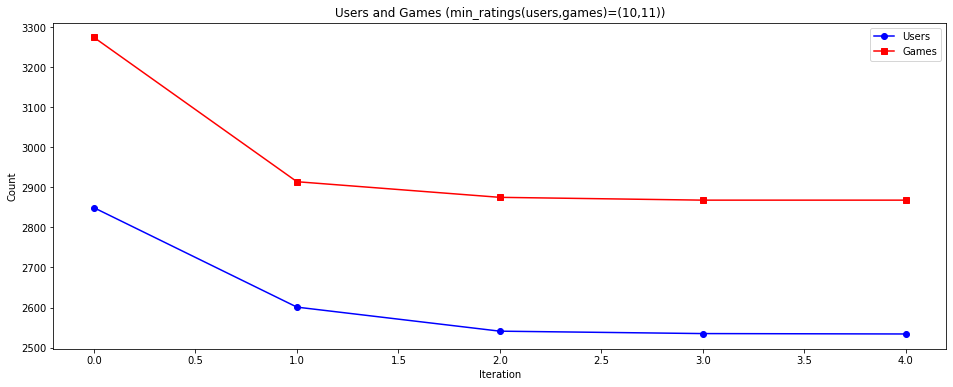

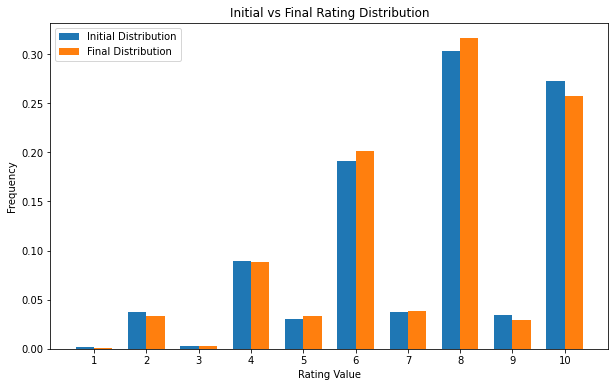


Filtering with min_ratings (min users,min games) = (11,11)
Iteration 0: 2621 users, 3274 games, 126965 ratings, KL-div: 0.0017
Iteration 1: 2416 users, 2888 games, 121995 ratings, KL-div: 0.0021
Iteration 2: 2368 users, 2854 games, 121193 ratings, KL-div: 0.0021
Iteration 3: 2363 users, 2847 games, 121073 ratings, KL-div: 0.0021
Iteration 4: 2361 users, 2846 games, 121043 ratings, KL-div: 0.0021
Converged after 5 iterations!
Number of users removed: 11262
Number of games removed: 13520


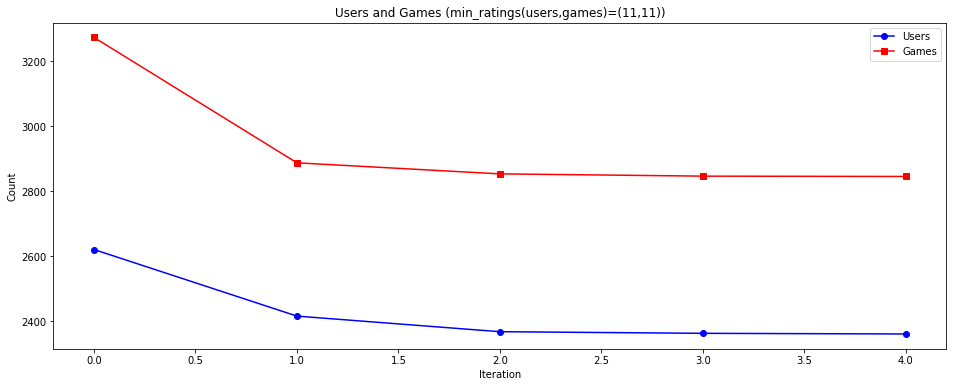

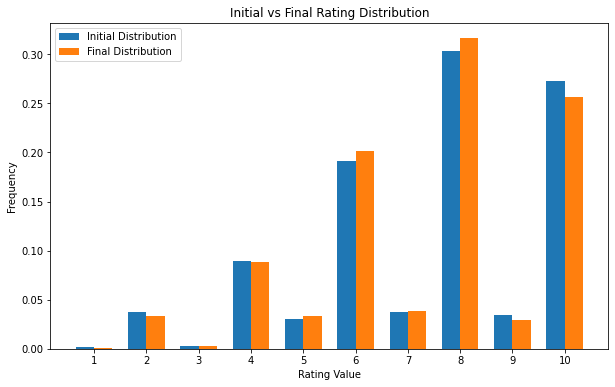


Filtering with min_ratings (min users,min games) = (12,11)
Iteration 0: 2470 users, 3274 games, 125492 ratings, KL-div: 0.0018
Iteration 1: 2281 users, 2874 games, 120419 ratings, KL-div: 0.0022
Iteration 2: 2218 users, 2831 games, 119322 ratings, KL-div: 0.0023
Iteration 3: 2215 users, 2817 games, 119151 ratings, KL-div: 0.0023
Iteration 4: 2214 users, 2816 games, 119130 ratings, KL-div: 0.0023
Converged after 5 iterations!
Number of users removed: 11409
Number of games removed: 13550


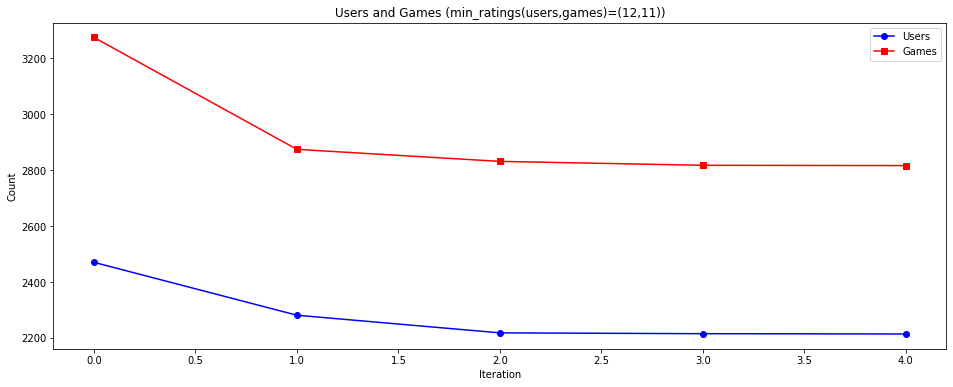

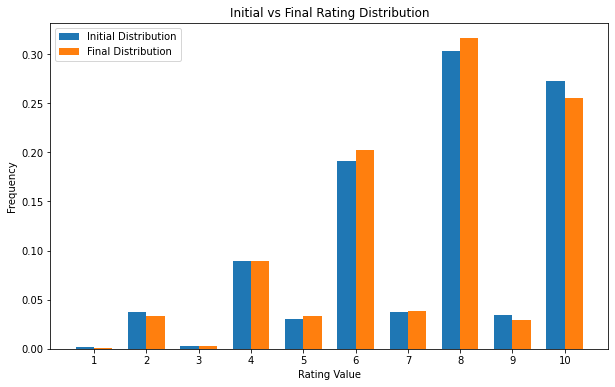


Filtering with min_ratings (min users,min games) = (13,11)
Iteration 0: 2337 users, 3274 games, 124075 ratings, KL-div: 0.0020
Iteration 1: 2136 users, 2845 games, 118455 ratings, KL-div: 0.0024
Iteration 2: 2087 users, 2800 games, 117446 ratings, KL-div: 0.0025
Iteration 3: 2077 users, 2792 games, 117247 ratings, KL-div: 0.0025
Iteration 4: 2077 users, 2789 games, 117217 ratings, KL-div: 0.0026
Iteration 5: 2076 users, 2789 games, 117205 ratings, KL-div: 0.0026
Converged after 6 iterations!
Number of users removed: 11547
Number of games removed: 13577


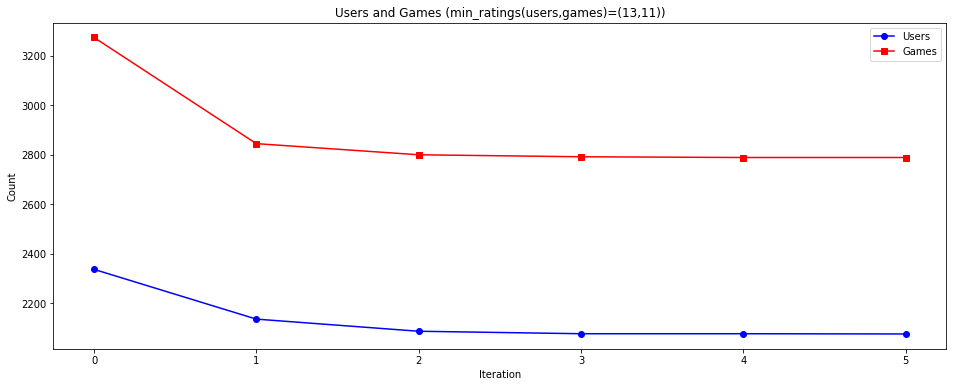

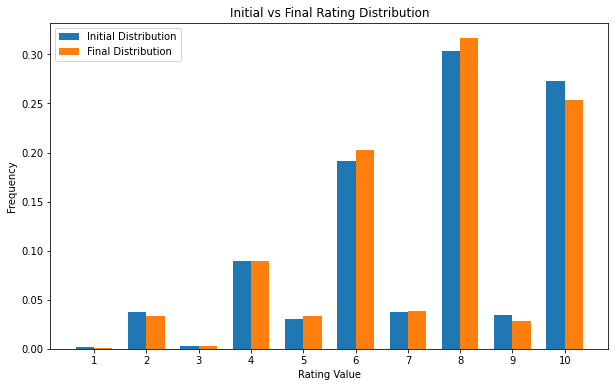


Filtering with min_ratings (min users,min games) = (14,11)
Iteration 0: 2204 users, 3274 games, 122531 ratings, KL-div: 0.0021
Iteration 1: 2009 users, 2828 games, 116695 ratings, KL-div: 0.0027
Iteration 2: 1953 users, 2775 games, 115468 ratings, KL-div: 0.0029
Iteration 3: 1945 users, 2759 games, 115205 ratings, KL-div: 0.0029
Iteration 4: 1943 users, 2758 games, 115169 ratings, KL-div: 0.0029
Converged after 5 iterations!
Number of users removed: 11680
Number of games removed: 13608


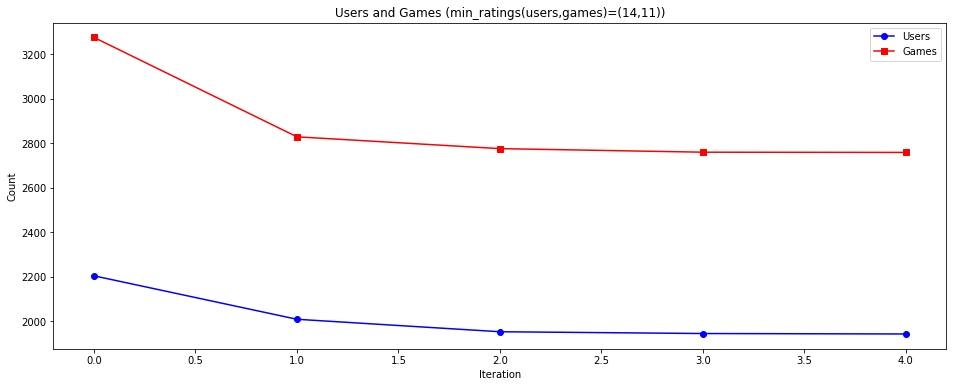

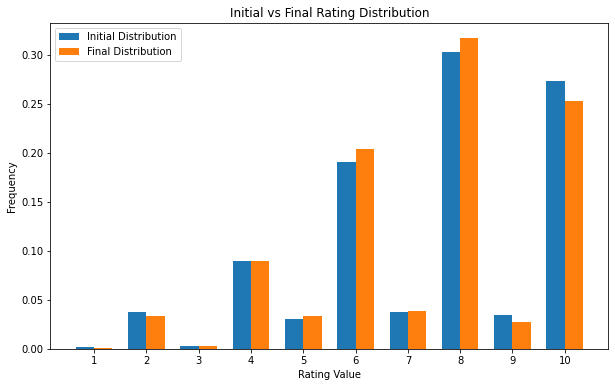


Filtering with min_ratings (min users,min games) = (15,11)
Iteration 0: 2071 users, 3274 games, 120881 ratings, KL-div: 0.0023
Iteration 1: 1899 users, 2800 games, 114938 ratings, KL-div: 0.0029
Iteration 2: 1846 users, 2749 games, 113720 ratings, KL-div: 0.0031
Iteration 3: 1840 users, 2732 games, 113470 ratings, KL-div: 0.0031
Iteration 4: 1836 users, 2732 games, 113414 ratings, KL-div: 0.0032
Iteration 5: 1836 users, 2729 games, 113384 ratings, KL-div: 0.0031
Converged after 6 iterations!
Number of users removed: 11787
Number of games removed: 13637


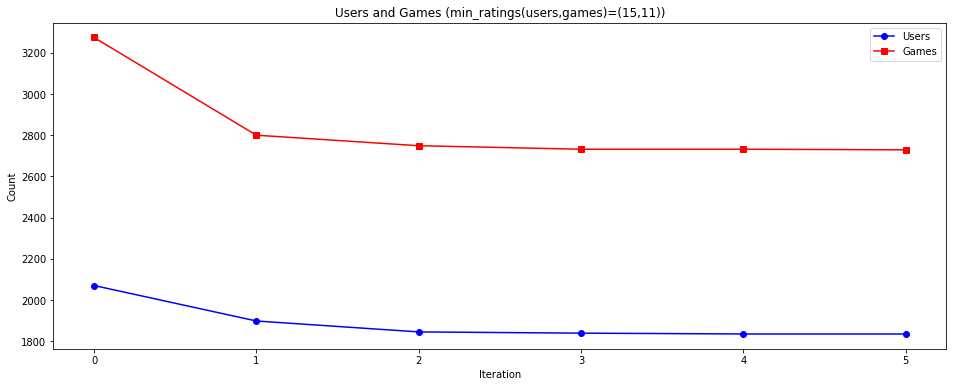

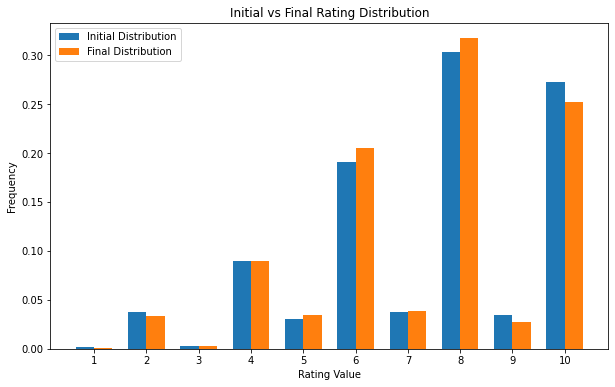


Filtering with min_ratings (min users,min games) = (16,11)
Iteration 0: 1975 users, 3274 games, 119571 ratings, KL-div: 0.0025
Iteration 1: 1796 users, 2783 games, 113274 ratings, KL-div: 0.0031
Iteration 2: 1733 users, 2722 games, 111770 ratings, KL-div: 0.0034
Iteration 3: 1728 users, 2707 games, 111547 ratings, KL-div: 0.0034
Iteration 4: 1724 users, 2705 games, 111467 ratings, KL-div: 0.0034
Converged after 5 iterations!
Number of users removed: 11899
Number of games removed: 13661


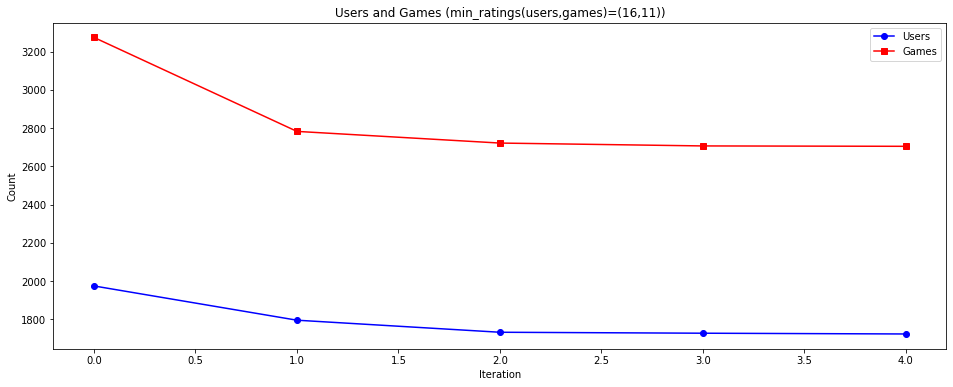

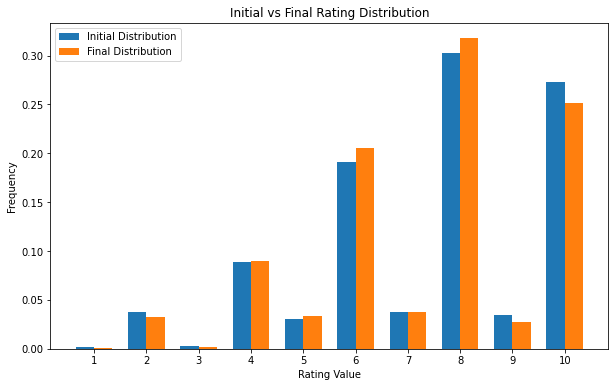


Filtering with min_ratings (min users,min games) = (18,11)
Iteration 0: 1794 users, 3274 games, 116929 ratings, KL-div: 0.0029
Iteration 1: 1629 users, 2736 games, 110202 ratings, KL-div: 0.0037
Iteration 2: 1579 users, 2682 games, 108861 ratings, KL-div: 0.0039
Iteration 3: 1573 users, 2665 games, 108592 ratings, KL-div: 0.0039
Iteration 4: 1570 users, 2662 games, 108511 ratings, KL-div: 0.0039
Iteration 5: 1570 users, 2660 games, 108491 ratings, KL-div: 0.0039
Iteration 6: 1569 users, 2660 games, 108474 ratings, KL-div: 0.0039
Converged after 7 iterations!
Number of users removed: 12054
Number of games removed: 13706


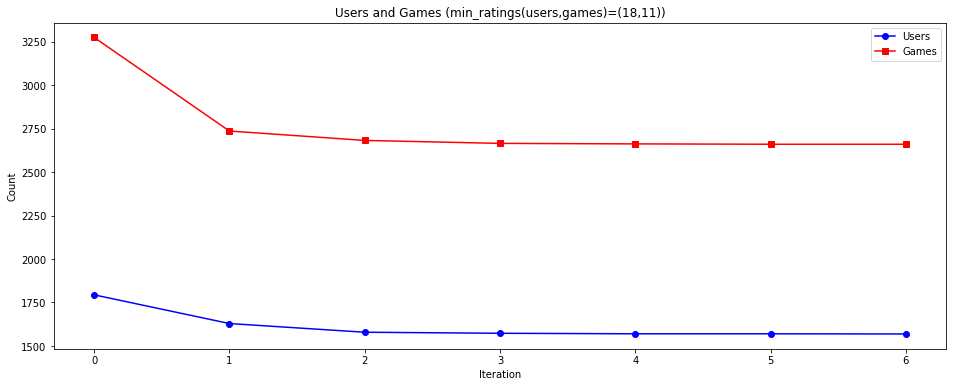

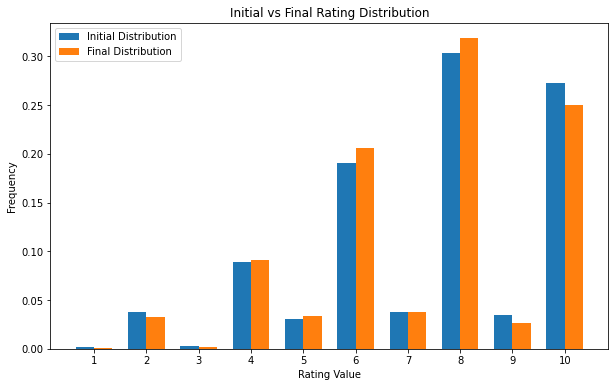


Filtering with min_ratings (min users,min games) = (20,11)
Iteration 0: 1631 users, 3274 games, 114319 ratings, KL-div: 0.0033
Iteration 1: 1495 users, 2696 games, 107441 ratings, KL-div: 0.0041
Iteration 2: 1443 users, 2643 games, 105983 ratings, KL-div: 0.0045
Iteration 3: 1436 users, 2628 games, 105704 ratings, KL-div: 0.0045
Iteration 4: 1431 users, 2624 games, 105569 ratings, KL-div: 0.0046
Iteration 5: 1431 users, 2619 games, 105519 ratings, KL-div: 0.0045
Iteration 6: 1429 users, 2619 games, 105481 ratings, KL-div: 0.0046
Iteration 7: 1429 users, 2618 games, 105471 ratings, KL-div: 0.0046
Converged after 8 iterations!
Number of users removed: 12194
Number of games removed: 13748


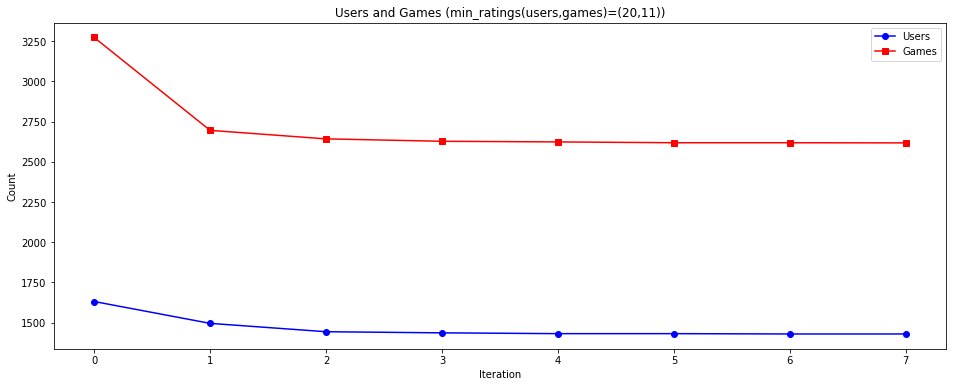

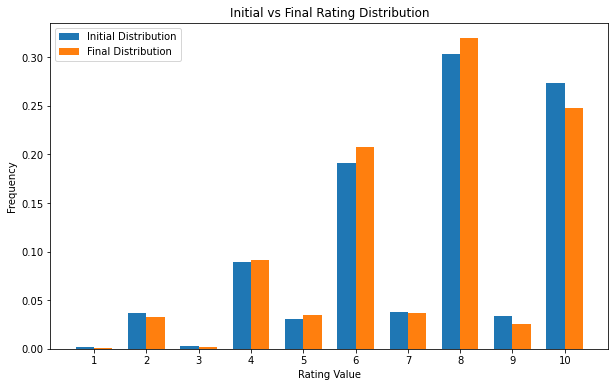


Filtering with min_ratings (min users,min games) = (22,11)
Iteration 0: 1520 users, 3274 games, 112233 ratings, KL-div: 0.0038
Iteration 1: 1390 users, 2653 games, 104994 ratings, KL-div: 0.0046
Iteration 2: 1329 users, 2607 games, 103320 ratings, KL-div: 0.0049
Iteration 3: 1322 users, 2575 games, 102860 ratings, KL-div: 0.0049
Iteration 4: 1321 users, 2569 games, 102779 ratings, KL-div: 0.0049
Iteration 5: 1319 users, 2568 games, 102727 ratings, KL-div: 0.0049
Converged after 6 iterations!
Number of users removed: 12304
Number of games removed: 13798


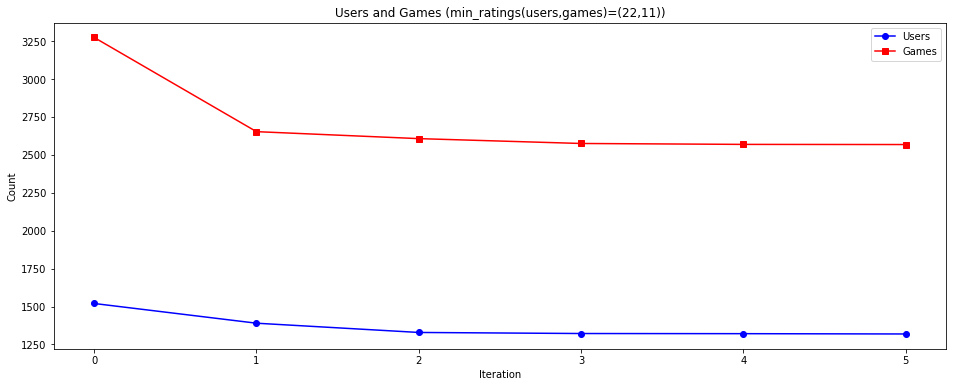

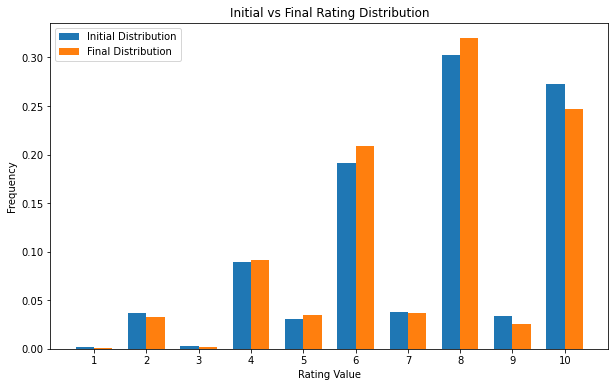


Filtering with min_ratings (min users,min games) = (25,11)
Iteration 0: 1372 users, 3274 games, 109231 ratings, KL-div: 0.0042
Iteration 1: 1253 users, 2608 games, 101610 ratings, KL-div: 0.0050
Iteration 2: 1198 users, 2551 games, 99786 ratings, KL-div: 0.0054
Iteration 3: 1186 users, 2515 games, 99146 ratings, KL-div: 0.0056
Iteration 4: 1184 users, 2513 games, 99078 ratings, KL-div: 0.0056
Iteration 5: 1184 users, 2511 games, 99058 ratings, KL-div: 0.0056
Converged after 6 iterations!
Number of users removed: 12439
Number of games removed: 13855


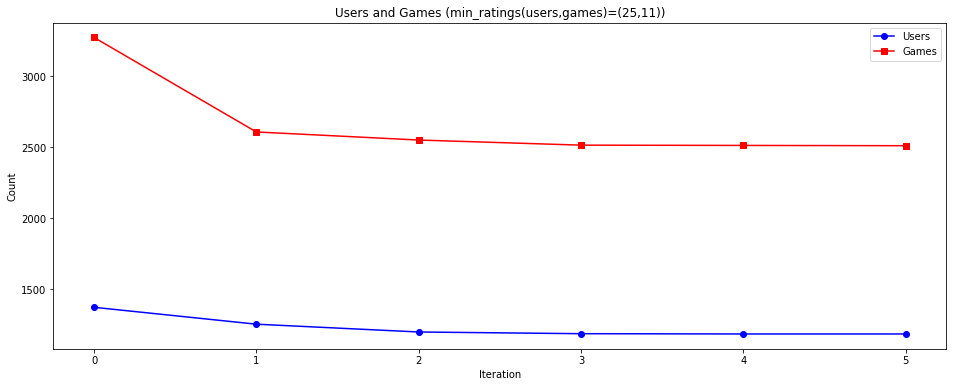

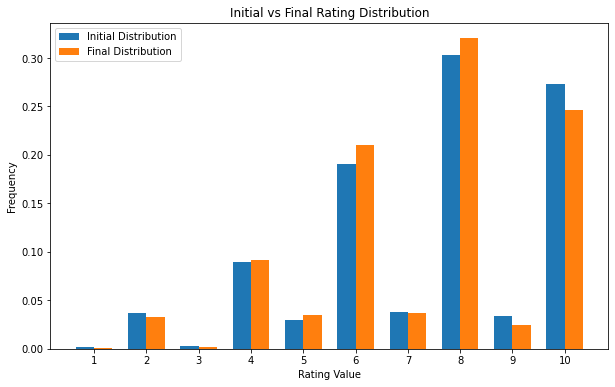


Filtering with min_ratings (min users,min games) = (10,12)
Iteration 0: 2849 users, 3110 games, 127432 ratings, KL-div: 0.0015
Iteration 1: 2587 users, 2750 games, 122153 ratings, KL-div: 0.0019
Iteration 2: 2518 users, 2718 games, 121200 ratings, KL-div: 0.0020
Iteration 3: 2514 users, 2701 games, 120978 ratings, KL-div: 0.0020
Iteration 4: 2512 users, 2699 games, 120938 ratings, KL-div: 0.0020
Iteration 5: 2511 users, 2699 games, 120929 ratings, KL-div: 0.0020
Iteration 6: 2511 users, 2698 games, 120918 ratings, KL-div: 0.0020
Converged after 7 iterations!
Number of users removed: 11112
Number of games removed: 13668


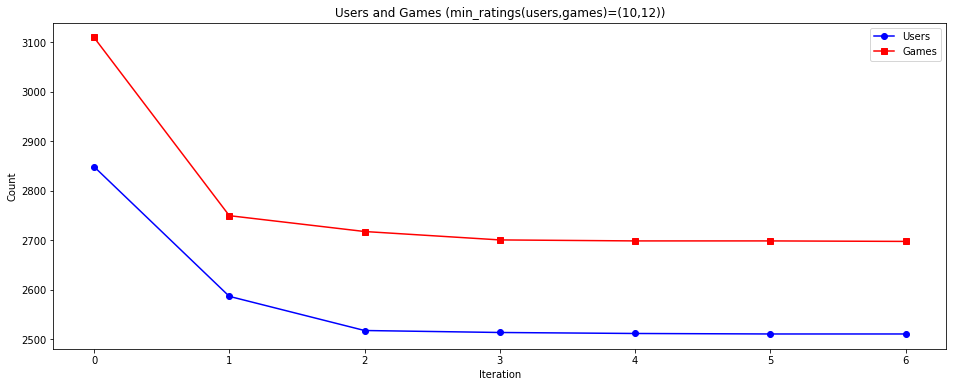

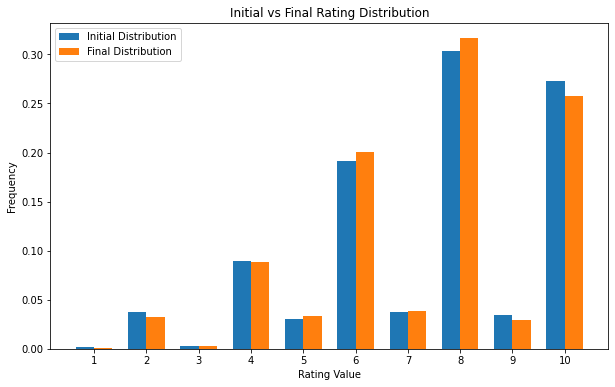


Filtering with min_ratings (min users,min games) = (11,12)
Iteration 0: 2621 users, 3110 games, 125467 ratings, KL-div: 0.0017
Iteration 1: 2399 users, 2722 games, 120044 ratings, KL-div: 0.0021
Iteration 2: 2345 users, 2683 games, 119095 ratings, KL-div: 0.0022
Iteration 3: 2336 users, 2673 games, 118896 ratings, KL-div: 0.0022
Iteration 4: 2334 users, 2672 games, 118865 ratings, KL-div: 0.0022
Converged after 5 iterations!
Number of users removed: 11289
Number of games removed: 13694


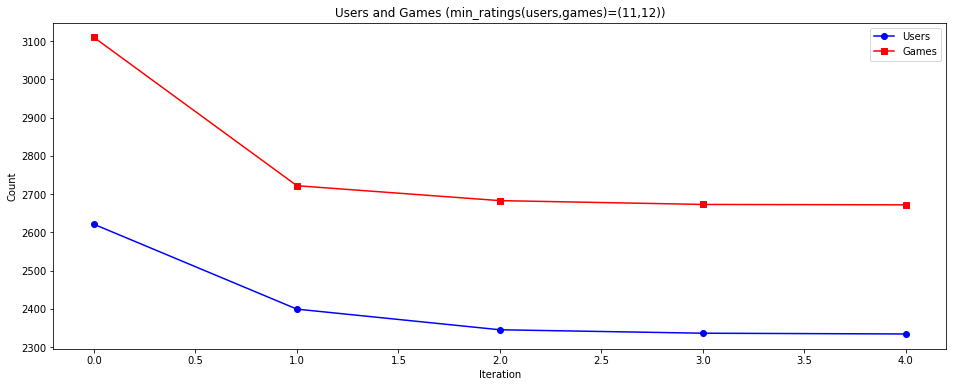

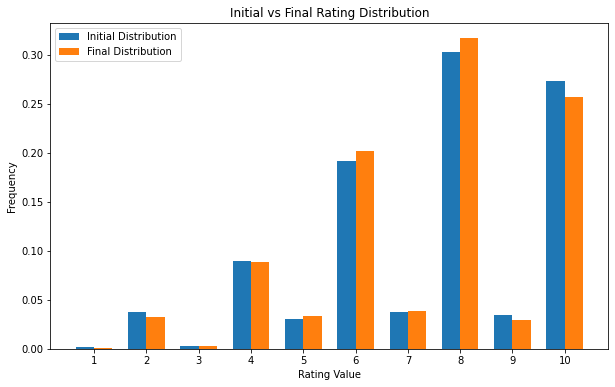


Filtering with min_ratings (min users,min games) = (12,12)
Iteration 0: 2470 users, 3110 games, 124005 ratings, KL-div: 0.0018
Iteration 1: 2264 users, 2705 games, 118424 ratings, KL-div: 0.0022
Iteration 2: 2196 users, 2660 games, 117217 ratings, KL-div: 0.0024
Iteration 3: 2185 users, 2650 games, 116986 ratings, KL-div: 0.0024
Iteration 4: 2184 users, 2644 games, 116909 ratings, KL-div: 0.0024
Iteration 5: 2181 users, 2644 games, 116876 ratings, KL-div: 0.0024
Iteration 6: 2181 users, 2643 games, 116865 ratings, KL-div: 0.0024
Converged after 7 iterations!
Number of users removed: 11442
Number of games removed: 13723


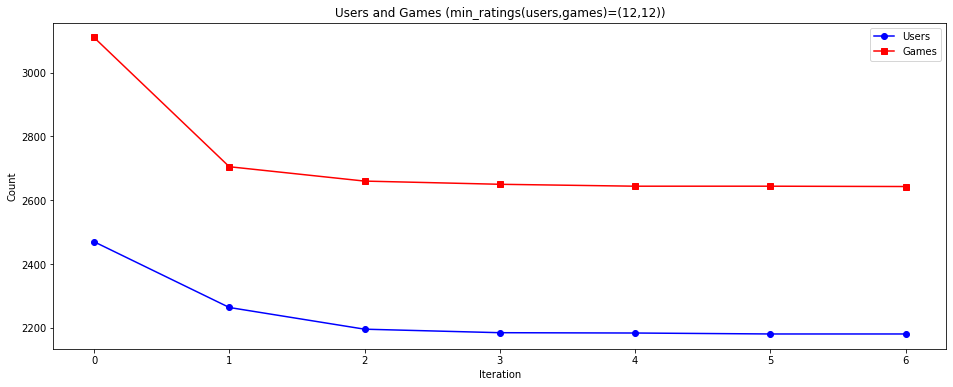

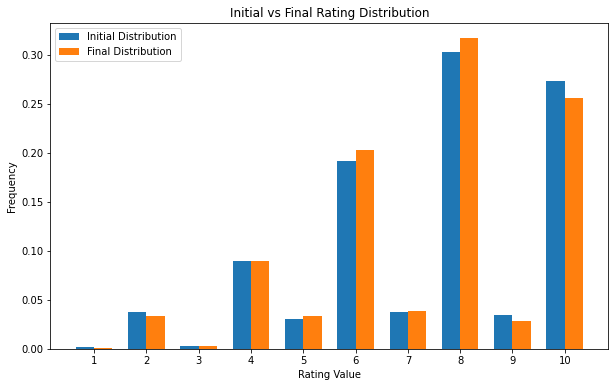


Filtering with min_ratings (min users,min games) = (13,12)
Iteration 0: 2337 users, 3110 games, 122602 ratings, KL-div: 0.0019
Iteration 1: 2120 users, 2681 games, 116509 ratings, KL-div: 0.0024
Iteration 2: 2058 users, 2639 games, 115342 ratings, KL-div: 0.0026
Iteration 3: 2049 users, 2621 games, 115039 ratings, KL-div: 0.0026
Iteration 4: 2046 users, 2618 games, 114970 ratings, KL-div: 0.0026
Converged after 5 iterations!
Number of users removed: 11577
Number of games removed: 13748


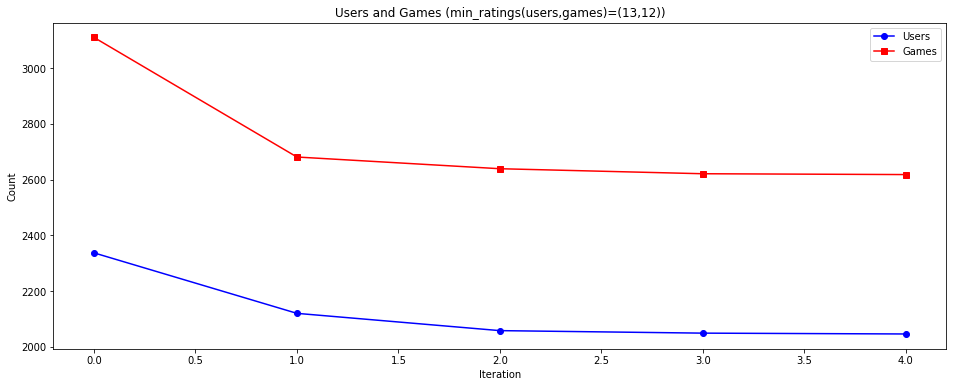

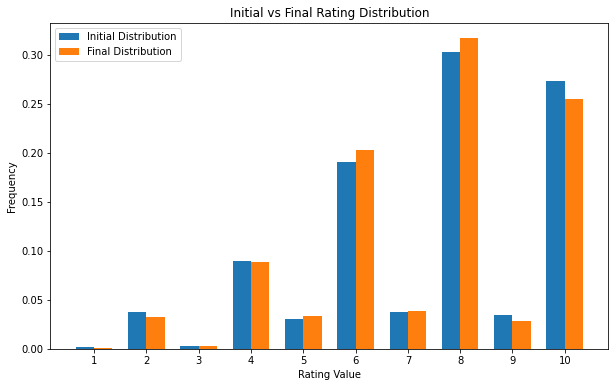


Filtering with min_ratings (min users,min games) = (14,12)
Iteration 0: 2204 users, 3110 games, 121067 ratings, KL-div: 0.0021
Iteration 1: 1992 users, 2671 games, 114809 ratings, KL-div: 0.0027
Iteration 2: 1927 users, 2614 games, 113381 ratings, KL-div: 0.0029
Iteration 3: 1919 users, 2594 games, 113058 ratings, KL-div: 0.0029
Iteration 4: 1915 users, 2591 games, 112973 ratings, KL-div: 0.0030
Converged after 5 iterations!
Number of users removed: 11708
Number of games removed: 13775


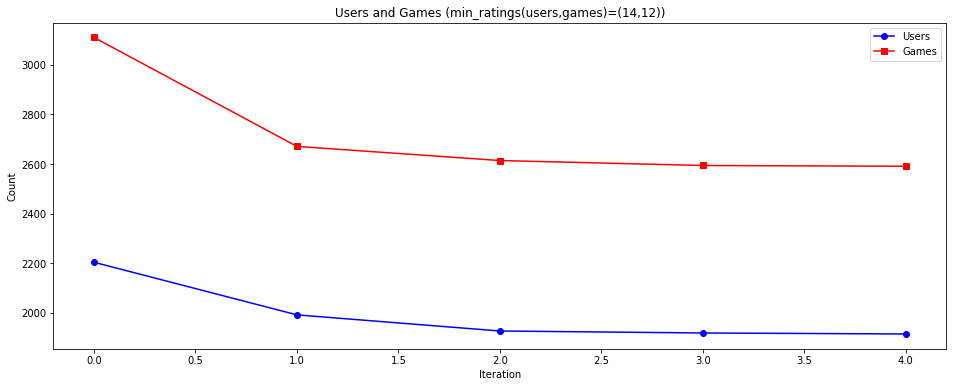

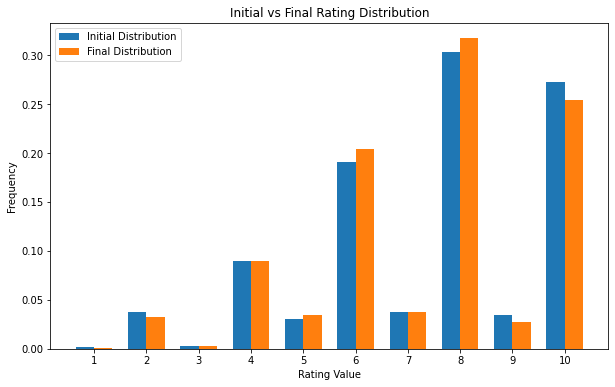


Filtering with min_ratings (min users,min games) = (15,12)
Iteration 0: 2071 users, 3110 games, 119437 ratings, KL-div: 0.0023
Iteration 1: 1884 users, 2639 games, 113013 ratings, KL-div: 0.0029
Iteration 2: 1822 users, 2590 games, 111660 ratings, KL-div: 0.0031
Iteration 3: 1811 users, 2575 games, 111341 ratings, KL-div: 0.0032
Iteration 4: 1809 users, 2572 games, 111281 ratings, KL-div: 0.0032
Converged after 5 iterations!
Number of users removed: 11814
Number of games removed: 13794


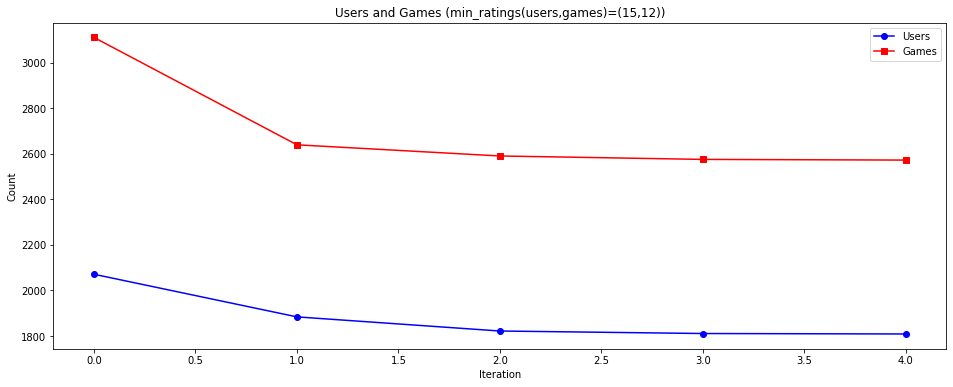

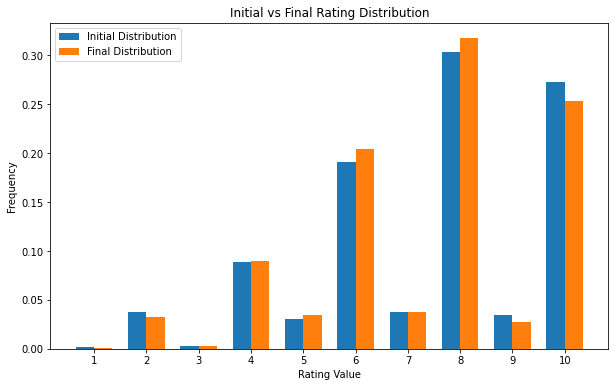


Filtering with min_ratings (min users,min games) = (16,12)
Iteration 0: 1975 users, 3110 games, 118143 ratings, KL-div: 0.0024
Iteration 1: 1781 users, 2622 games, 111350 ratings, KL-div: 0.0031
Iteration 2: 1713 users, 2572 games, 109844 ratings, KL-div: 0.0034
Iteration 3: 1707 users, 2552 games, 109535 ratings, KL-div: 0.0034
Iteration 4: 1702 users, 2550 games, 109438 ratings, KL-div: 0.0035
Iteration 5: 1702 users, 2549 games, 109427 ratings, KL-div: 0.0035
Converged after 6 iterations!
Number of users removed: 11921
Number of games removed: 13817


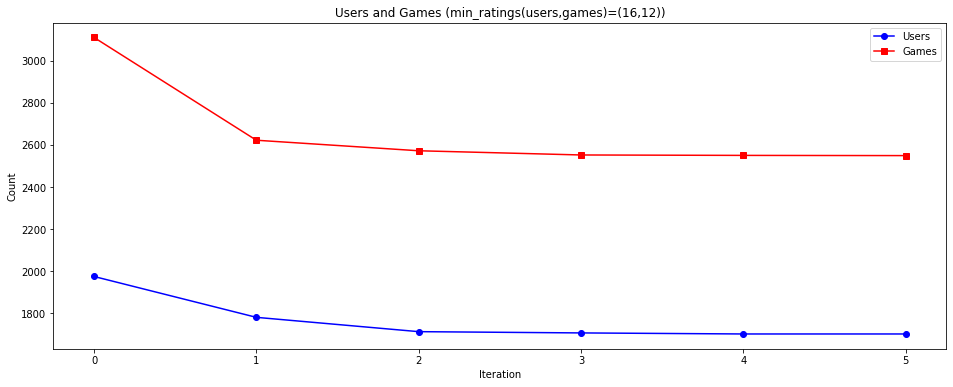

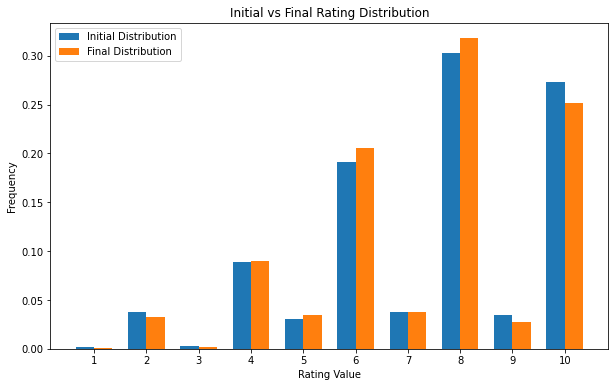


Filtering with min_ratings (min users,min games) = (18,12)
Iteration 0: 1794 users, 3110 games, 115530 ratings, KL-div: 0.0028
Iteration 1: 1616 users, 2583 games, 108370 ratings, KL-div: 0.0036
Iteration 2: 1562 users, 2524 games, 106857 ratings, KL-div: 0.0039
Iteration 3: 1548 users, 2507 games, 106438 ratings, KL-div: 0.0040
Iteration 4: 1546 users, 2497 games, 106294 ratings, KL-div: 0.0040
Iteration 5: 1541 users, 2497 games, 106209 ratings, KL-div: 0.0041
Iteration 6: 1541 users, 2496 games, 106198 ratings, KL-div: 0.0041
Iteration 7: 1540 users, 2496 games, 106181 ratings, KL-div: 0.0041
Converged after 8 iterations!
Number of users removed: 12083
Number of games removed: 13870


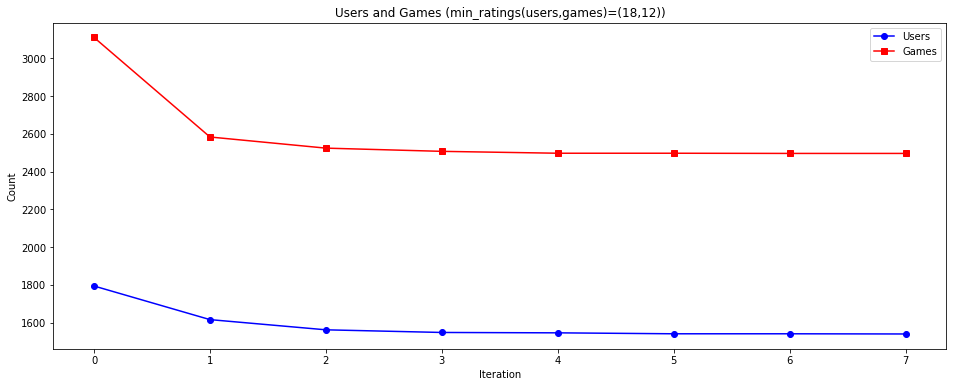

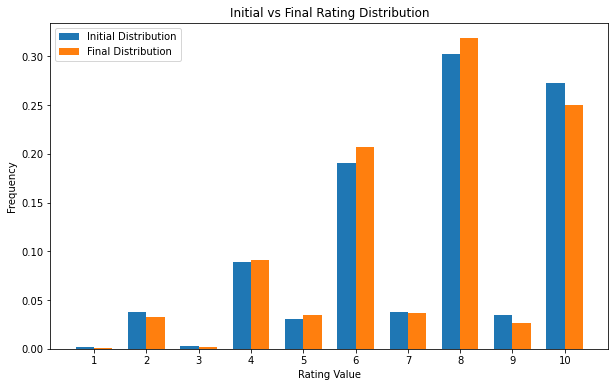


Filtering with min_ratings (min users,min games) = (20,12)
Iteration 0: 1631 users, 3110 games, 112948 ratings, KL-div: 0.0033
Iteration 1: 1482 users, 2531 games, 105461 ratings, KL-div: 0.0042
Iteration 2: 1414 users, 2482 games, 103694 ratings, KL-div: 0.0047
Iteration 3: 1409 users, 2449 games, 103243 ratings, KL-div: 0.0048
Iteration 4: 1403 users, 2449 games, 103131 ratings, KL-div: 0.0047
Iteration 5: 1403 users, 2444 games, 103076 ratings, KL-div: 0.0048
Converged after 6 iterations!
Number of users removed: 12220
Number of games removed: 13922


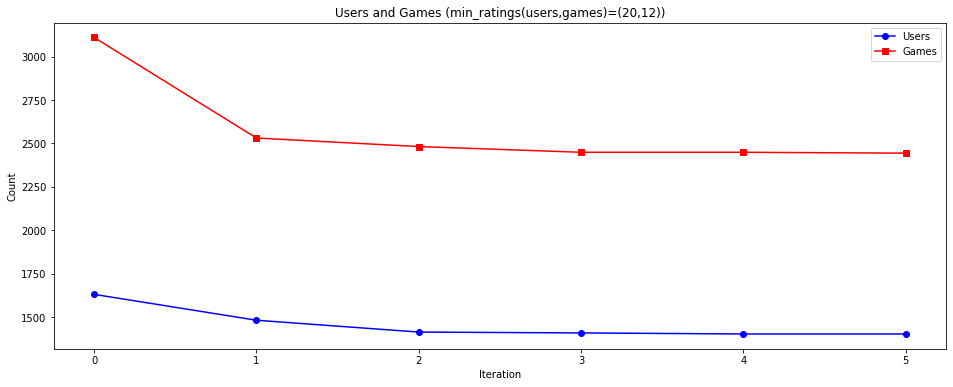

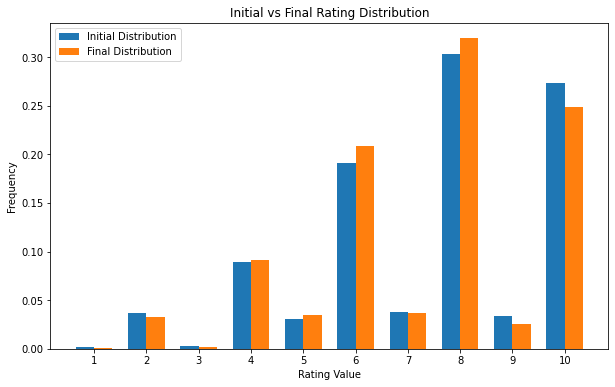


Filtering with min_ratings (min users,min games) = (22,12)
Iteration 0: 1520 users, 3110 games, 110888 ratings, KL-div: 0.0037
Iteration 1: 1375 users, 2504 games, 103108 ratings, KL-div: 0.0047
Iteration 2: 1312 users, 2443 games, 101204 ratings, KL-div: 0.0049
Iteration 3: 1303 users, 2417 games, 100737 ratings, KL-div: 0.0051
Iteration 4: 1299 users, 2414 games, 100620 ratings, KL-div: 0.0051
Iteration 5: 1299 users, 2411 games, 100587 ratings, KL-div: 0.0051
Converged after 6 iterations!
Number of users removed: 12324
Number of games removed: 13955


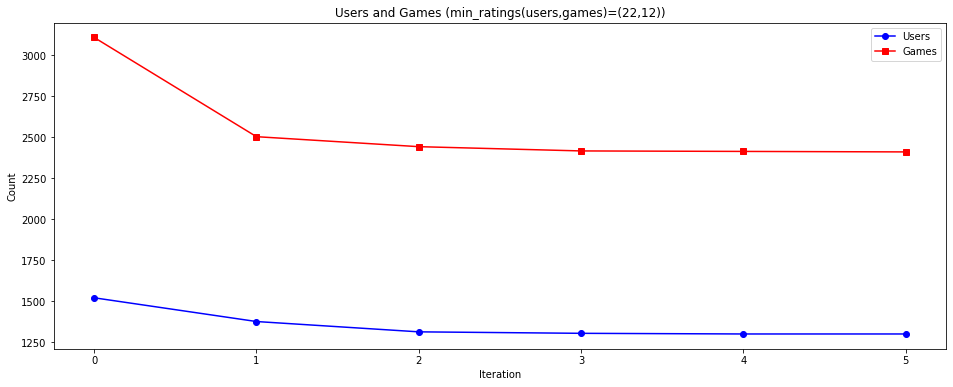

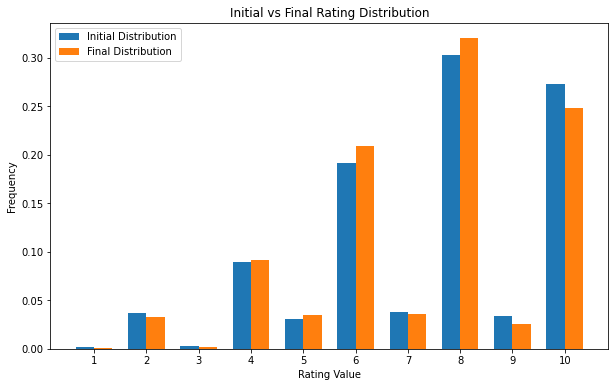


Filtering with min_ratings (min users,min games) = (25,12)
Iteration 0: 1372 users, 3110 games, 107932 ratings, KL-div: 0.0041
Iteration 1: 1241 users, 2459 games, 99757 ratings, KL-div: 0.0051
Iteration 2: 1177 users, 2396 games, 97620 ratings, KL-div: 0.0055
Iteration 3: 1165 users, 2366 games, 97008 ratings, KL-div: 0.0058
Iteration 4: 1161 users, 2359 games, 96837 ratings, KL-div: 0.0060
Iteration 5: 1160 users, 2357 games, 96792 ratings, KL-div: 0.0060
Iteration 6: 1160 users, 2356 games, 96781 ratings, KL-div: 0.0060
Converged after 7 iterations!
Number of users removed: 12463
Number of games removed: 14010


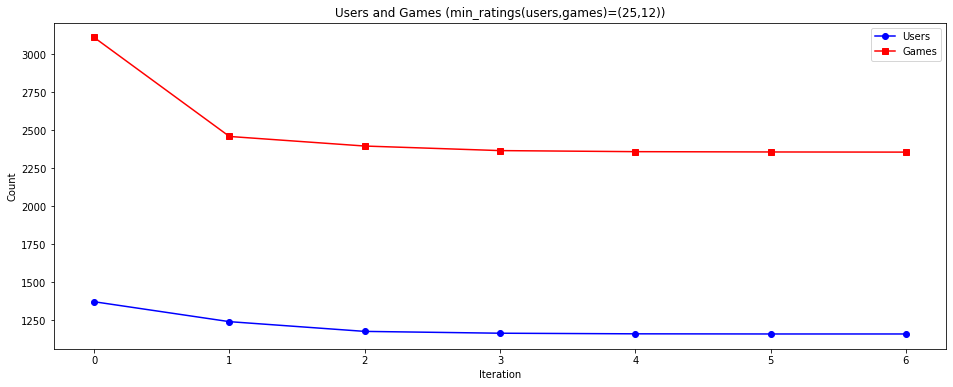

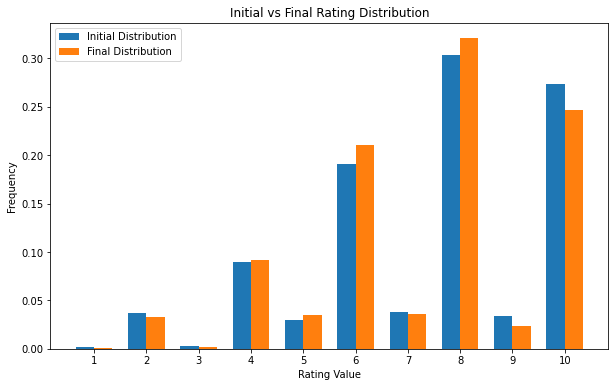


Filtering with min_ratings (min users,min games) = (10,13)
Iteration 0: 2849 users, 2952 games, 125891 ratings, KL-div: 0.0015
Iteration 1: 2567 users, 2603 games, 120251 ratings, KL-div: 0.0019
Iteration 2: 2498 users, 2568 games, 119240 ratings, KL-div: 0.0020
Iteration 3: 2490 users, 2555 games, 119016 ratings, KL-div: 0.0020
Iteration 4: 2483 users, 2554 games, 118941 ratings, KL-div: 0.0020
Converged after 5 iterations!
Number of users removed: 11140
Number of games removed: 13812


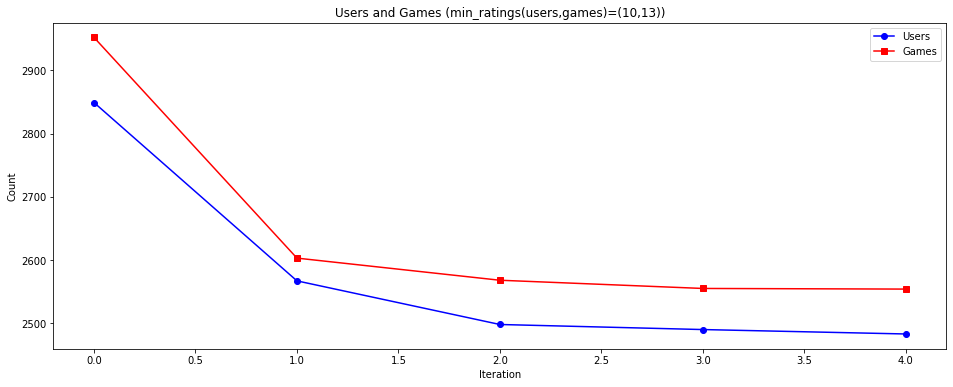

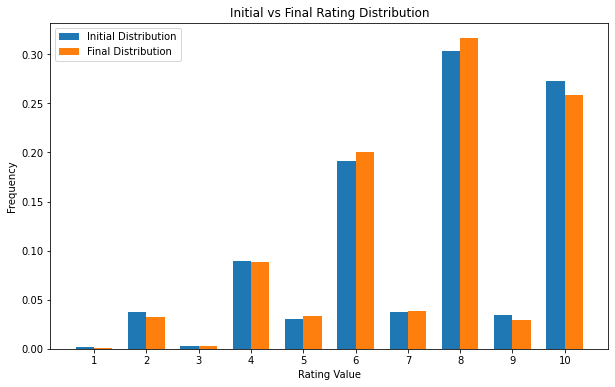


Filtering with min_ratings (min users,min games) = (11,13)
Iteration 0: 2621 users, 2952 games, 123950 ratings, KL-div: 0.0017
Iteration 1: 2381 users, 2580 games, 118198 ratings, KL-div: 0.0021
Iteration 2: 2315 users, 2542 games, 117117 ratings, KL-div: 0.0022
Iteration 3: 2308 users, 2532 games, 116929 ratings, KL-div: 0.0022
Iteration 4: 2306 users, 2531 games, 116897 ratings, KL-div: 0.0022
Converged after 5 iterations!
Number of users removed: 11317
Number of games removed: 13835


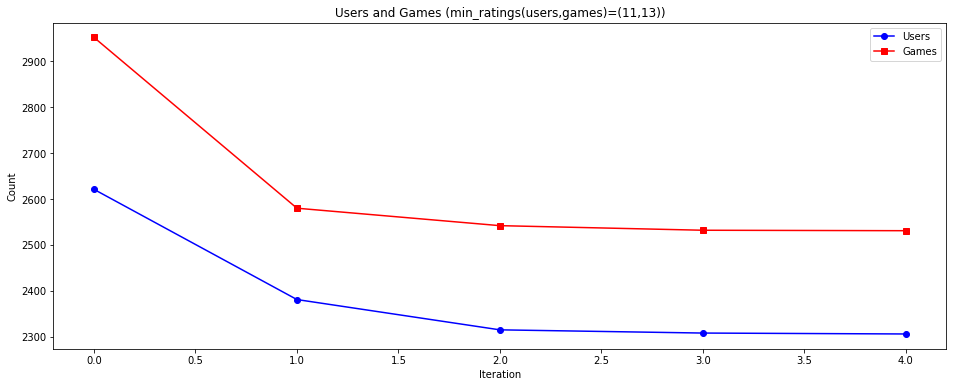

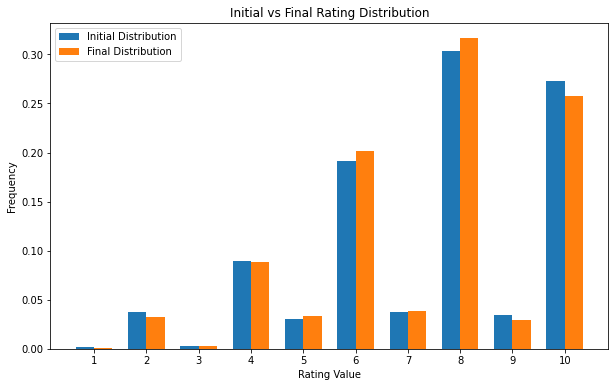


Filtering with min_ratings (min users,min games) = (12,13)
Iteration 0: 2470 users, 2952 games, 122496 ratings, KL-div: 0.0018
Iteration 1: 2242 users, 2563 games, 116531 ratings, KL-div: 0.0023
Iteration 2: 2169 users, 2522 games, 115282 ratings, KL-div: 0.0024
Iteration 3: 2163 users, 2503 games, 114988 ratings, KL-div: 0.0024
Iteration 4: 2158 users, 2500 games, 114897 ratings, KL-div: 0.0024
Iteration 5: 2157 users, 2499 games, 114874 ratings, KL-div: 0.0024
Converged after 6 iterations!
Number of users removed: 11466
Number of games removed: 13867


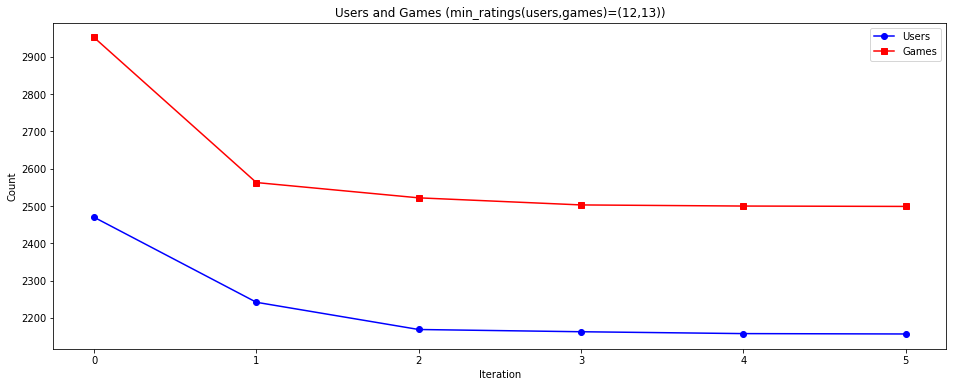

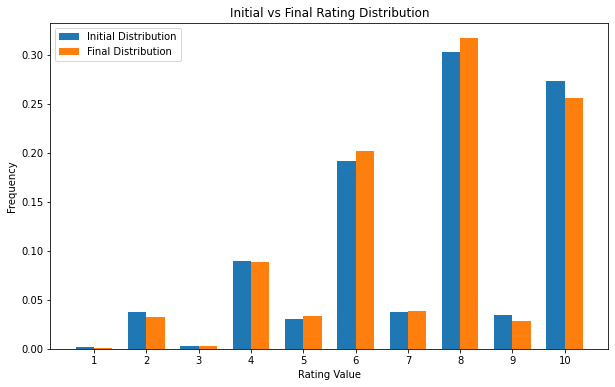


Filtering with min_ratings (min users,min games) = (13,13)
Iteration 0: 2337 users, 2952 games, 121116 ratings, KL-div: 0.0019
Iteration 1: 2104 users, 2549 games, 114787 ratings, KL-div: 0.0024
Iteration 2: 2032 users, 2491 games, 113281 ratings, KL-div: 0.0027
Iteration 3: 2021 users, 2473 games, 112933 ratings, KL-div: 0.0027
Iteration 4: 2019 users, 2472 games, 112897 ratings, KL-div: 0.0027
Converged after 5 iterations!
Number of users removed: 11604
Number of games removed: 13894


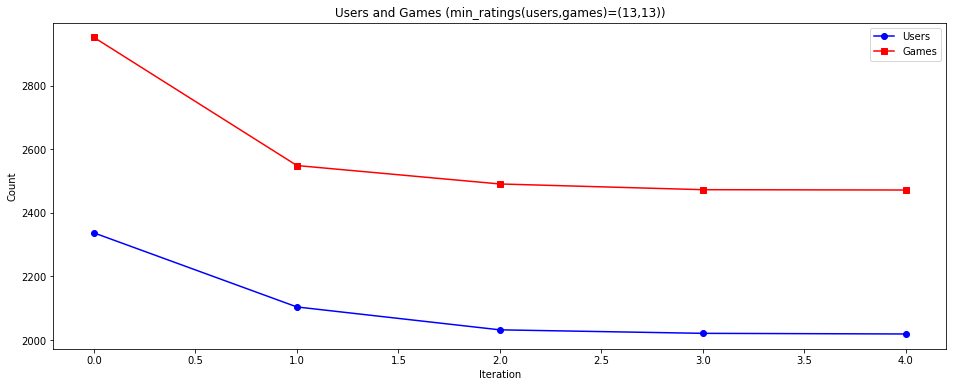

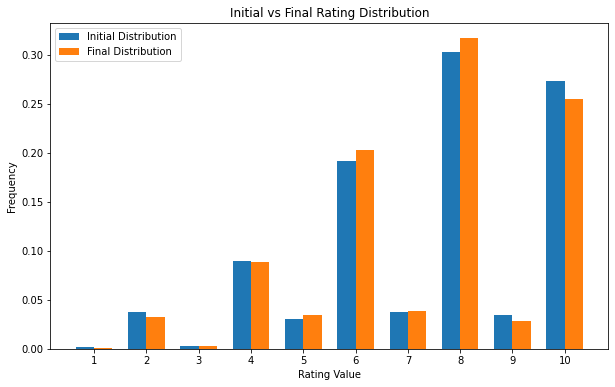


Filtering with min_ratings (min users,min games) = (14,13)
Iteration 0: 2204 users, 2952 games, 119599 ratings, KL-div: 0.0021
Iteration 1: 1974 users, 2525 games, 112885 ratings, KL-div: 0.0027
Iteration 2: 1908 users, 2468 games, 111407 ratings, KL-div: 0.0029
Iteration 3: 1899 users, 2450 games, 111074 ratings, KL-div: 0.0030
Iteration 4: 1897 users, 2445 games, 110988 ratings, KL-div: 0.0030
Iteration 5: 1896 users, 2444 games, 110963 ratings, KL-div: 0.0030
Converged after 6 iterations!
Number of users removed: 11727
Number of games removed: 13922


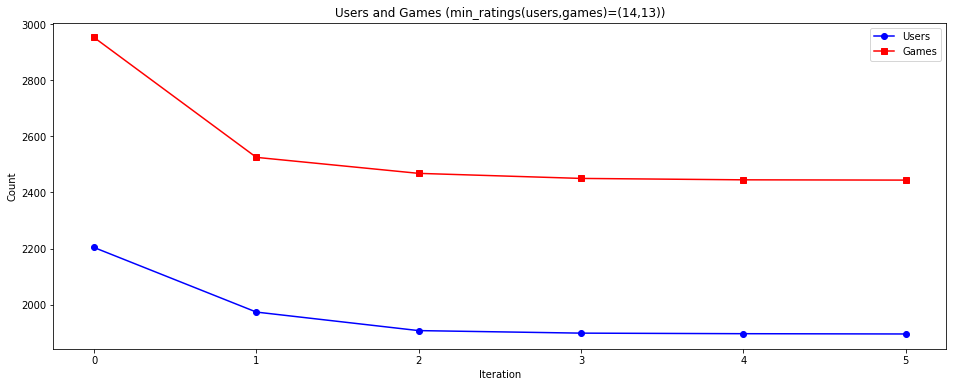

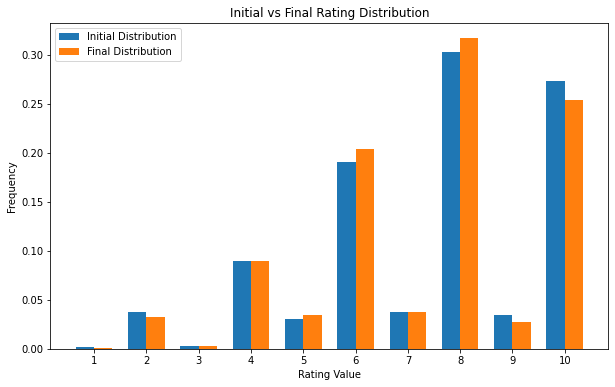


Filtering with min_ratings (min users,min games) = (15,13)
Iteration 0: 2071 users, 2952 games, 117990 ratings, KL-div: 0.0023
Iteration 1: 1869 users, 2505 games, 111262 ratings, KL-div: 0.0029
Iteration 2: 1799 users, 2444 games, 109605 ratings, KL-div: 0.0032
Iteration 3: 1788 users, 2425 games, 109223 ratings, KL-div: 0.0032
Iteration 4: 1781 users, 2420 games, 109065 ratings, KL-div: 0.0033
Iteration 5: 1779 users, 2419 games, 109025 ratings, KL-div: 0.0033
Converged after 6 iterations!
Number of users removed: 11844
Number of games removed: 13947


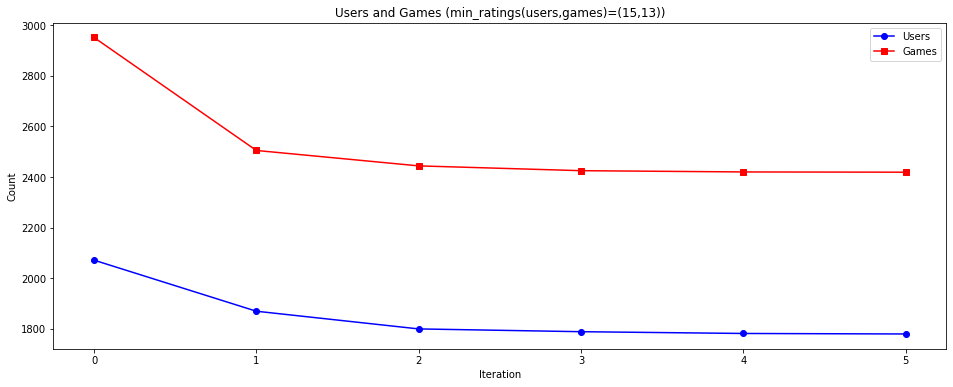

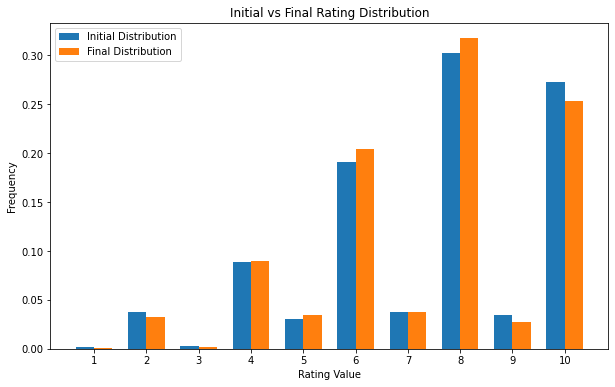


Filtering with min_ratings (min users,min games) = (16,13)
Iteration 0: 1975 users, 2952 games, 116706 ratings, KL-div: 0.0024
Iteration 1: 1770 users, 2487 games, 109634 ratings, KL-div: 0.0032
Iteration 2: 1691 users, 2421 games, 107727 ratings, KL-div: 0.0035
Iteration 3: 1683 users, 2396 games, 107312 ratings, KL-div: 0.0036
Iteration 4: 1680 users, 2392 games, 107219 ratings, KL-div: 0.0036
Iteration 5: 1678 users, 2390 games, 107165 ratings, KL-div: 0.0037
Iteration 6: 1678 users, 2388 games, 107141 ratings, KL-div: 0.0037
Converged after 7 iterations!
Number of users removed: 11945
Number of games removed: 13978


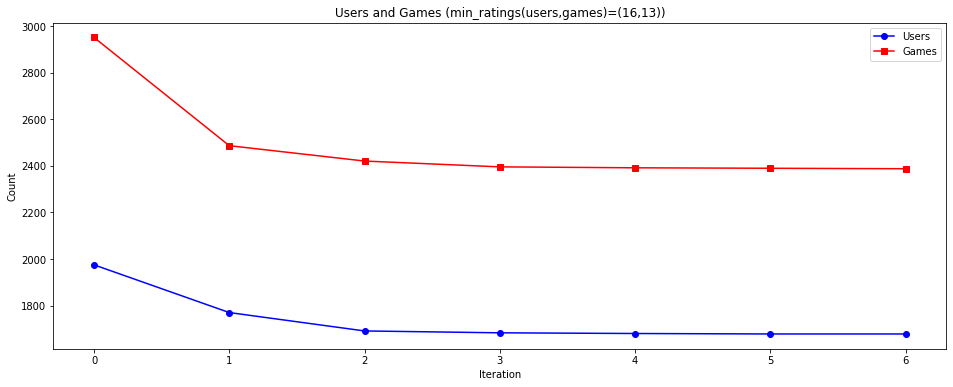

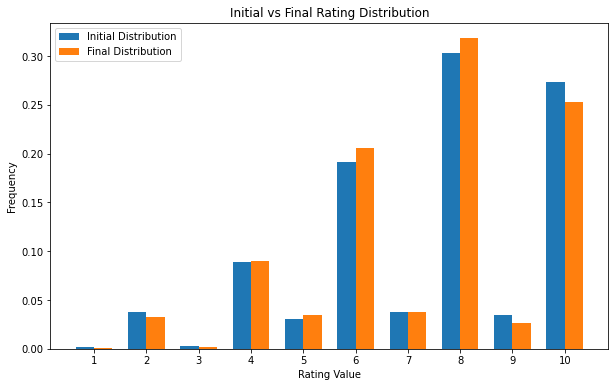


Filtering with min_ratings (min users,min games) = (18,13)
Iteration 0: 1794 users, 2952 games, 114112 ratings, KL-div: 0.0028
Iteration 1: 1608 users, 2438 games, 106561 ratings, KL-div: 0.0036
Iteration 2: 1534 users, 2372 games, 104587 ratings, KL-div: 0.0040
Iteration 3: 1526 users, 2336 games, 104026 ratings, KL-div: 0.0042
Iteration 4: 1516 users, 2327 games, 103750 ratings, KL-div: 0.0043
Iteration 5: 1514 users, 2324 games, 103680 ratings, KL-div: 0.0043
Converged after 6 iterations!
Number of users removed: 12109
Number of games removed: 14042


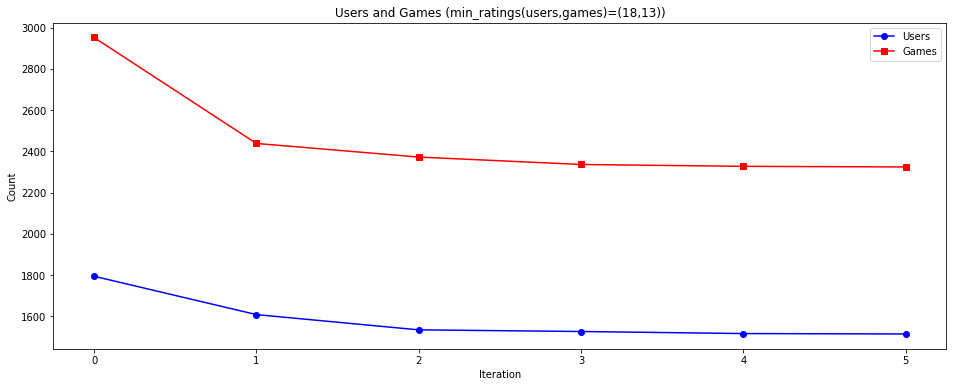

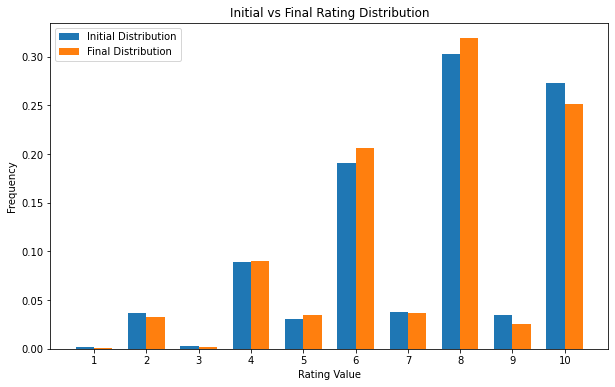


Filtering with min_ratings (min users,min games) = (20,13)
Iteration 0: 1631 users, 2952 games, 111555 ratings, KL-div: 0.0033
Iteration 1: 1465 users, 2390 games, 103521 ratings, KL-div: 0.0043
Iteration 2: 1400 users, 2322 games, 101552 ratings, KL-div: 0.0047
Iteration 3: 1388 users, 2284 games, 100875 ratings, KL-div: 0.0049
Iteration 4: 1384 users, 2280 games, 100752 ratings, KL-div: 0.0049
Converged after 5 iterations!
Number of users removed: 12239
Number of games removed: 14086


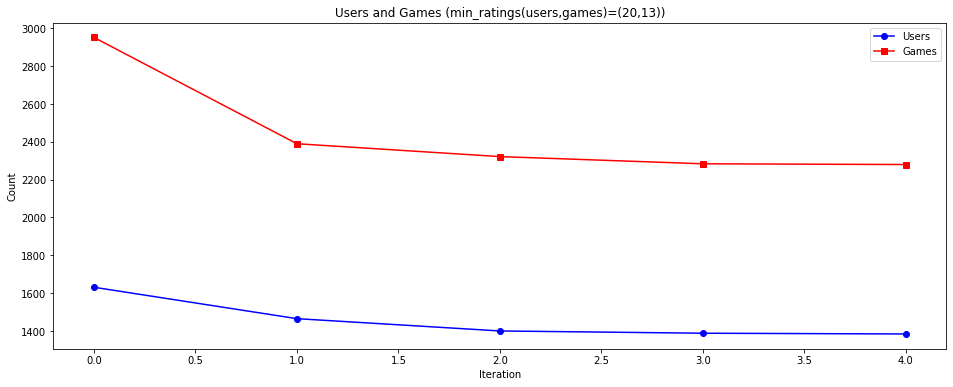

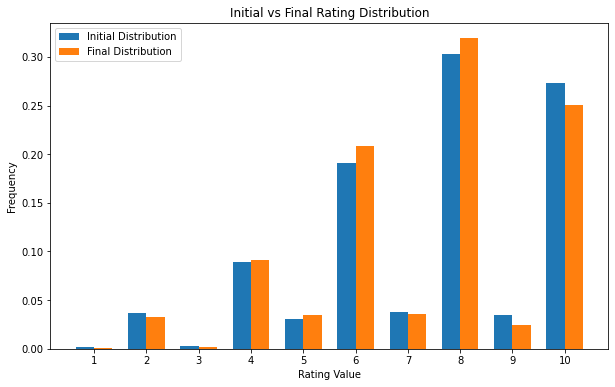


Filtering with min_ratings (min users,min games) = (22,13)
Iteration 0: 1520 users, 2952 games, 109507 ratings, KL-div: 0.0037
Iteration 1: 1365 users, 2348 games, 101092 ratings, KL-div: 0.0047
Iteration 2: 1295 users, 2286 games, 98995 ratings, KL-div: 0.0051
Iteration 3: 1288 users, 2258 games, 98522 ratings, KL-div: 0.0052
Iteration 4: 1284 users, 2255 games, 98402 ratings, KL-div: 0.0053
Converged after 5 iterations!
Number of users removed: 12339
Number of games removed: 14111


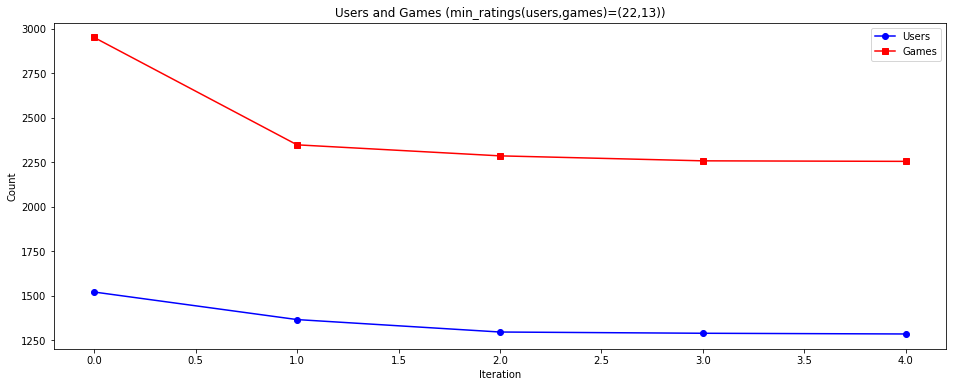

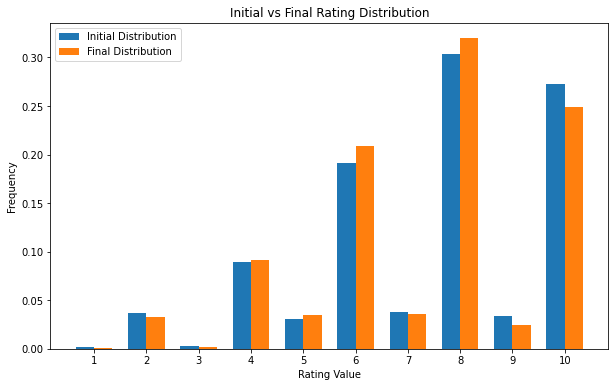


Filtering with min_ratings (min users,min games) = (25,13)
Iteration 0: 1372 users, 2952 games, 106592 ratings, KL-div: 0.0041
Iteration 1: 1230 users, 2301 games, 97689 ratings, KL-div: 0.0051
Iteration 2: 1160 users, 2237 games, 95343 ratings, KL-div: 0.0058
Iteration 3: 1146 users, 2204 games, 94625 ratings, KL-div: 0.0061
Iteration 4: 1144 users, 2197 games, 94493 ratings, KL-div: 0.0061
Iteration 5: 1143 users, 2196 games, 94457 ratings, KL-div: 0.0062
Converged after 6 iterations!
Number of users removed: 12480
Number of games removed: 14170


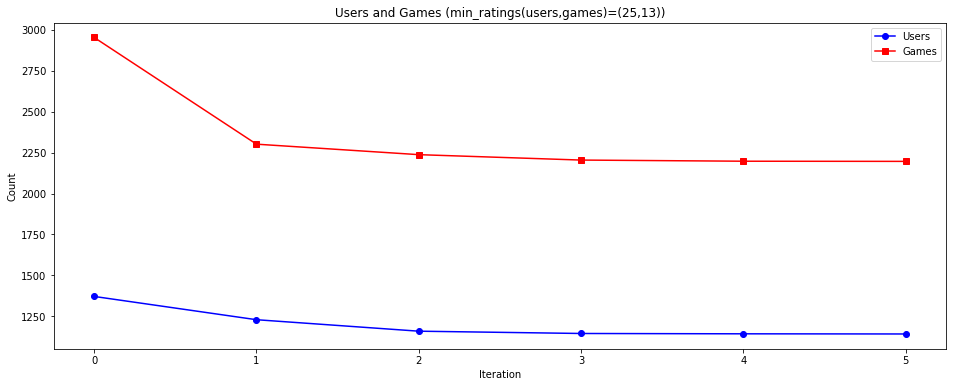

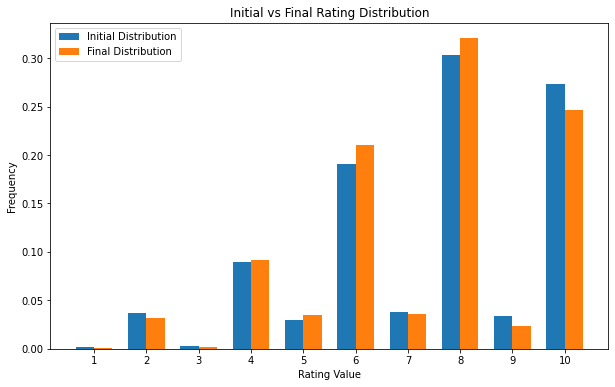


Filtering with min_ratings (min users,min games) = (10,14)
Iteration 0: 2849 users, 2796 games, 124200 ratings, KL-div: 0.0015
Iteration 1: 2535 users, 2473 games, 118321 ratings, KL-div: 0.0019
Iteration 2: 2469 users, 2429 games, 117190 ratings, KL-div: 0.0020
Iteration 3: 2462 users, 2418 games, 116986 ratings, KL-div: 0.0020
Iteration 4: 2457 users, 2416 games, 116915 ratings, KL-div: 0.0020
Iteration 5: 2456 users, 2414 games, 116880 ratings, KL-div: 0.0020
Converged after 6 iterations!
Number of users removed: 11167
Number of games removed: 13952


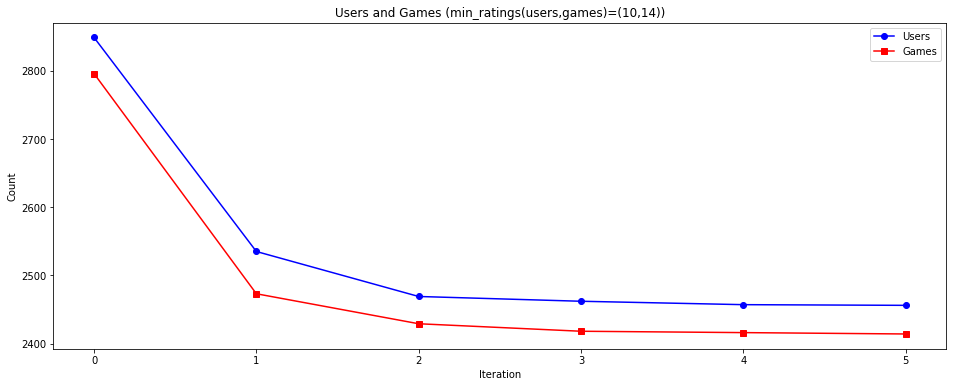

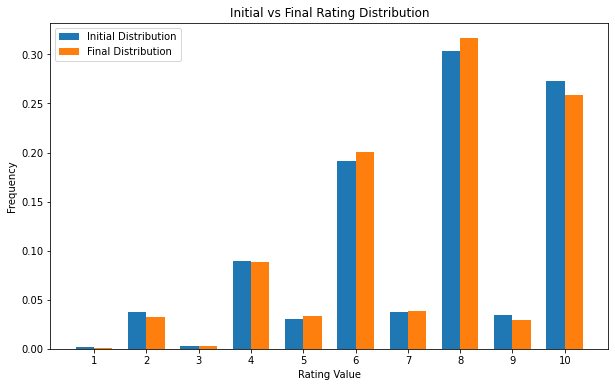


Filtering with min_ratings (min users,min games) = (11,14)
Iteration 0: 2621 users, 2796 games, 122282 ratings, KL-div: 0.0017
Iteration 1: 2366 users, 2448 games, 116385 ratings, KL-div: 0.0021
Iteration 2: 2292 users, 2404 games, 115109 ratings, KL-div: 0.0022
Iteration 3: 2282 users, 2388 games, 114804 ratings, KL-div: 0.0023
Iteration 4: 2280 users, 2387 games, 114771 ratings, KL-div: 0.0023
Converged after 5 iterations!
Number of users removed: 11343
Number of games removed: 13979


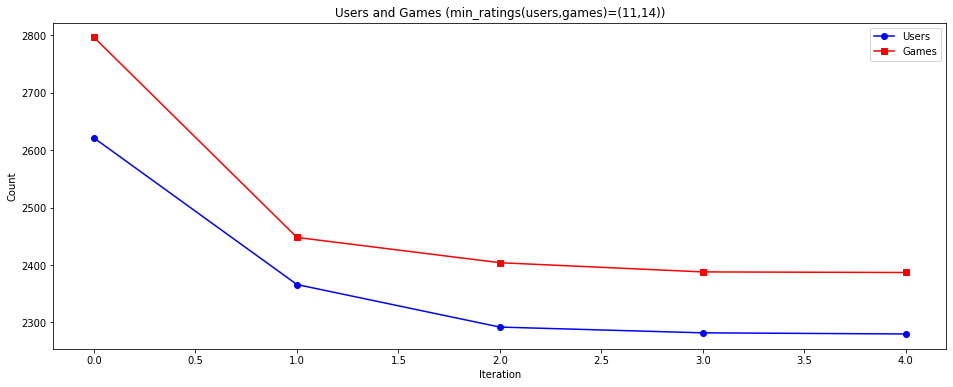

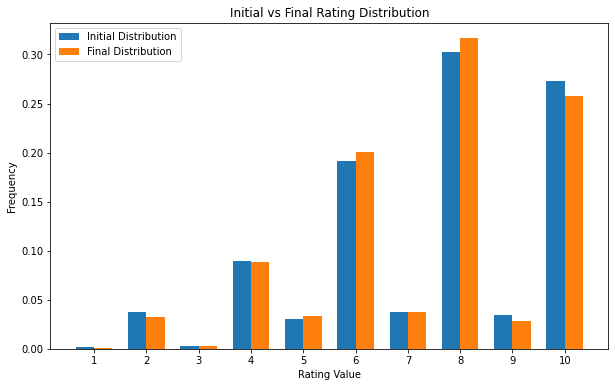


Filtering with min_ratings (min users,min games) = (12,14)
Iteration 0: 2470 users, 2796 games, 120847 ratings, KL-div: 0.0018
Iteration 1: 2222 users, 2436 games, 114715 ratings, KL-div: 0.0023
Iteration 2: 2147 users, 2375 games, 113152 ratings, KL-div: 0.0025
Iteration 3: 2135 users, 2350 games, 112697 ratings, KL-div: 0.0025
Iteration 4: 2130 users, 2346 games, 112590 ratings, KL-div: 0.0026
Iteration 5: 2129 users, 2344 games, 112553 ratings, KL-div: 0.0026
Converged after 6 iterations!
Number of users removed: 11494
Number of games removed: 14022


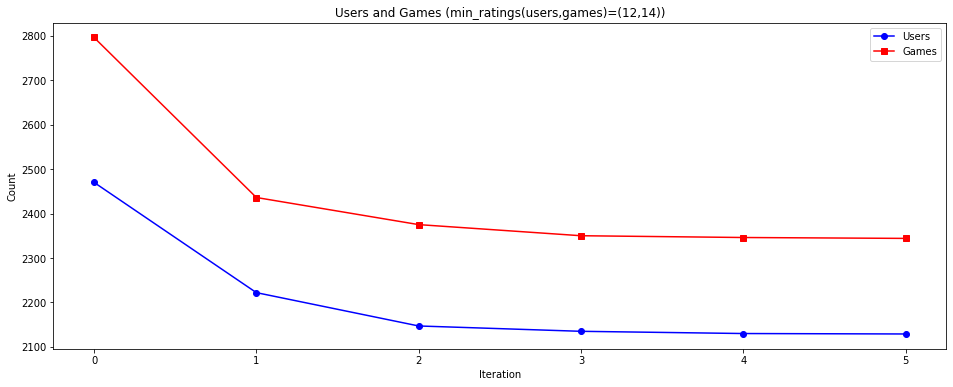

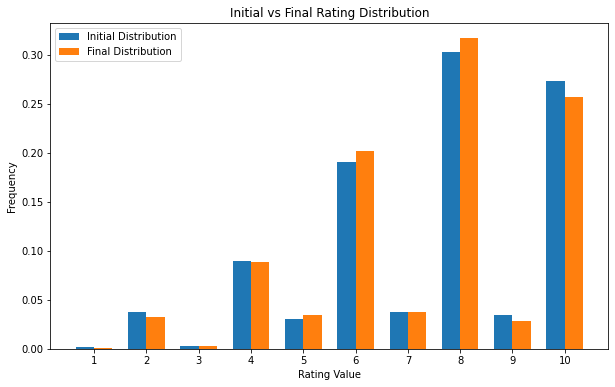


Filtering with min_ratings (min users,min games) = (13,14)
Iteration 0: 2337 users, 2796 games, 119485 ratings, KL-div: 0.0019
Iteration 1: 2080 users, 2409 games, 112754 ratings, KL-div: 0.0025
Iteration 2: 2016 users, 2341 games, 111158 ratings, KL-div: 0.0027
Iteration 3: 2004 users, 2323 games, 110783 ratings, KL-div: 0.0028
Iteration 4: 1994 users, 2322 games, 110650 ratings, KL-div: 0.0028
Iteration 5: 1993 users, 2316 games, 110560 ratings, KL-div: 0.0029
Iteration 6: 1993 users, 2315 games, 110547 ratings, KL-div: 0.0029
Converged after 7 iterations!
Number of users removed: 11630
Number of games removed: 14051


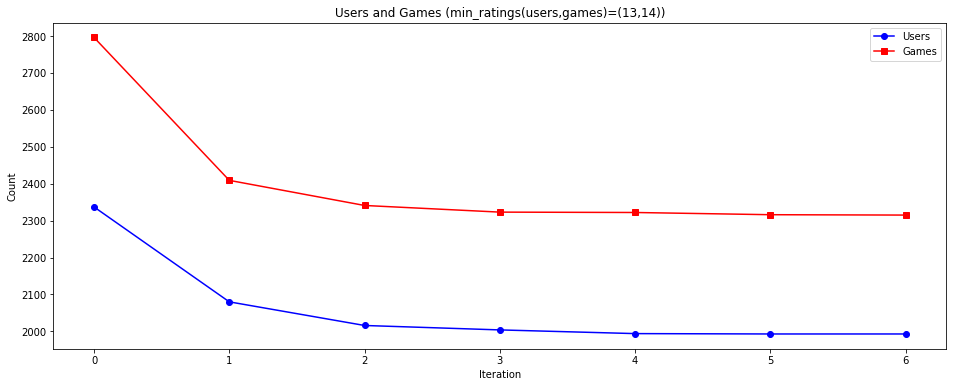

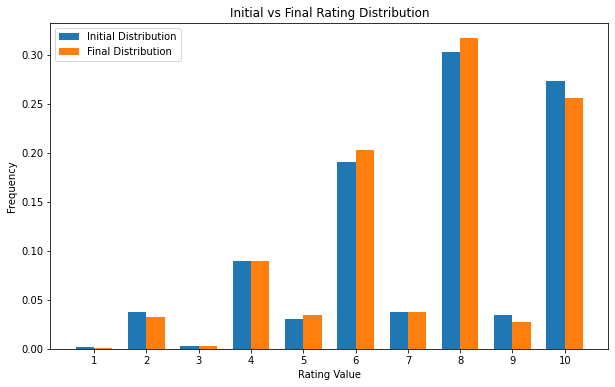


Filtering with min_ratings (min users,min games) = (14,14)
Iteration 0: 2204 users, 2796 games, 117988 ratings, KL-div: 0.0021
Iteration 1: 1959 users, 2385 games, 110950 ratings, KL-div: 0.0028
Iteration 2: 1891 users, 2311 games, 109168 ratings, KL-div: 0.0031
Iteration 3: 1874 users, 2301 games, 108819 ratings, KL-div: 0.0032
Iteration 4: 1869 users, 2297 games, 108702 ratings, KL-div: 0.0032
Iteration 5: 1867 users, 2295 games, 108650 ratings, KL-div: 0.0032
Iteration 6: 1867 users, 2294 games, 108637 ratings, KL-div: 0.0032
Converged after 7 iterations!
Number of users removed: 11756
Number of games removed: 14072


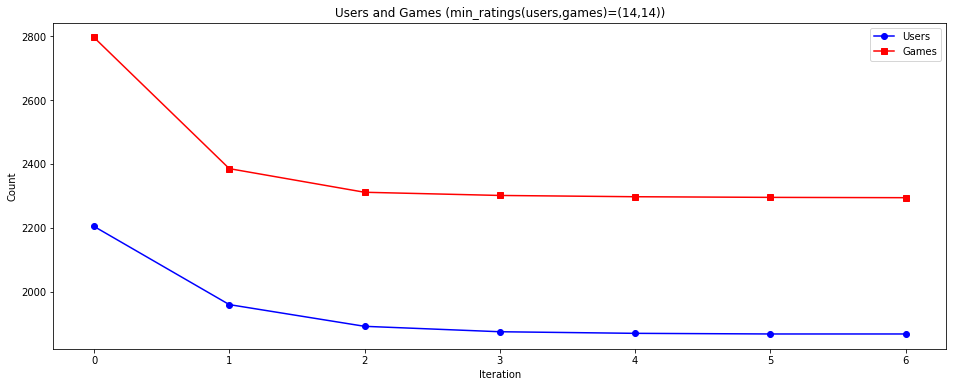

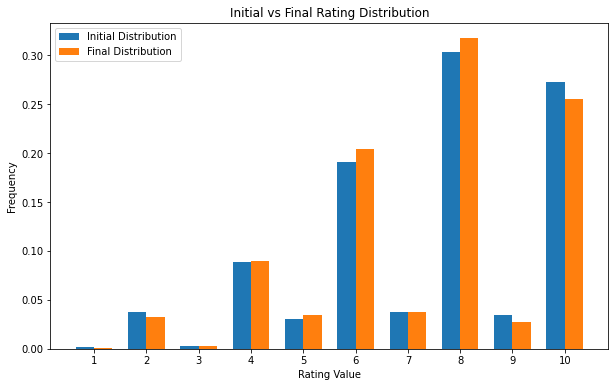


Filtering with min_ratings (min users,min games) = (15,14)
Iteration 0: 2071 users, 2796 games, 116396 ratings, KL-div: 0.0023
Iteration 1: 1852 users, 2355 games, 109146 ratings, KL-div: 0.0030
Iteration 2: 1772 users, 2292 games, 107279 ratings, KL-div: 0.0033
Iteration 3: 1761 users, 2275 games, 106906 ratings, KL-div: 0.0034
Iteration 4: 1753 users, 2272 games, 106757 ratings, KL-div: 0.0035
Iteration 5: 1753 users, 2264 games, 106653 ratings, KL-div: 0.0035
Iteration 6: 1750 users, 2264 games, 106611 ratings, KL-div: 0.0035
Converged after 7 iterations!
Number of users removed: 11873
Number of games removed: 14102


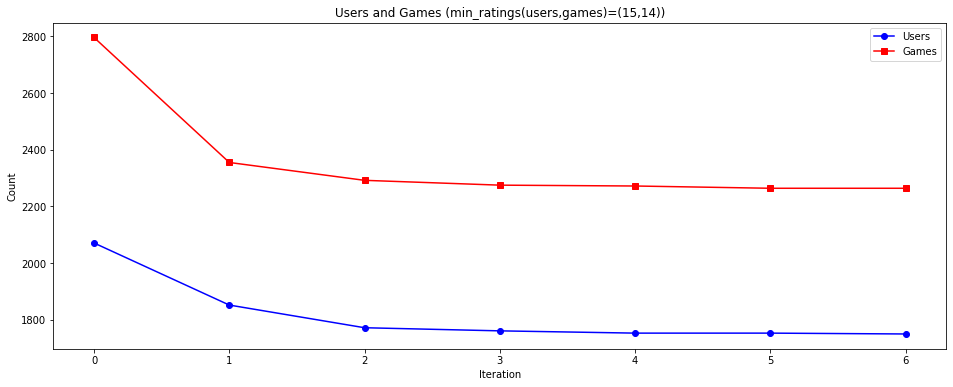

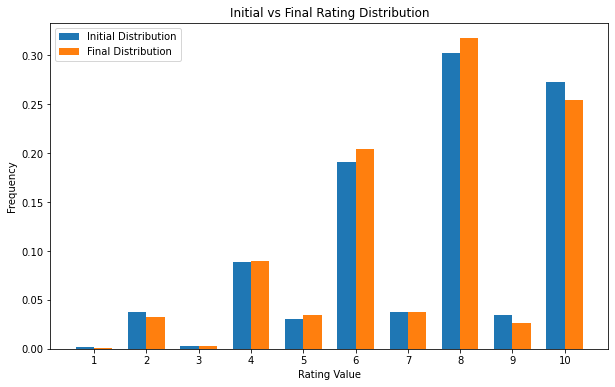


Filtering with min_ratings (min users,min games) = (16,14)
Iteration 0: 1975 users, 2796 games, 115122 ratings, KL-div: 0.0024
Iteration 1: 1745 users, 2330 games, 107317 ratings, KL-div: 0.0033
Iteration 2: 1664 users, 2274 games, 105447 ratings, KL-div: 0.0036
Iteration 3: 1656 users, 2251 games, 105038 ratings, KL-div: 0.0037
Iteration 4: 1651 users, 2248 games, 104924 ratings, KL-div: 0.0038
Iteration 5: 1651 users, 2244 games, 104872 ratings, KL-div: 0.0038
Iteration 6: 1650 users, 2244 games, 104857 ratings, KL-div: 0.0038
Converged after 7 iterations!
Number of users removed: 11973
Number of games removed: 14122


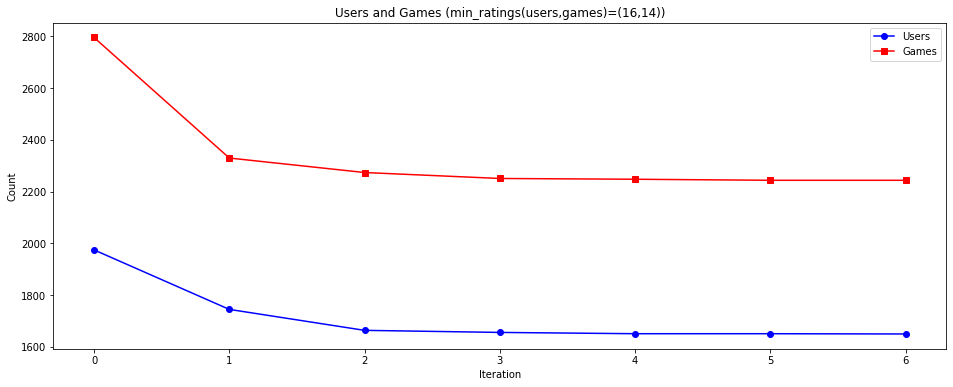

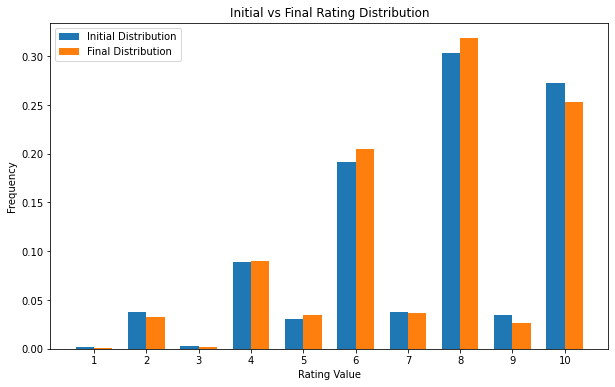


Filtering with min_ratings (min users,min games) = (18,14)
Iteration 0: 1794 users, 2796 games, 112568 ratings, KL-div: 0.0028
Iteration 1: 1593 users, 2290 games, 104473 ratings, KL-div: 0.0038
Iteration 2: 1508 users, 2233 games, 102383 ratings, KL-div: 0.0042
Iteration 3: 1498 users, 2198 games, 101772 ratings, KL-div: 0.0044
Iteration 4: 1489 users, 2195 games, 101582 ratings, KL-div: 0.0045
Iteration 5: 1488 users, 2190 games, 101500 ratings, KL-div: 0.0045
Converged after 6 iterations!
Number of users removed: 12135
Number of games removed: 14176


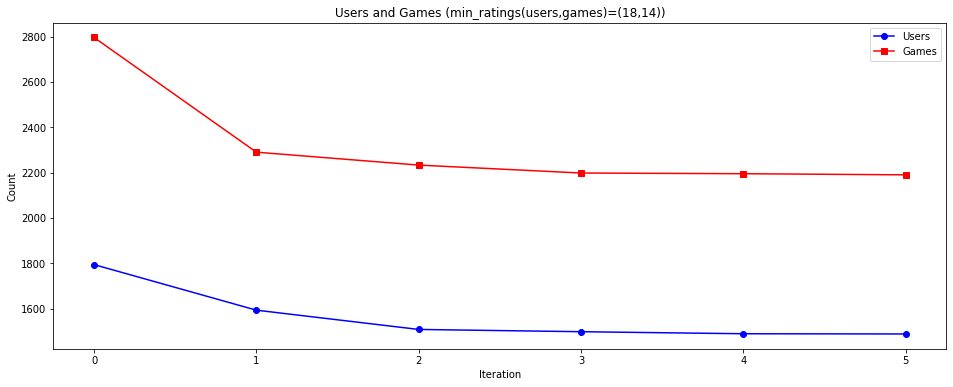

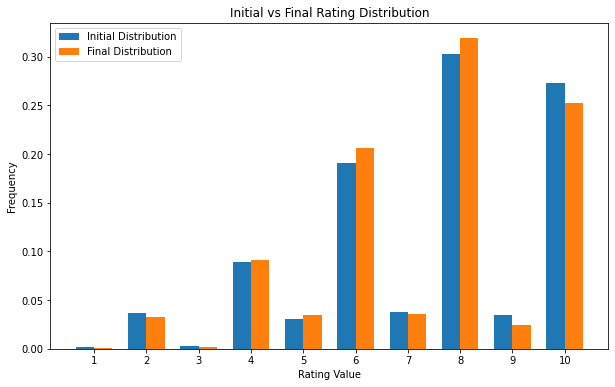


Filtering with min_ratings (min users,min games) = (20,14)
Iteration 0: 1631 users, 2796 games, 110041 ratings, KL-div: 0.0033
Iteration 1: 1455 users, 2252 games, 101623 ratings, KL-div: 0.0044
Iteration 2: 1382 users, 2188 games, 99516 ratings, KL-div: 0.0048
Iteration 3: 1375 users, 2160 games, 99021 ratings, KL-div: 0.0049
Iteration 4: 1372 users, 2158 games, 98938 ratings, KL-div: 0.0049
Iteration 5: 1372 users, 2157 games, 98925 ratings, KL-div: 0.0049
Converged after 6 iterations!
Number of users removed: 12251
Number of games removed: 14209


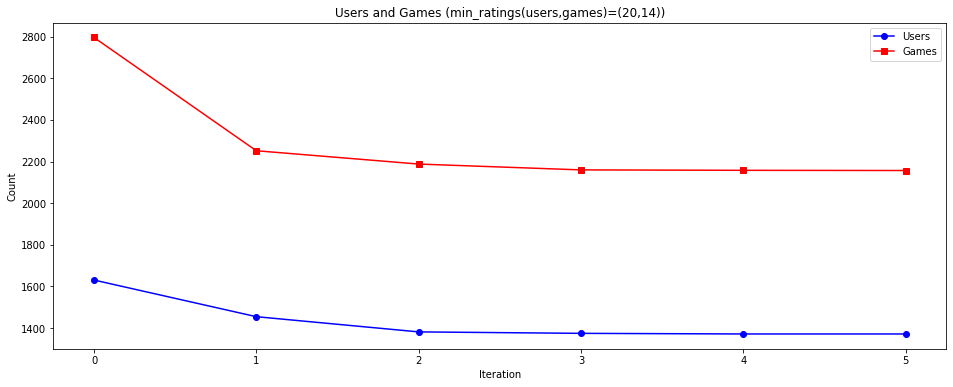

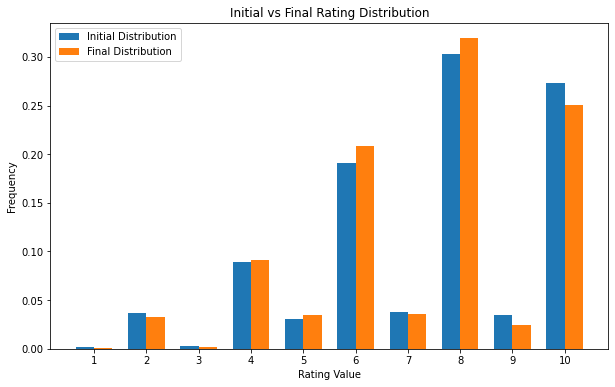


Filtering with min_ratings (min users,min games) = (22,14)
Iteration 0: 1520 users, 2796 games, 108014 ratings, KL-div: 0.0037
Iteration 1: 1352 users, 2219 games, 99233 ratings, KL-div: 0.0048
Iteration 2: 1279 users, 2149 games, 96918 ratings, KL-div: 0.0052
Iteration 3: 1265 users, 2127 games, 96345 ratings, KL-div: 0.0054
Iteration 4: 1264 users, 2116 games, 96181 ratings, KL-div: 0.0054
Iteration 5: 1261 users, 2116 games, 96118 ratings, KL-div: 0.0054
Converged after 6 iterations!
Number of users removed: 12362
Number of games removed: 14250


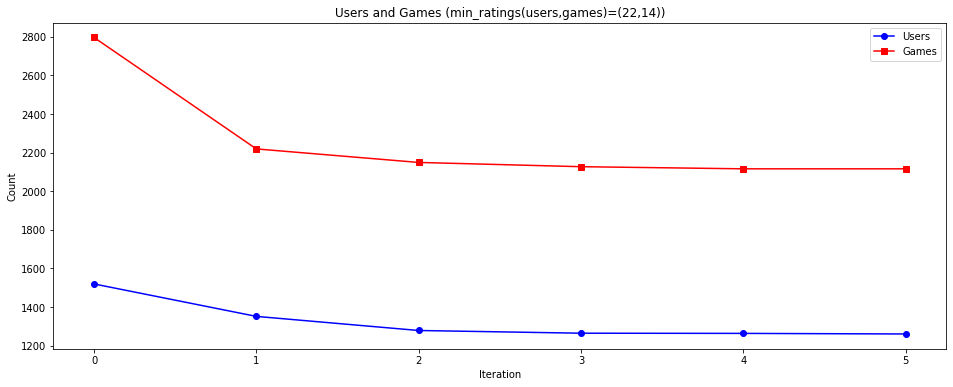

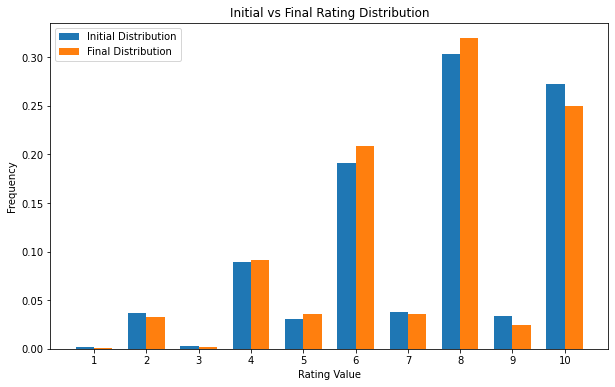


Filtering with min_ratings (min users,min games) = (25,14)
Iteration 0: 1372 users, 2796 games, 105129 ratings, KL-div: 0.0041
Iteration 1: 1217 users, 2168 games, 95747 ratings, KL-div: 0.0052
Iteration 2: 1138 users, 2109 games, 93201 ratings, KL-div: 0.0060
Iteration 3: 1129 users, 2061 games, 92374 ratings, KL-div: 0.0062
Iteration 4: 1116 users, 2055 games, 91986 ratings, KL-div: 0.0064
Iteration 5: 1115 users, 2047 games, 91858 ratings, KL-div: 0.0064
Iteration 6: 1114 users, 2047 games, 91834 ratings, KL-div: 0.0064
Converged after 7 iterations!
Number of users removed: 12509
Number of games removed: 14319


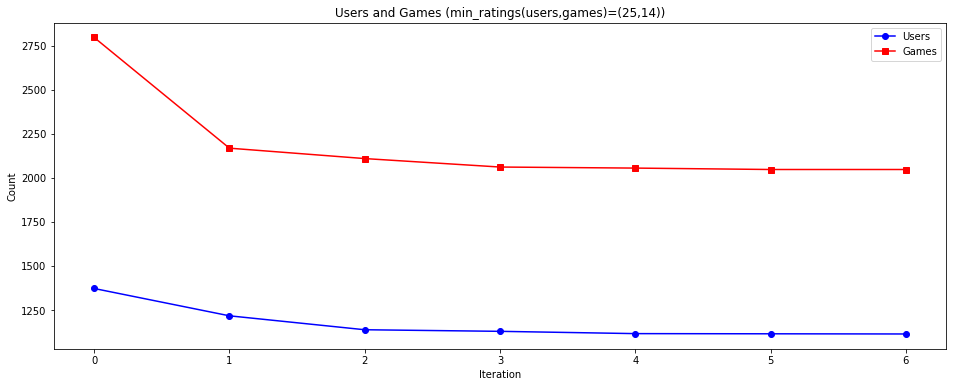

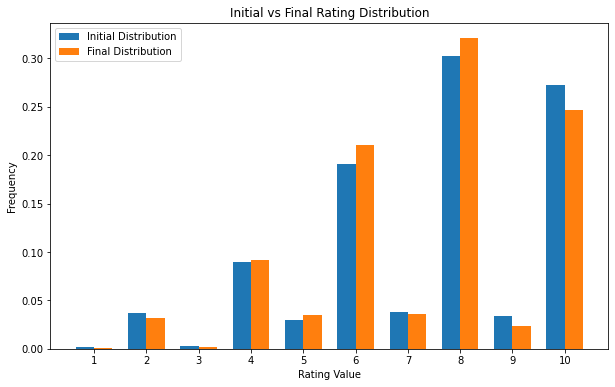


Filtering with min_ratings (min users,min games) = (10,15)
Iteration 0: 2849 users, 2679 games, 122846 ratings, KL-div: 0.0015
Iteration 1: 2518 users, 2330 games, 116227 ratings, KL-div: 0.0020
Iteration 2: 2446 users, 2277 games, 114872 ratings, KL-div: 0.0021
Iteration 3: 2433 users, 2262 games, 114547 ratings, KL-div: 0.0021
Iteration 4: 2428 users, 2261 games, 114488 ratings, KL-div: 0.0021
Iteration 5: 2427 users, 2259 games, 114451 ratings, KL-div: 0.0021
Converged after 6 iterations!
Number of users removed: 11196
Number of games removed: 14107


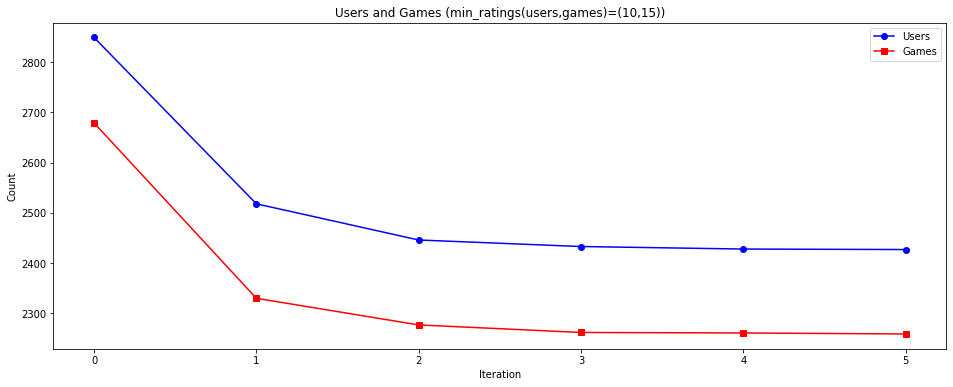

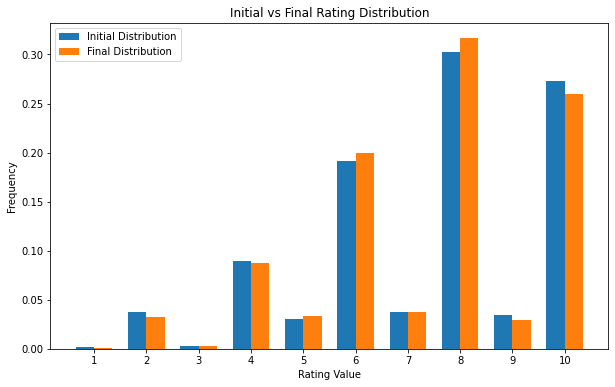


Filtering with min_ratings (min users,min games) = (11,15)
Iteration 0: 2621 users, 2679 games, 120949 ratings, KL-div: 0.0016
Iteration 1: 2354 users, 2298 games, 114218 ratings, KL-div: 0.0021
Iteration 2: 2264 users, 2251 games, 112710 ratings, KL-div: 0.0023
Iteration 3: 2252 users, 2228 games, 112271 ratings, KL-div: 0.0024
Iteration 4: 2244 users, 2228 games, 112191 ratings, KL-div: 0.0024
Iteration 5: 2244 users, 2226 games, 112163 ratings, KL-div: 0.0024
Iteration 6: 2242 users, 2226 games, 112143 ratings, KL-div: 0.0024
Iteration 7: 2242 users, 2225 games, 112129 ratings, KL-div: 0.0024
Converged after 8 iterations!
Number of users removed: 11381
Number of games removed: 14141


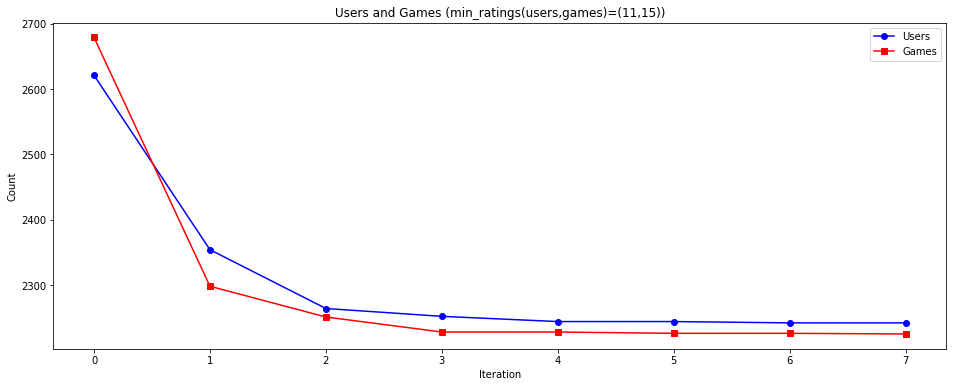

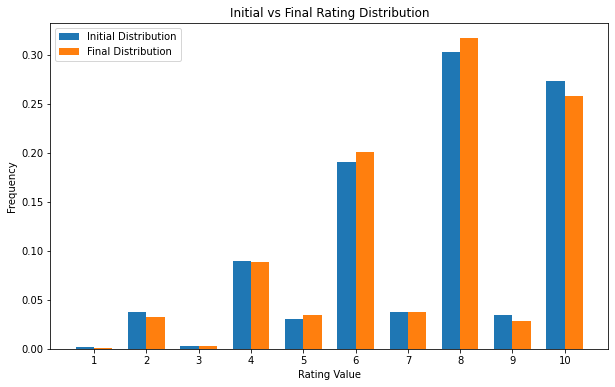


Filtering with min_ratings (min users,min games) = (12,15)
Iteration 0: 2470 users, 2679 games, 119527 ratings, KL-div: 0.0017
Iteration 1: 2205 users, 2285 games, 112480 ratings, KL-div: 0.0023
Iteration 2: 2119 users, 2224 games, 110760 ratings, KL-div: 0.0026
Iteration 3: 2105 users, 2207 games, 110374 ratings, KL-div: 0.0026
Iteration 4: 2101 users, 2205 games, 110302 ratings, KL-div: 0.0027
Iteration 5: 2101 users, 2203 games, 110274 ratings, KL-div: 0.0027
Converged after 6 iterations!
Number of users removed: 11522
Number of games removed: 14163


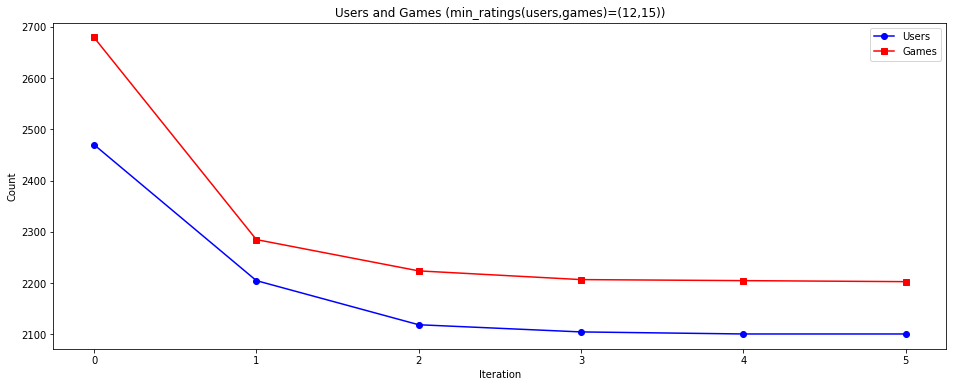

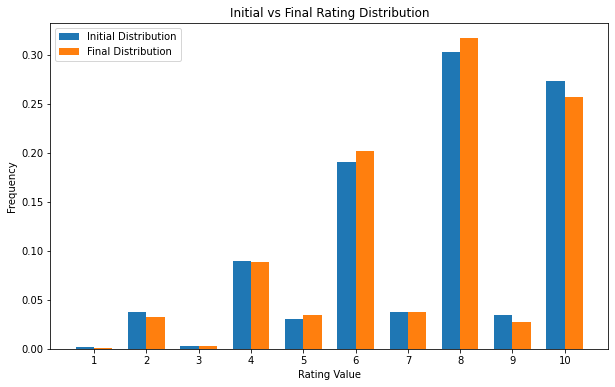


Filtering with min_ratings (min users,min games) = (13,15)
Iteration 0: 2337 users, 2679 games, 118178 ratings, KL-div: 0.0019
Iteration 1: 2059 users, 2262 games, 110528 ratings, KL-div: 0.0025
Iteration 2: 1991 users, 2197 games, 108872 ratings, KL-div: 0.0029
Iteration 3: 1976 users, 2184 games, 108511 ratings, KL-div: 0.0029
Iteration 4: 1974 users, 2182 games, 108459 ratings, KL-div: 0.0030
Iteration 5: 1974 users, 2181 games, 108445 ratings, KL-div: 0.0030
Converged after 6 iterations!
Number of users removed: 11649
Number of games removed: 14185


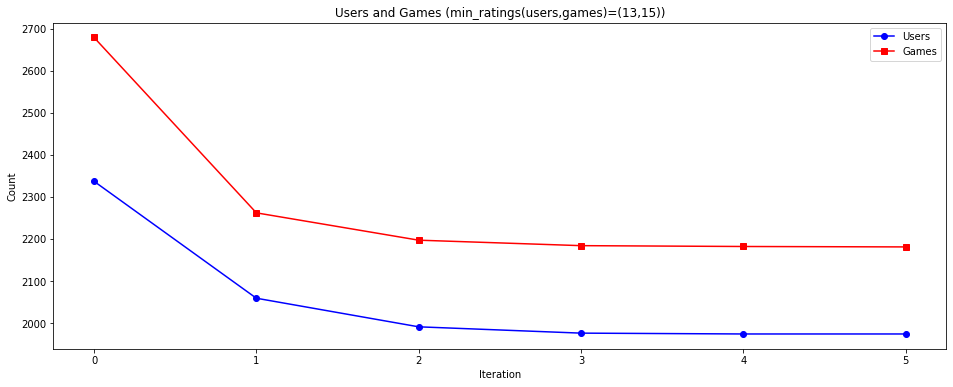

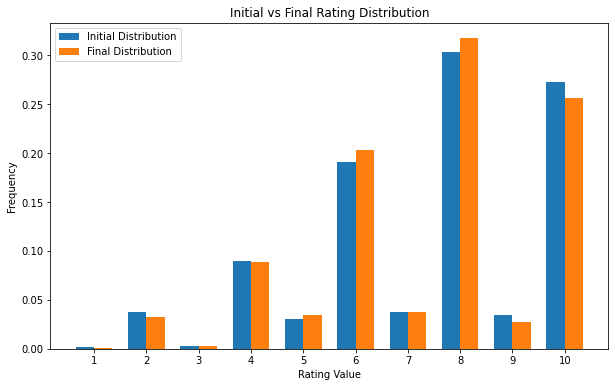


Filtering with min_ratings (min users,min games) = (14,15)
Iteration 0: 2204 users, 2679 games, 116693 ratings, KL-div: 0.0020
Iteration 1: 1942 users, 2228 games, 108633 ratings, KL-div: 0.0028
Iteration 2: 1857 users, 2178 games, 106882 ratings, KL-div: 0.0032
Iteration 3: 1847 users, 2161 games, 106517 ratings, KL-div: 0.0033
Iteration 4: 1844 users, 2156 games, 106409 ratings, KL-div: 0.0033
Iteration 5: 1841 users, 2156 games, 106370 ratings, KL-div: 0.0033
Iteration 6: 1841 users, 2154 games, 106342 ratings, KL-div: 0.0033
Iteration 7: 1839 users, 2154 games, 106316 ratings, KL-div: 0.0033
Iteration 8: 1839 users, 2153 games, 106302 ratings, KL-div: 0.0033
Converged after 9 iterations!
Number of users removed: 11784
Number of games removed: 14213


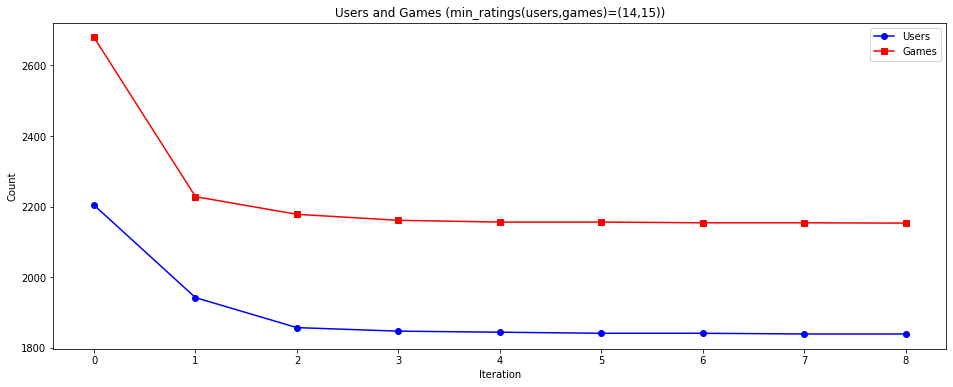

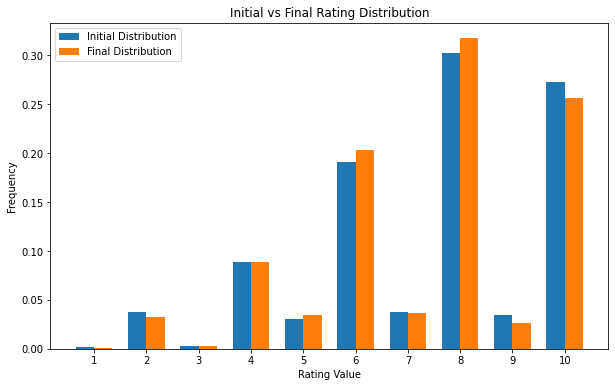


Filtering with min_ratings (min users,min games) = (15,15)
Iteration 0: 2071 users, 2679 games, 115111 ratings, KL-div: 0.0022
Iteration 1: 1833 users, 2204 games, 106864 ratings, KL-div: 0.0030
Iteration 2: 1741 users, 2161 games, 105038 ratings, KL-div: 0.0035
Iteration 3: 1729 users, 2140 games, 104584 ratings, KL-div: 0.0036
Iteration 4: 1727 users, 2132 games, 104445 ratings, KL-div: 0.0036
Iteration 5: 1727 users, 2131 games, 104431 ratings, KL-div: 0.0036
Converged after 6 iterations!
Number of users removed: 11896
Number of games removed: 14235


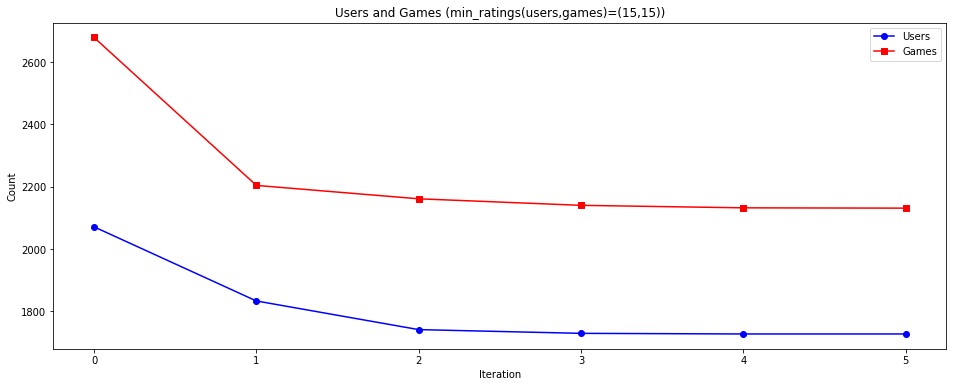

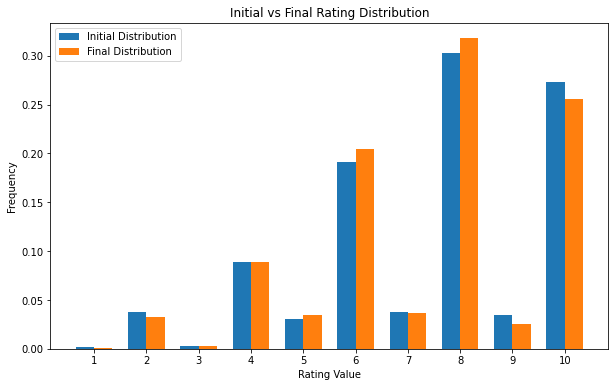


Filtering with min_ratings (min users,min games) = (16,15)
Iteration 0: 1975 users, 2679 games, 113852 ratings, KL-div: 0.0024
Iteration 1: 1730 users, 2196 games, 105295 ratings, KL-div: 0.0033
Iteration 2: 1644 users, 2149 games, 103427 ratings, KL-div: 0.0038
Iteration 3: 1633 users, 2114 games, 102783 ratings, KL-div: 0.0039
Iteration 4: 1624 users, 2110 games, 102594 ratings, KL-div: 0.0040
Iteration 5: 1622 users, 2108 games, 102536 ratings, KL-div: 0.0040
Iteration 6: 1621 users, 2108 games, 102521 ratings, KL-div: 0.0040
Converged after 7 iterations!
Number of users removed: 12002
Number of games removed: 14258


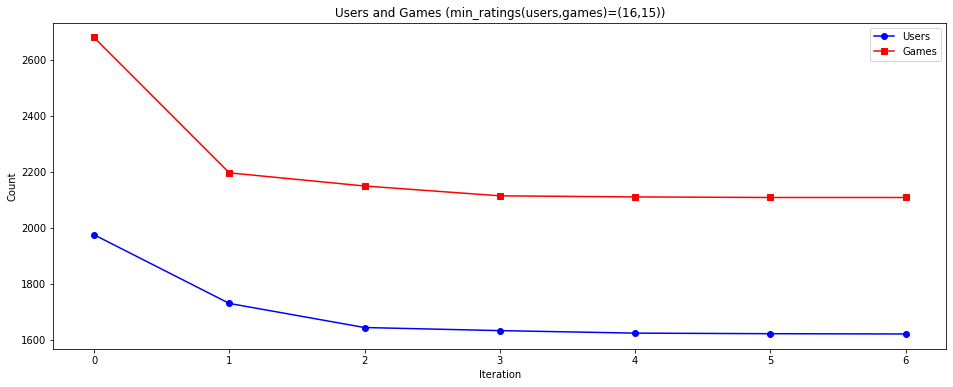

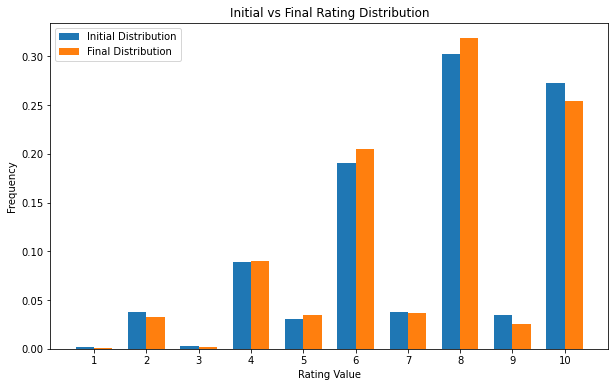


Filtering with min_ratings (min users,min games) = (18,15)
Iteration 0: 1794 users, 2679 games, 111327 ratings, KL-div: 0.0027
Iteration 1: 1581 users, 2159 games, 102504 ratings, KL-div: 0.0039
Iteration 2: 1487 users, 2101 games, 100229 ratings, KL-div: 0.0045
Iteration 3: 1476 users, 2070 games, 99619 ratings, KL-div: 0.0047
Iteration 4: 1473 users, 2062 games, 99456 ratings, KL-div: 0.0047
Iteration 5: 1472 users, 2062 games, 99439 ratings, KL-div: 0.0047
Iteration 6: 1472 users, 2061 games, 99425 ratings, KL-div: 0.0047
Converged after 7 iterations!
Number of users removed: 12151
Number of games removed: 14305


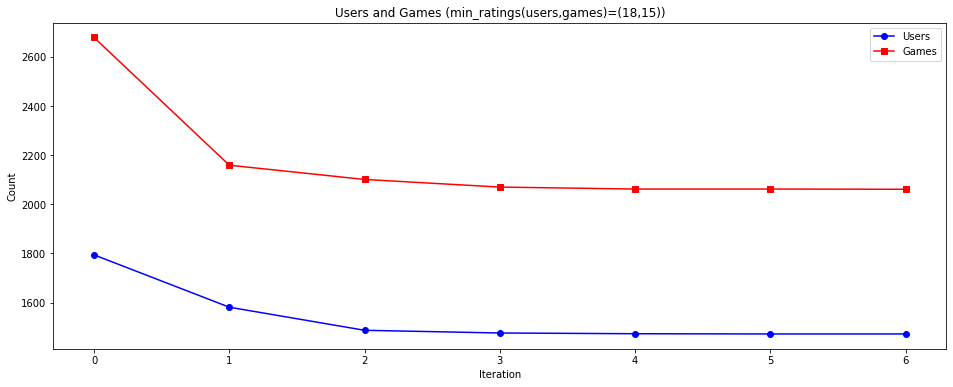

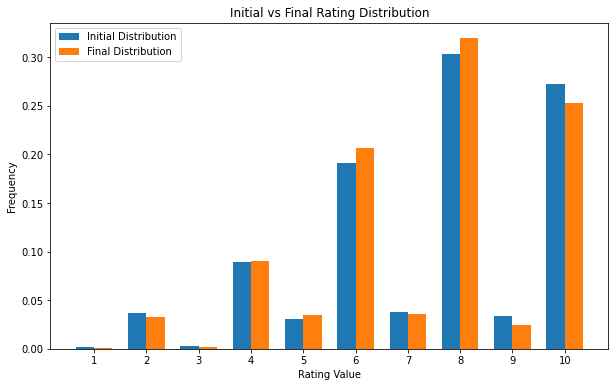


Filtering with min_ratings (min users,min games) = (20,15)
Iteration 0: 1631 users, 2679 games, 108839 ratings, KL-div: 0.0032
Iteration 1: 1450 users, 2124 games, 99809 ratings, KL-div: 0.0045
Iteration 2: 1365 users, 2066 games, 97512 ratings, KL-div: 0.0049
Iteration 3: 1359 users, 2027 games, 96858 ratings, KL-div: 0.0049
Iteration 4: 1349 users, 2022 games, 96599 ratings, KL-div: 0.0050
Iteration 5: 1349 users, 2020 games, 96571 ratings, KL-div: 0.0050
Converged after 6 iterations!
Number of users removed: 12274
Number of games removed: 14346


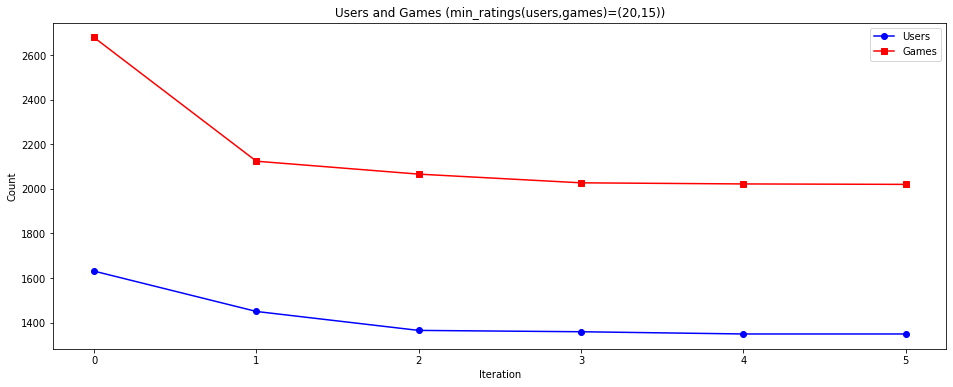

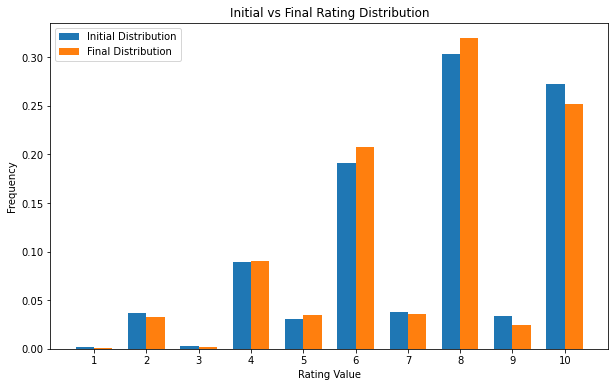


Filtering with min_ratings (min users,min games) = (22,15)
Iteration 0: 1520 users, 2679 games, 106826 ratings, KL-div: 0.0036
Iteration 1: 1337 users, 2084 games, 97145 ratings, KL-div: 0.0049
Iteration 2: 1257 users, 2030 games, 94824 ratings, KL-div: 0.0055
Iteration 3: 1250 users, 1992 games, 94153 ratings, KL-div: 0.0055
Iteration 4: 1241 users, 1988 games, 93909 ratings, KL-div: 0.0056
Iteration 5: 1241 users, 1982 games, 93826 ratings, KL-div: 0.0056
Iteration 6: 1238 users, 1982 games, 93763 ratings, KL-div: 0.0056
Iteration 7: 1238 users, 1978 games, 93707 ratings, KL-div: 0.0057
Iteration 8: 1237 users, 1978 games, 93686 ratings, KL-div: 0.0057
Iteration 9: 1237 users, 1977 games, 93672 ratings, KL-div: 0.0057


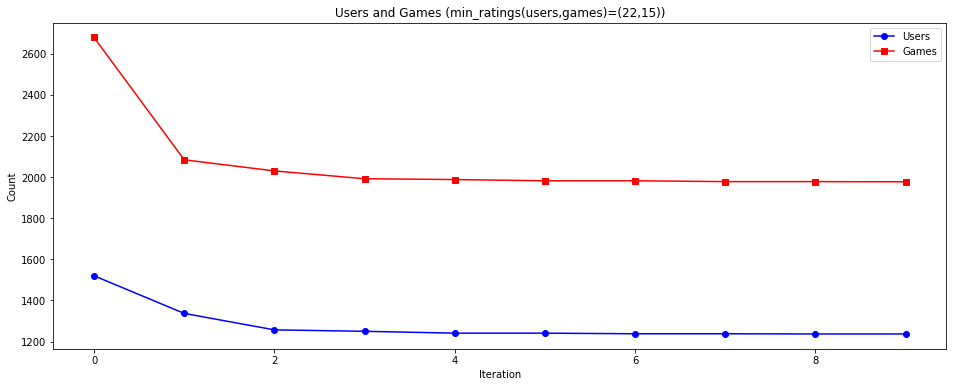

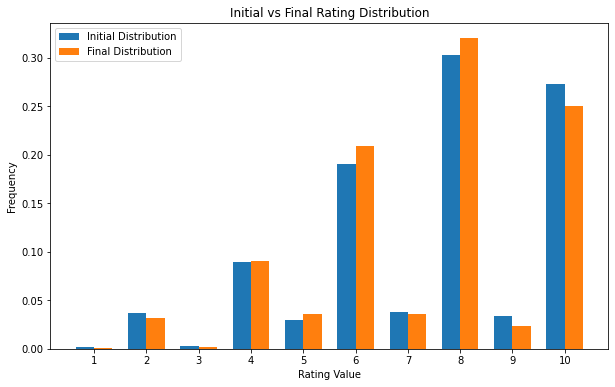


Filtering with min_ratings (min users,min games) = (25,15)
Iteration 0: 1372 users, 2679 games, 103975 ratings, KL-div: 0.0040
Iteration 1: 1208 users, 2046 games, 93899 ratings, KL-div: 0.0053
Iteration 2: 1110 users, 1983 games, 90830 ratings, KL-div: 0.0062
Iteration 3: 1103 users, 1932 games, 89968 ratings, KL-div: 0.0066
Iteration 4: 1094 users, 1929 games, 89714 ratings, KL-div: 0.0068
Iteration 5: 1093 users, 1922 games, 89592 ratings, KL-div: 0.0069
Iteration 6: 1093 users, 1921 games, 89578 ratings, KL-div: 0.0069
Converged after 7 iterations!
Number of users removed: 12530
Number of games removed: 14445


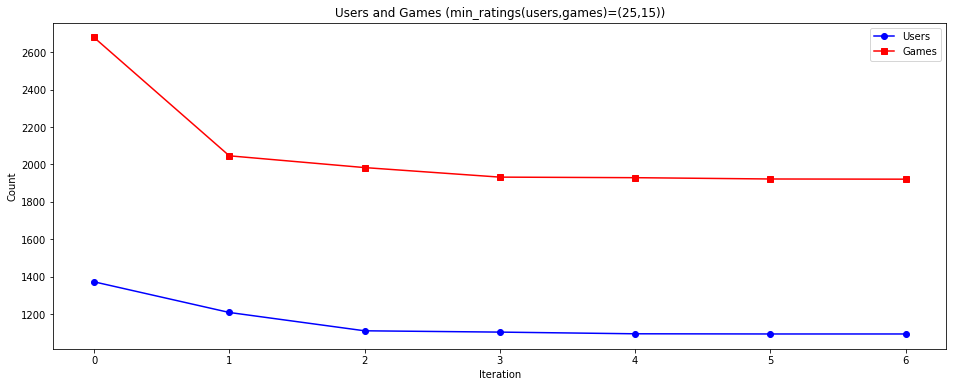

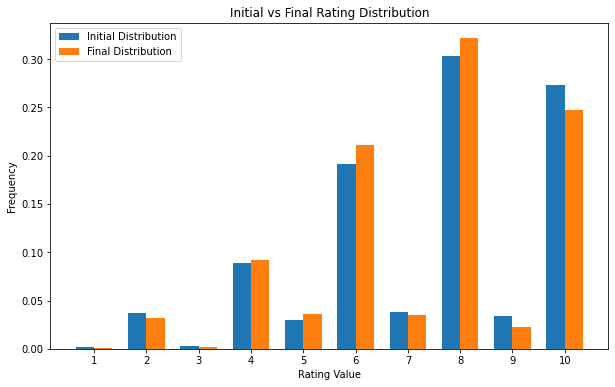


Filtering with min_ratings (min users,min games) = (10,16)
Iteration 0: 2849 users, 2567 games, 121424 ratings, KL-div: 0.0015
Iteration 1: 2497 users, 2221 games, 114465 ratings, KL-div: 0.0020
Iteration 2: 2416 users, 2170 games, 113023 ratings, KL-div: 0.0021
Iteration 3: 2404 users, 2155 games, 112691 ratings, KL-div: 0.0022
Iteration 4: 2400 users, 2153 games, 112626 ratings, KL-div: 0.0022
Iteration 5: 2398 users, 2151 games, 112578 ratings, KL-div: 0.0022
Iteration 6: 2397 users, 2151 games, 112569 ratings, KL-div: 0.0022
Converged after 7 iterations!
Number of users removed: 11226
Number of games removed: 14215


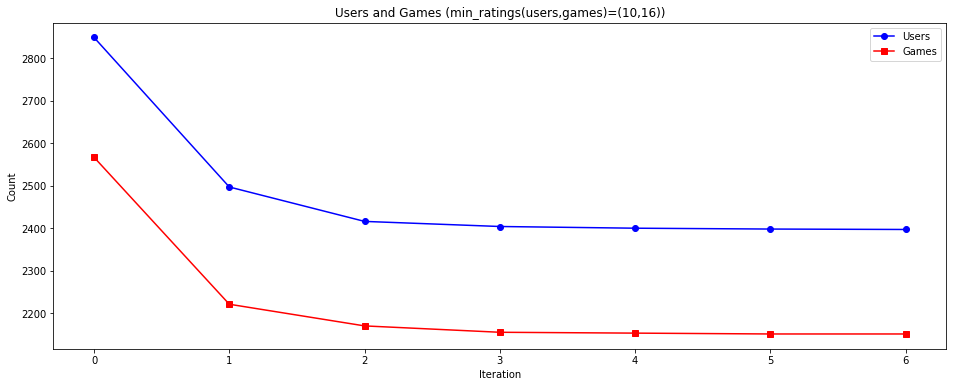

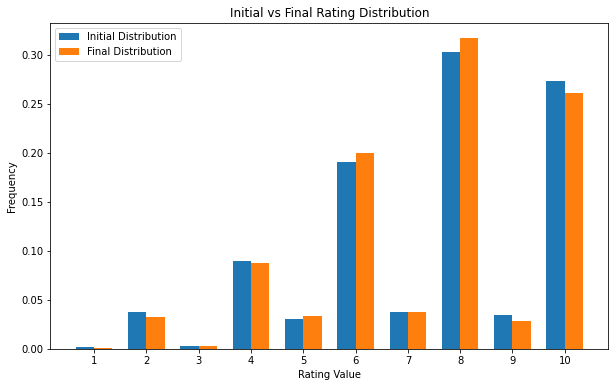


Filtering with min_ratings (min users,min games) = (11,16)
Iteration 0: 2621 users, 2567 games, 119550 ratings, KL-div: 0.0017
Iteration 1: 2340 users, 2190 games, 112516 ratings, KL-div: 0.0022
Iteration 2: 2238 users, 2146 games, 110904 ratings, KL-div: 0.0024
Iteration 3: 2226 users, 2123 games, 110440 ratings, KL-div: 0.0025
Iteration 4: 2216 users, 2121 games, 110311 ratings, KL-div: 0.0025
Iteration 5: 2216 users, 2119 games, 110281 ratings, KL-div: 0.0025
Converged after 6 iterations!
Number of users removed: 11407
Number of games removed: 14247


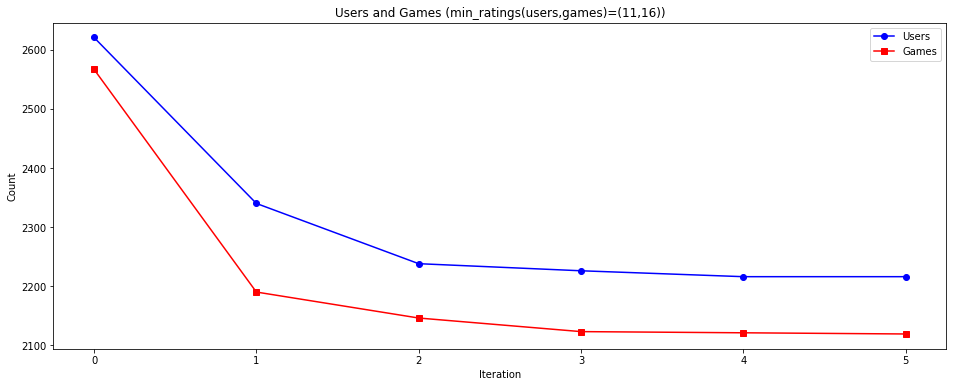

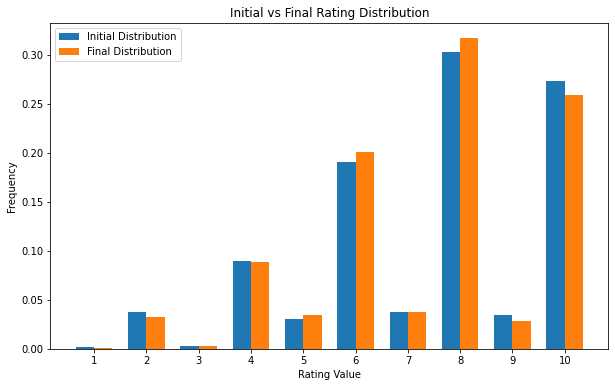


Filtering with min_ratings (min users,min games) = (12,16)
Iteration 0: 2470 users, 2567 games, 118138 ratings, KL-div: 0.0017
Iteration 1: 2177 users, 2179 games, 110686 ratings, KL-div: 0.0024
Iteration 2: 2098 users, 2120 games, 108997 ratings, KL-div: 0.0026
Iteration 3: 2082 users, 2104 games, 108585 ratings, KL-div: 0.0027
Iteration 4: 2080 users, 2100 games, 108503 ratings, KL-div: 0.0027
Iteration 5: 2078 users, 2099 games, 108466 ratings, KL-div: 0.0027
Iteration 6: 2078 users, 2097 games, 108436 ratings, KL-div: 0.0027
Converged after 7 iterations!
Number of users removed: 11545
Number of games removed: 14269


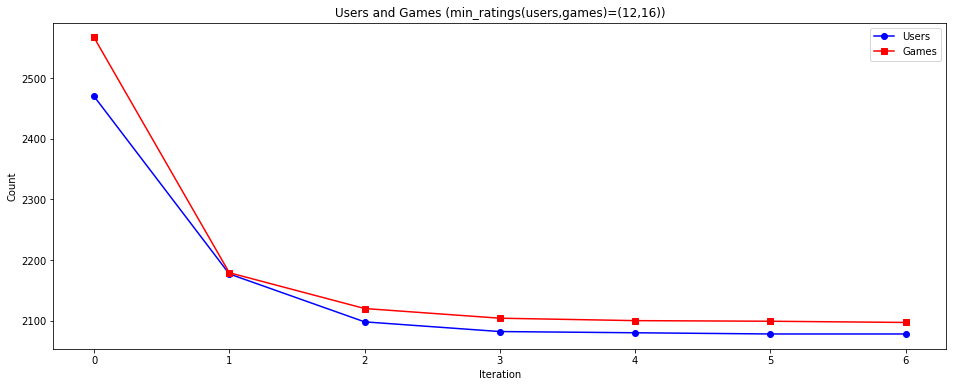

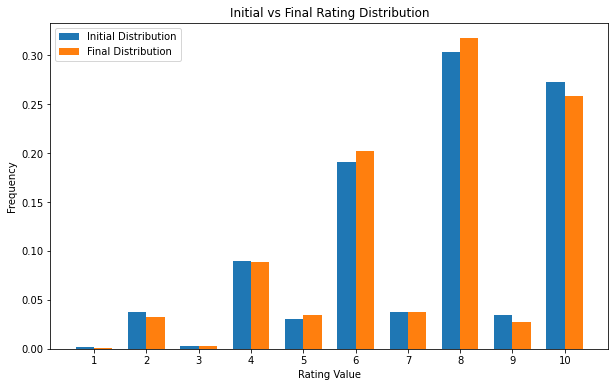


Filtering with min_ratings (min users,min games) = (13,16)
Iteration 0: 2337 users, 2567 games, 116809 ratings, KL-div: 0.0019
Iteration 1: 2045 users, 2157 games, 108877 ratings, KL-div: 0.0025
Iteration 2: 1970 users, 2092 games, 107062 ratings, KL-div: 0.0030
Iteration 3: 1956 users, 2075 games, 106643 ratings, KL-div: 0.0030
Iteration 4: 1953 users, 2072 games, 106562 ratings, KL-div: 0.0031
Iteration 5: 1953 users, 2070 games, 106532 ratings, KL-div: 0.0031
Iteration 6: 1952 users, 2070 games, 106520 ratings, KL-div: 0.0031
Converged after 7 iterations!
Number of users removed: 11671
Number of games removed: 14296


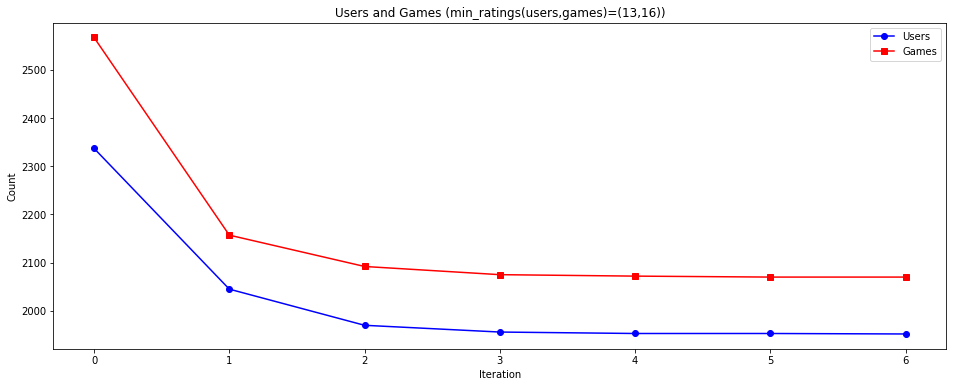

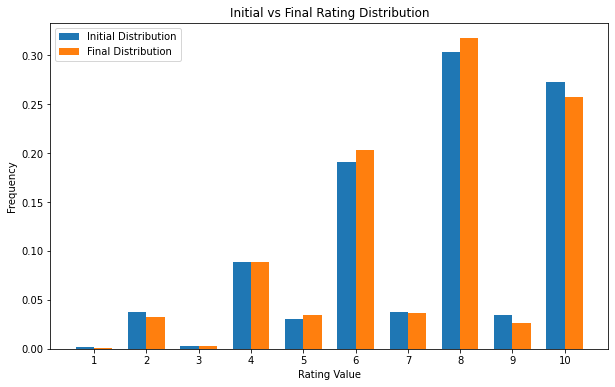


Filtering with min_ratings (min users,min games) = (14,16)
Iteration 0: 2204 users, 2567 games, 115330 ratings, KL-div: 0.0020
Iteration 1: 1929 users, 2131 games, 107068 ratings, KL-div: 0.0028
Iteration 2: 1836 users, 2073 games, 105057 ratings, KL-div: 0.0033
Iteration 3: 1827 users, 2051 games, 104617 ratings, KL-div: 0.0033
Iteration 4: 1817 users, 2049 games, 104459 ratings, KL-div: 0.0034
Iteration 5: 1815 users, 2047 games, 104403 ratings, KL-div: 0.0034
Iteration 6: 1815 users, 2045 games, 104373 ratings, KL-div: 0.0034
Converged after 7 iterations!
Number of users removed: 11808
Number of games removed: 14321


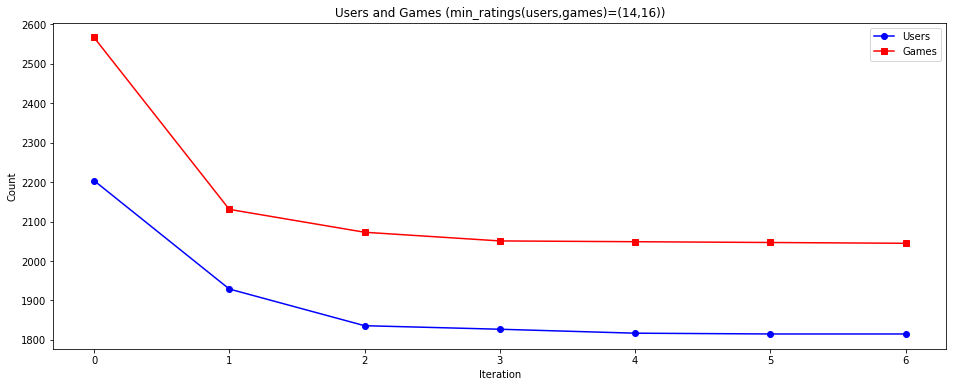

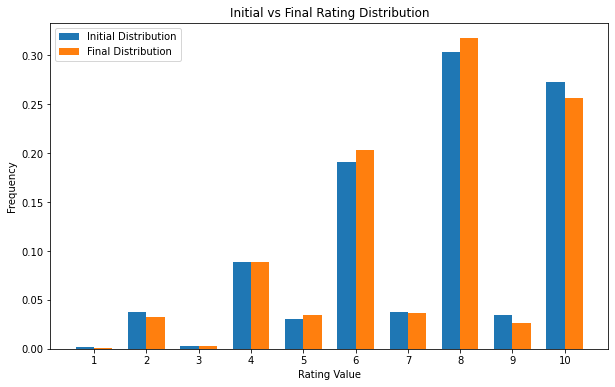


Filtering with min_ratings (min users,min games) = (15,16)
Iteration 0: 2071 users, 2567 games, 113766 ratings, KL-div: 0.0022
Iteration 1: 1819 users, 2108 games, 105280 ratings, KL-div: 0.0030
Iteration 2: 1722 users, 2055 games, 103208 ratings, KL-div: 0.0035
Iteration 3: 1717 users, 2022 games, 102658 ratings, KL-div: 0.0036
Iteration 4: 1706 users, 2019 games, 102460 ratings, KL-div: 0.0037
Iteration 5: 1706 users, 2016 games, 102415 ratings, KL-div: 0.0037
Iteration 6: 1705 users, 2016 games, 102401 ratings, KL-div: 0.0037
Converged after 7 iterations!
Number of users removed: 11918
Number of games removed: 14350


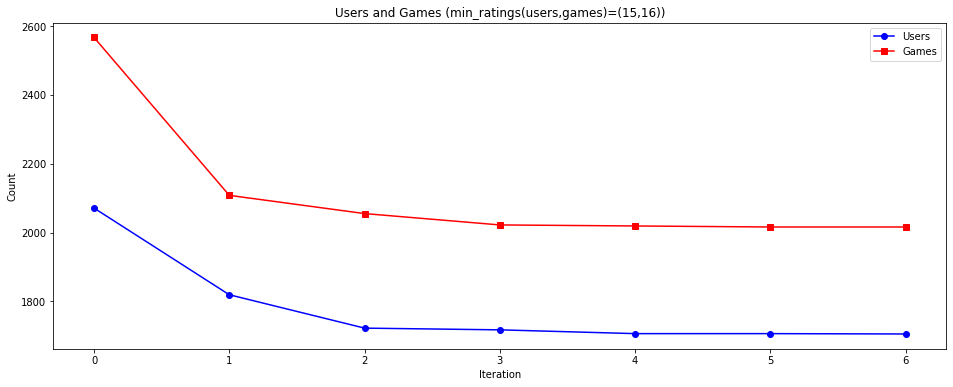

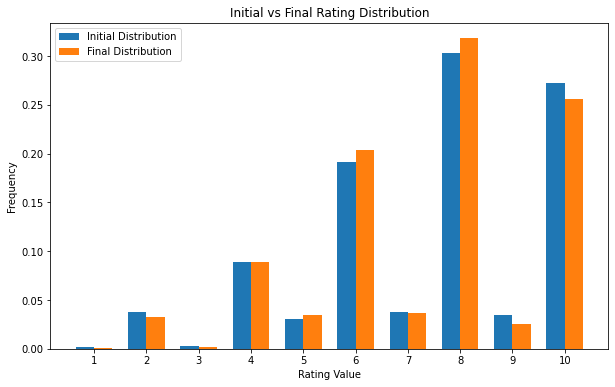


Filtering with min_ratings (min users,min games) = (16,16)
Iteration 0: 1975 users, 2567 games, 112515 ratings, KL-div: 0.0024
Iteration 1: 1716 users, 2093 games, 103603 ratings, KL-div: 0.0033
Iteration 2: 1625 users, 2029 games, 101383 ratings, KL-div: 0.0039
Iteration 3: 1608 users, 1998 games, 100678 ratings, KL-div: 0.0041
Iteration 4: 1595 users, 1992 games, 100395 ratings, KL-div: 0.0042
Iteration 5: 1594 users, 1989 games, 100335 ratings, KL-div: 0.0042
Converged after 6 iterations!
Number of users removed: 12029
Number of games removed: 14377


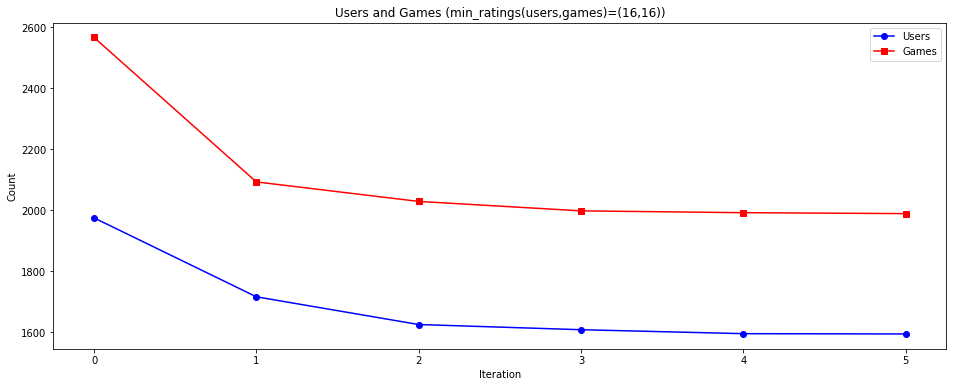

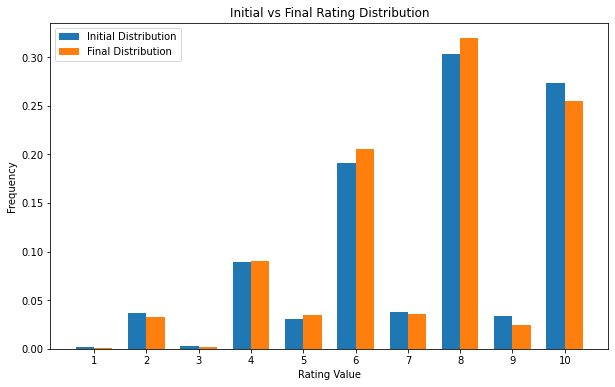


Filtering with min_ratings (min users,min games) = (18,16)
Iteration 0: 1794 users, 2567 games, 110020 ratings, KL-div: 0.0027
Iteration 1: 1566 users, 2062 games, 100884 ratings, KL-div: 0.0038
Iteration 2: 1474 users, 1991 games, 98399 ratings, KL-div: 0.0045
Iteration 3: 1465 users, 1961 games, 97808 ratings, KL-div: 0.0047
Iteration 4: 1457 users, 1956 games, 97599 ratings, KL-div: 0.0048
Iteration 5: 1456 users, 1952 games, 97522 ratings, KL-div: 0.0048
Converged after 6 iterations!
Number of users removed: 12167
Number of games removed: 14414


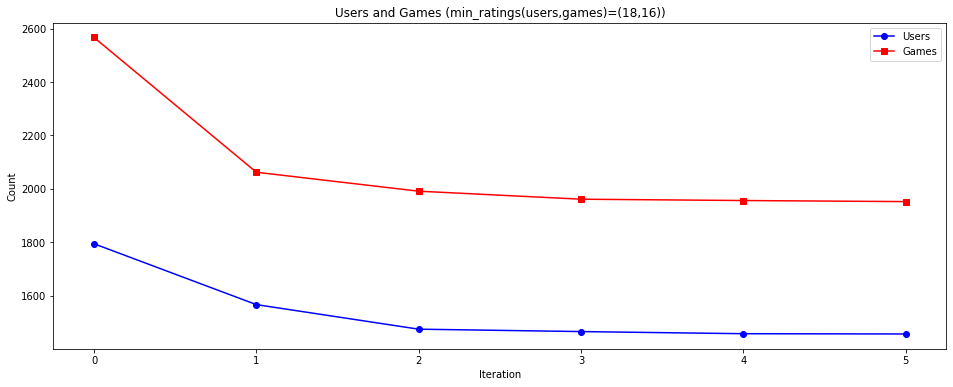

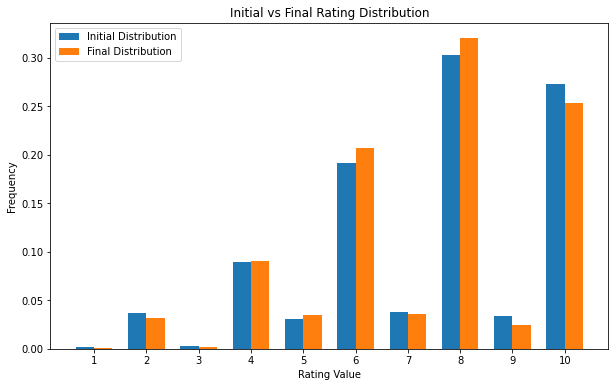


Filtering with min_ratings (min users,min games) = (20,16)
Iteration 0: 1631 users, 2567 games, 107561 ratings, KL-div: 0.0032
Iteration 1: 1433 users, 2018 games, 98011 ratings, KL-div: 0.0045
Iteration 2: 1358 users, 1951 games, 95698 ratings, KL-div: 0.0050
Iteration 3: 1339 users, 1919 games, 94868 ratings, KL-div: 0.0052
Iteration 4: 1332 users, 1911 games, 94616 ratings, KL-div: 0.0052
Iteration 5: 1328 users, 1910 games, 94525 ratings, KL-div: 0.0052
Converged after 6 iterations!
Number of users removed: 12295
Number of games removed: 14456


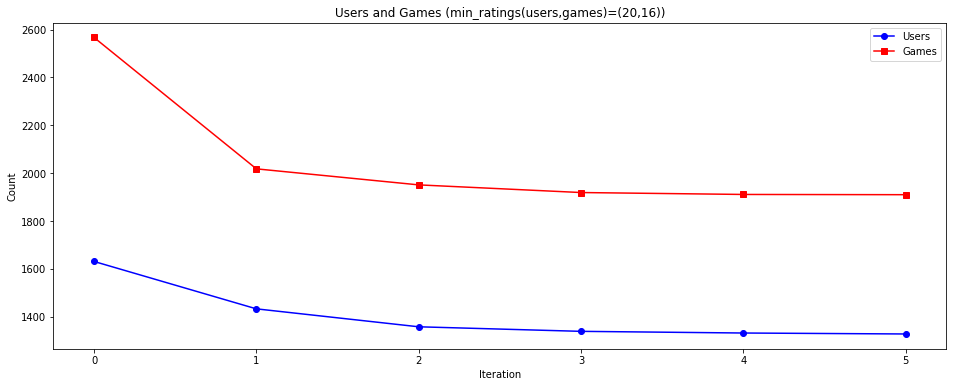

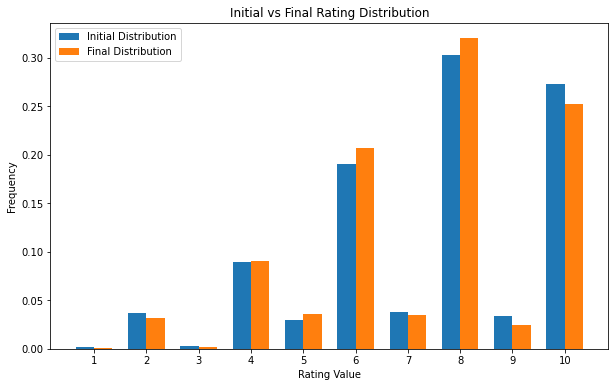


Filtering with min_ratings (min users,min games) = (22,16)
Iteration 0: 1520 users, 2567 games, 105575 ratings, KL-div: 0.0036
Iteration 1: 1324 users, 1986 games, 95476 ratings, KL-div: 0.0048
Iteration 2: 1245 users, 1918 games, 92931 ratings, KL-div: 0.0056
Iteration 3: 1228 users, 1880 games, 92027 ratings, KL-div: 0.0057
Iteration 4: 1223 users, 1871 games, 91788 ratings, KL-div: 0.0058
Iteration 5: 1219 users, 1868 games, 91660 ratings, KL-div: 0.0058
Iteration 6: 1219 users, 1866 games, 91630 ratings, KL-div: 0.0058
Converged after 7 iterations!
Number of users removed: 12404
Number of games removed: 14500


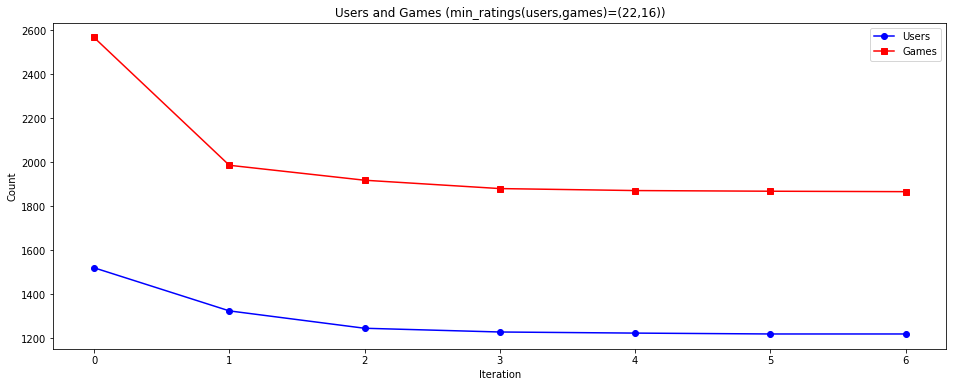

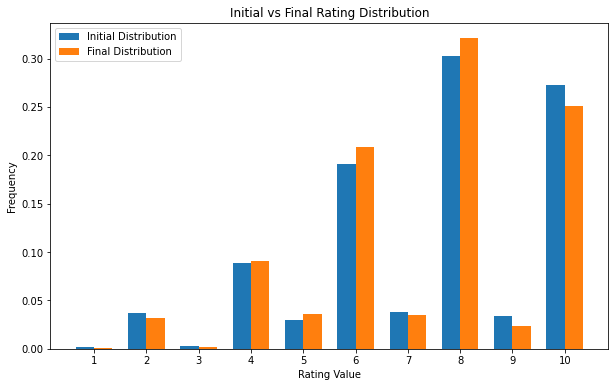


Filtering with min_ratings (min users,min games) = (25,16)
Iteration 0: 1372 users, 2567 games, 102751 ratings, KL-div: 0.0039
Iteration 1: 1200 users, 1950 games, 92330 ratings, KL-div: 0.0053
Iteration 2: 1098 users, 1865 games, 88841 ratings, KL-div: 0.0065
Iteration 3: 1085 users, 1808 games, 87692 ratings, KL-div: 0.0070
Iteration 4: 1078 users, 1805 games, 87481 ratings, KL-div: 0.0071
Converged after 5 iterations!
Number of users removed: 12545
Number of games removed: 14561


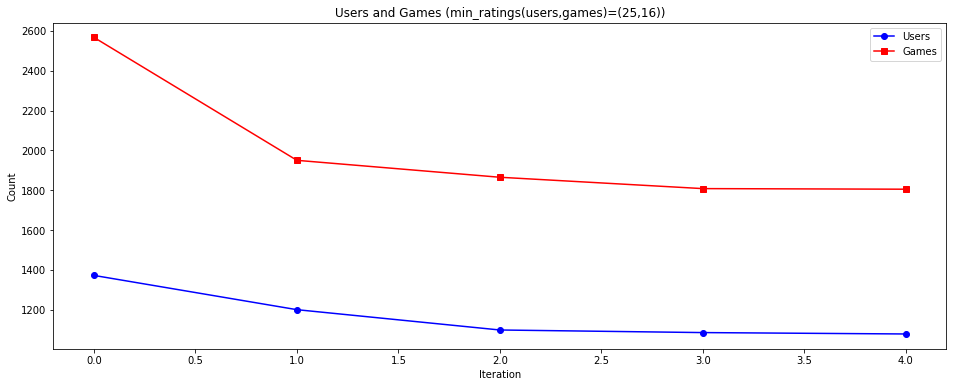

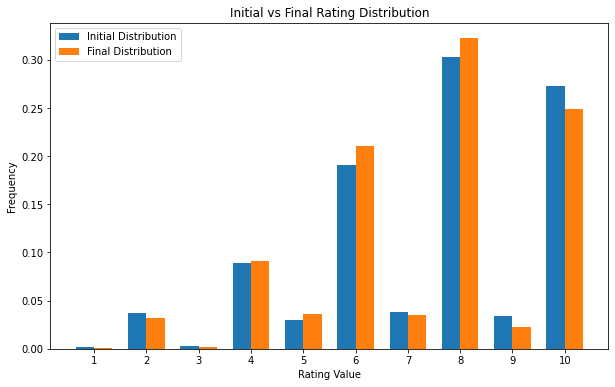


Filtering with min_ratings (min users,min games) = (10,18)
Iteration 0: 2849 users, 2329 games, 118196 ratings, KL-div: 0.0015
Iteration 1: 2457 users, 2003 games, 110647 ratings, KL-div: 0.0021
Iteration 2: 2361 users, 1965 games, 109205 ratings, KL-div: 0.0023
Iteration 3: 2352 users, 1944 games, 108769 ratings, KL-div: 0.0024
Iteration 4: 2341 users, 1943 games, 108653 ratings, KL-div: 0.0024
Iteration 5: 2341 users, 1941 games, 108619 ratings, KL-div: 0.0024
Converged after 6 iterations!
Number of users removed: 11282
Number of games removed: 14425


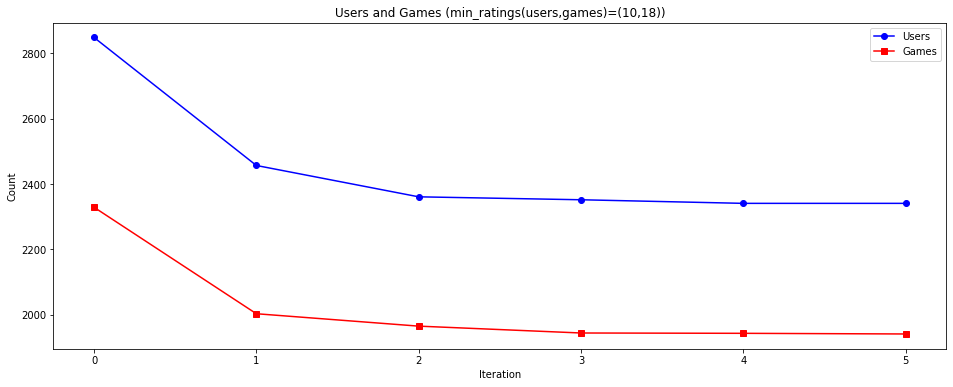

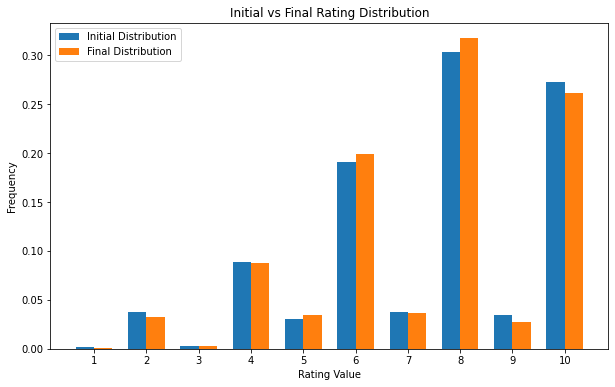


Filtering with min_ratings (min users,min games) = (11,18)
Iteration 0: 2621 users, 2329 games, 116374 ratings, KL-div: 0.0017
Iteration 1: 2286 users, 1979 games, 108639 ratings, KL-div: 0.0023
Iteration 2: 2191 users, 1934 games, 107002 ratings, KL-div: 0.0026
Iteration 3: 2183 users, 1914 games, 106585 ratings, KL-div: 0.0026
Iteration 4: 2178 users, 1914 games, 106535 ratings, KL-div: 0.0026
Converged after 5 iterations!
Number of users removed: 11445
Number of games removed: 14452


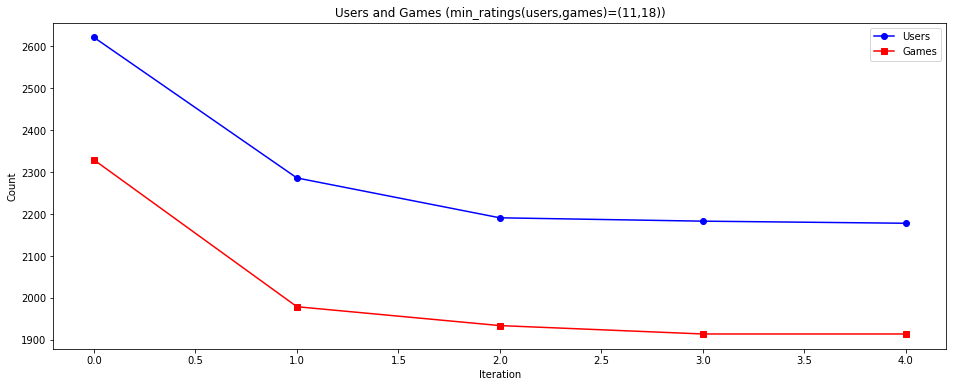

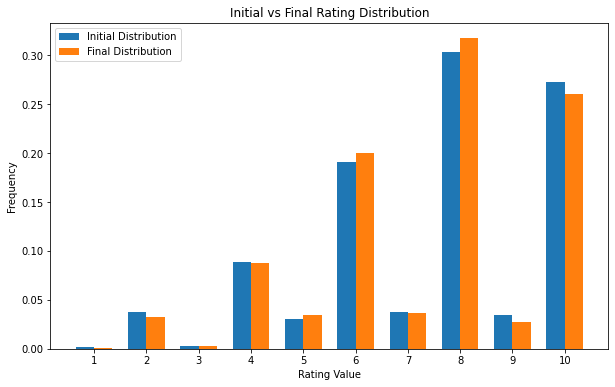


Filtering with min_ratings (min users,min games) = (12,18)
Iteration 0: 2470 users, 2329 games, 114988 ratings, KL-div: 0.0018
Iteration 1: 2132 users, 1961 games, 106770 ratings, KL-div: 0.0026
Iteration 2: 2048 users, 1903 games, 104921 ratings, KL-div: 0.0028
Iteration 3: 2037 users, 1891 games, 104599 ratings, KL-div: 0.0029
Iteration 4: 2034 users, 1885 games, 104465 ratings, KL-div: 0.0029
Iteration 5: 2032 users, 1885 games, 104443 ratings, KL-div: 0.0029
Converged after 6 iterations!
Number of users removed: 11591
Number of games removed: 14481


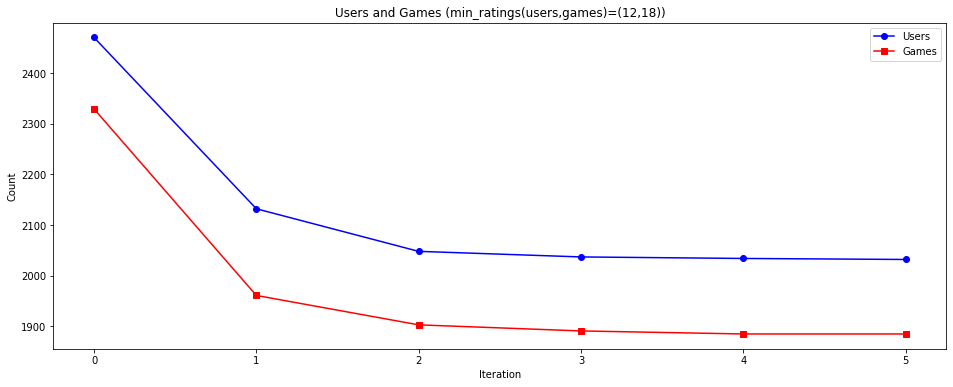

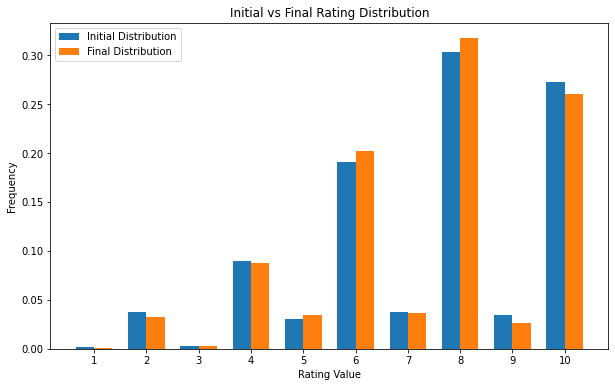


Filtering with min_ratings (min users,min games) = (13,18)
Iteration 0: 2337 users, 2329 games, 113693 ratings, KL-div: 0.0019
Iteration 1: 2009 users, 1941 games, 105052 ratings, KL-div: 0.0027
Iteration 2: 1918 users, 1885 games, 103072 ratings, KL-div: 0.0032
Iteration 3: 1903 users, 1859 games, 102456 ratings, KL-div: 0.0033
Iteration 4: 1892 users, 1858 games, 102307 ratings, KL-div: 0.0033
Iteration 5: 1892 users, 1853 games, 102223 ratings, KL-div: 0.0033
Converged after 6 iterations!
Number of users removed: 11731
Number of games removed: 14513


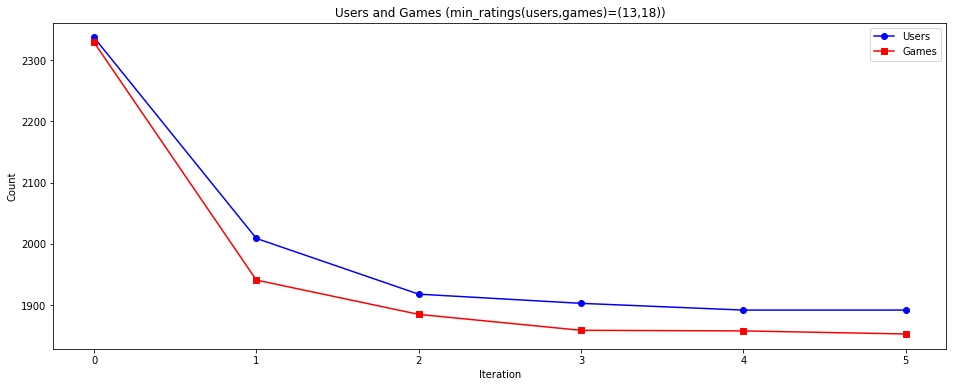

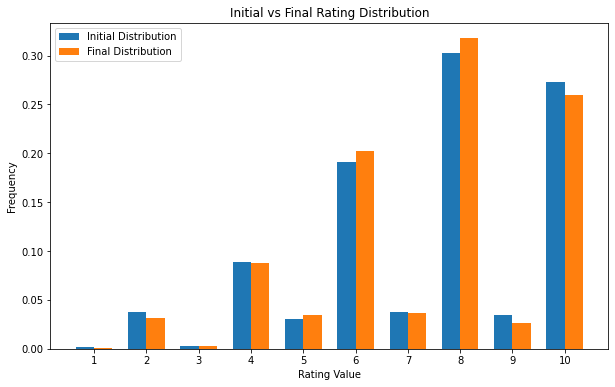


Filtering with min_ratings (min users,min games) = (14,18)
Iteration 0: 2204 users, 2329 games, 112253 ratings, KL-div: 0.0020
Iteration 1: 1891 users, 1932 games, 103442 ratings, KL-div: 0.0030
Iteration 2: 1794 users, 1861 games, 101078 ratings, KL-div: 0.0035
Iteration 3: 1771 users, 1839 games, 100416 ratings, KL-div: 0.0037
Iteration 4: 1760 users, 1828 games, 100087 ratings, KL-div: 0.0038
Iteration 5: 1753 users, 1825 games, 99945 ratings, KL-div: 0.0038
Iteration 6: 1753 users, 1824 games, 99928 ratings, KL-div: 0.0038
Converged after 7 iterations!
Number of users removed: 11870
Number of games removed: 14542


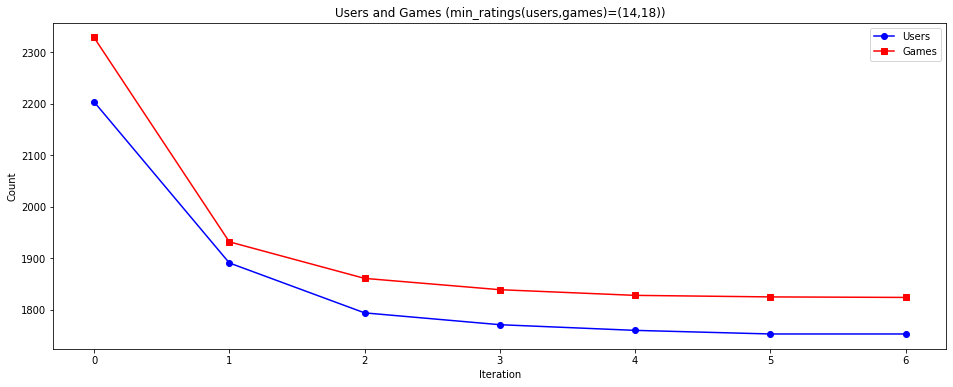

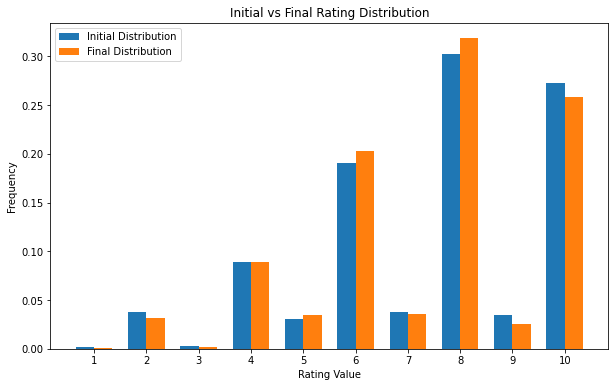


Filtering with min_ratings (min users,min games) = (15,18)
Iteration 0: 2071 users, 2329 games, 110738 ratings, KL-div: 0.0022
Iteration 1: 1789 users, 1898 games, 101542 ratings, KL-div: 0.0031
Iteration 2: 1687 users, 1840 games, 99262 ratings, KL-div: 0.0038
Iteration 3: 1670 users, 1810 games, 98528 ratings, KL-div: 0.0040
Iteration 4: 1660 users, 1807 games, 98339 ratings, KL-div: 0.0041
Iteration 5: 1658 users, 1805 games, 98277 ratings, KL-div: 0.0041
Iteration 6: 1658 users, 1804 games, 98260 ratings, KL-div: 0.0041
Converged after 7 iterations!
Number of users removed: 11965
Number of games removed: 14562


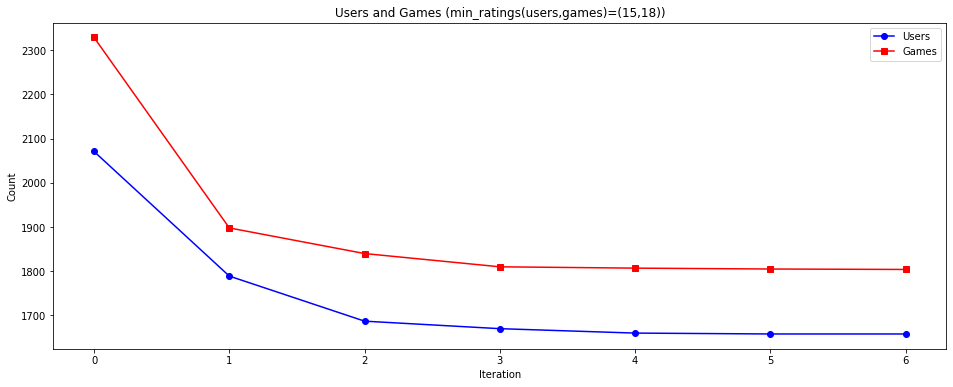

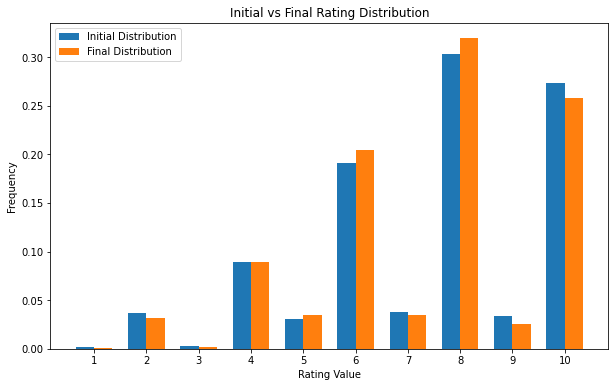


Filtering with min_ratings (min users,min games) = (16,18)
Iteration 0: 1975 users, 2329 games, 109510 ratings, KL-div: 0.0024
Iteration 1: 1677 users, 1883 games, 99736 ratings, KL-div: 0.0035
Iteration 2: 1581 users, 1813 games, 97247 ratings, KL-div: 0.0042
Iteration 3: 1563 users, 1794 games, 96664 ratings, KL-div: 0.0044
Iteration 4: 1555 users, 1785 games, 96396 ratings, KL-div: 0.0045
Iteration 5: 1554 users, 1782 games, 96330 ratings, KL-div: 0.0046
Iteration 6: 1554 users, 1781 games, 96313 ratings, KL-div: 0.0046
Converged after 7 iterations!
Number of users removed: 12069
Number of games removed: 14585


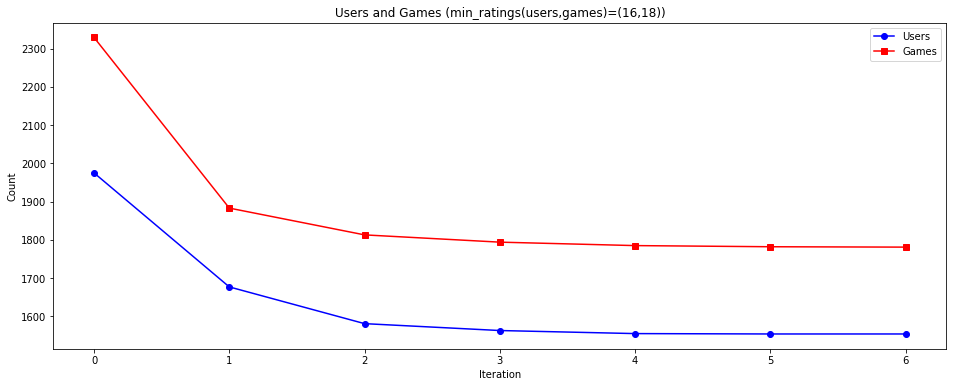

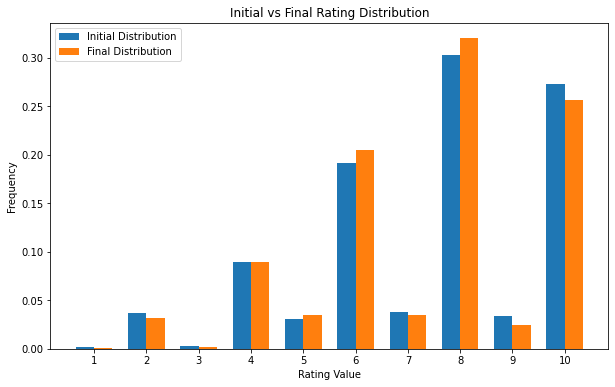


Filtering with min_ratings (min users,min games) = (18,18)
Iteration 0: 1794 users, 2329 games, 107081 ratings, KL-div: 0.0027
Iteration 1: 1524 users, 1844 games, 96801 ratings, KL-div: 0.0042
Iteration 2: 1441 users, 1782 games, 94481 ratings, KL-div: 0.0048
Iteration 3: 1424 users, 1748 games, 93625 ratings, KL-div: 0.0051
Iteration 4: 1417 users, 1744 games, 93440 ratings, KL-div: 0.0052
Iteration 5: 1417 users, 1743 games, 93423 ratings, KL-div: 0.0052
Converged after 6 iterations!
Number of users removed: 12206
Number of games removed: 14623


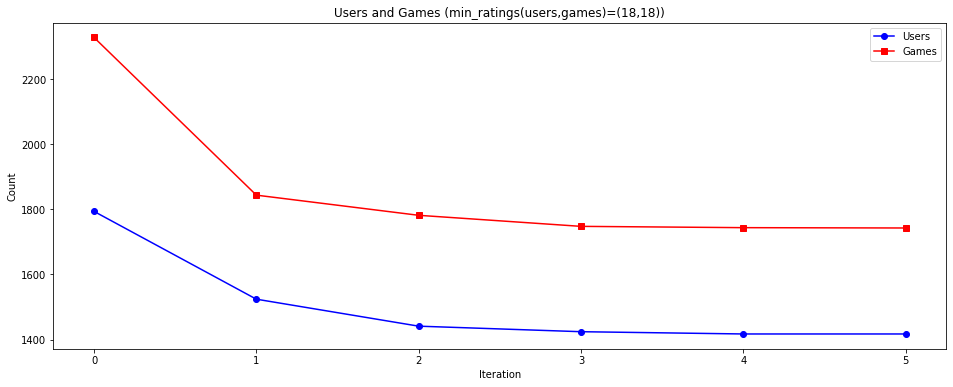

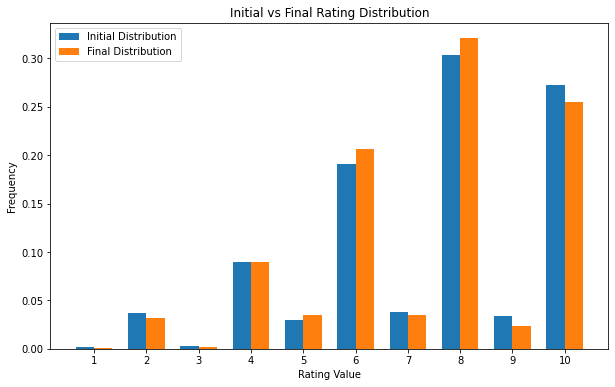


Filtering with min_ratings (min users,min games) = (20,18)
Iteration 0: 1631 users, 2329 games, 104693 ratings, KL-div: 0.0031
Iteration 1: 1400 users, 1817 games, 94254 ratings, KL-div: 0.0047
Iteration 2: 1318 users, 1743 games, 91598 ratings, KL-div: 0.0053
Iteration 3: 1296 users, 1705 games, 90547 ratings, KL-div: 0.0056
Iteration 4: 1288 users, 1695 games, 90226 ratings, KL-div: 0.0057
Iteration 5: 1287 users, 1692 games, 90156 ratings, KL-div: 0.0058
Iteration 6: 1285 users, 1692 games, 90118 ratings, KL-div: 0.0058
Iteration 7: 1285 users, 1691 games, 90101 ratings, KL-div: 0.0058
Converged after 8 iterations!
Number of users removed: 12338
Number of games removed: 14675


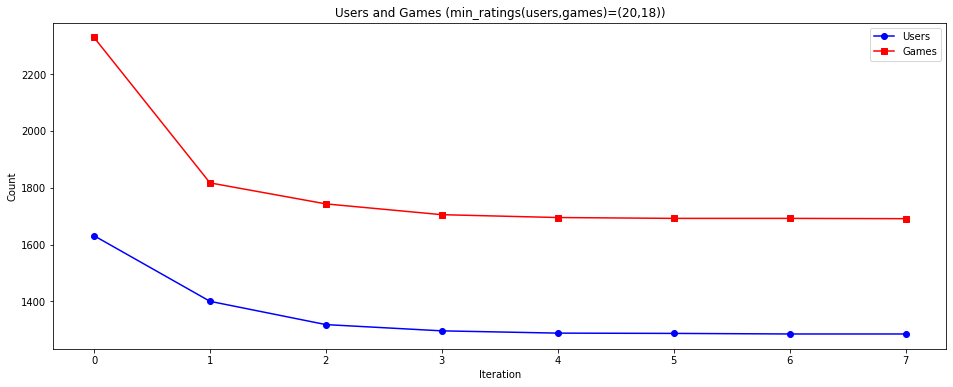

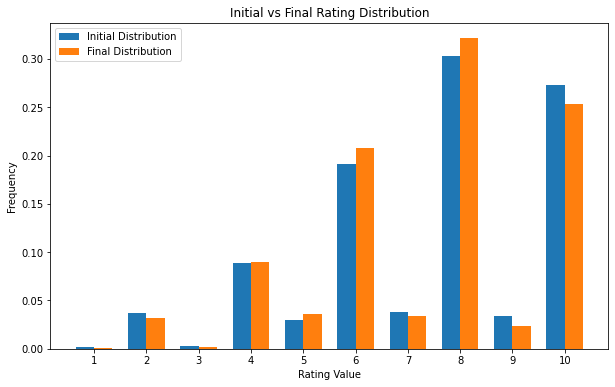


Filtering with min_ratings (min users,min games) = (22,18)
Iteration 0: 1520 users, 2329 games, 102757 ratings, KL-div: 0.0035
Iteration 1: 1297 users, 1788 games, 91836 ratings, KL-div: 0.0052
Iteration 2: 1205 users, 1698 games, 88583 ratings, KL-div: 0.0060
Iteration 3: 1192 users, 1665 games, 87762 ratings, KL-div: 0.0061
Iteration 4: 1183 users, 1659 games, 87472 ratings, KL-div: 0.0062
Iteration 5: 1181 users, 1655 games, 87362 ratings, KL-div: 0.0062
Iteration 6: 1180 users, 1655 games, 87341 ratings, KL-div: 0.0062
Converged after 7 iterations!
Number of users removed: 12443
Number of games removed: 14711


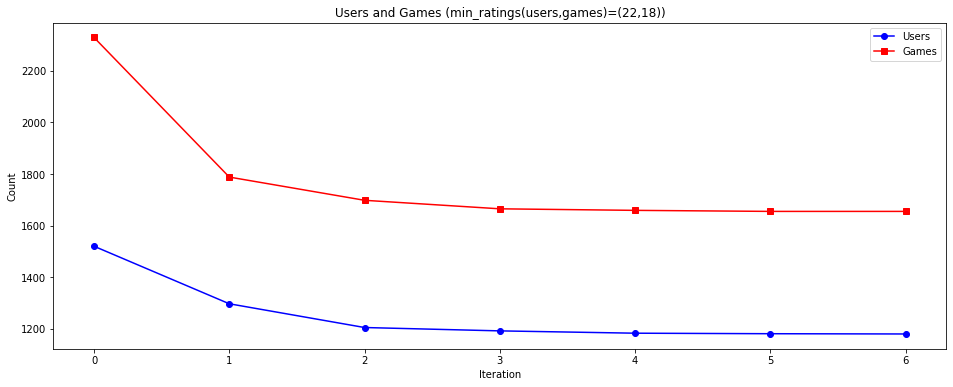

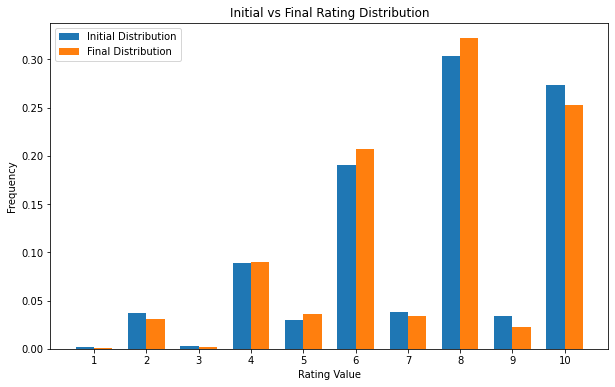


Filtering with min_ratings (min users,min games) = (25,18)
Iteration 0: 1372 users, 2329 games, 100007 ratings, KL-div: 0.0039
Iteration 1: 1158 users, 1730 games, 87991 ratings, KL-div: 0.0058
Iteration 2: 1065 users, 1651 games, 84639 ratings, KL-div: 0.0069
Iteration 3: 1052 users, 1604 games, 83547 ratings, KL-div: 0.0073
Iteration 4: 1038 users, 1597 games, 83101 ratings, KL-div: 0.0074
Iteration 5: 1038 users, 1592 games, 83016 ratings, KL-div: 0.0074
Iteration 6: 1037 users, 1592 games, 82992 ratings, KL-div: 0.0074
Converged after 7 iterations!
Number of users removed: 12586
Number of games removed: 14774


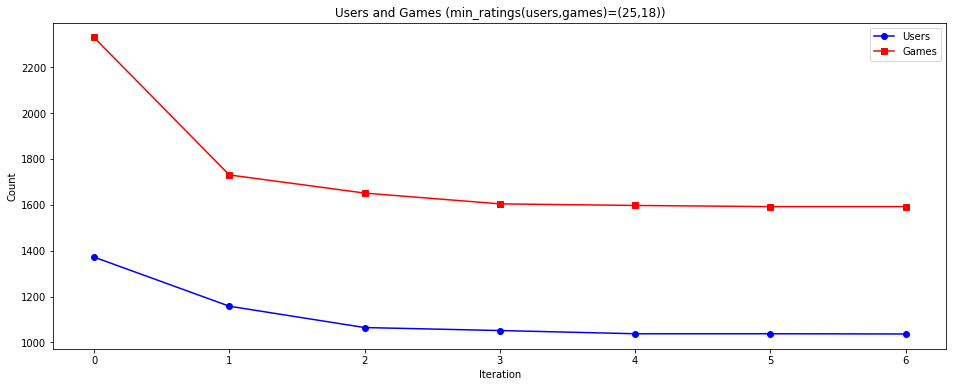

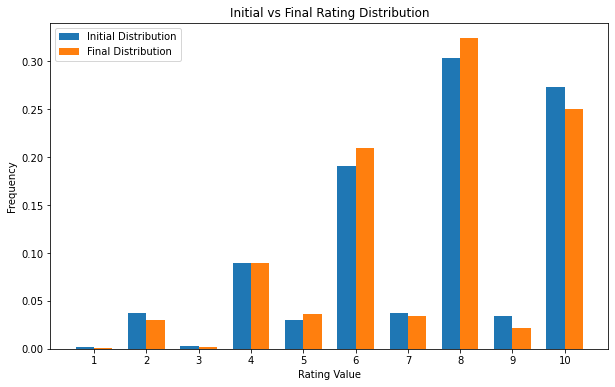


Filtering with min_ratings (min users,min games) = (10,20)
Iteration 0: 2849 users, 2126 games, 115058 ratings, KL-div: 0.0016
Iteration 1: 2400 users, 1846 games, 107372 ratings, KL-div: 0.0023
Iteration 2: 2314 users, 1780 games, 105412 ratings, KL-div: 0.0026
Iteration 3: 2290 users, 1766 games, 104935 ratings, KL-div: 0.0027
Iteration 4: 2288 users, 1761 games, 104822 ratings, KL-div: 0.0027
Converged after 5 iterations!
Number of users removed: 11335
Number of games removed: 14605


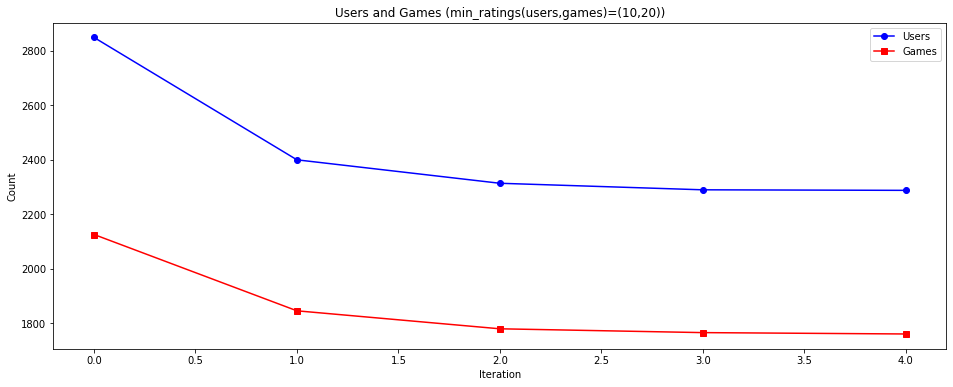

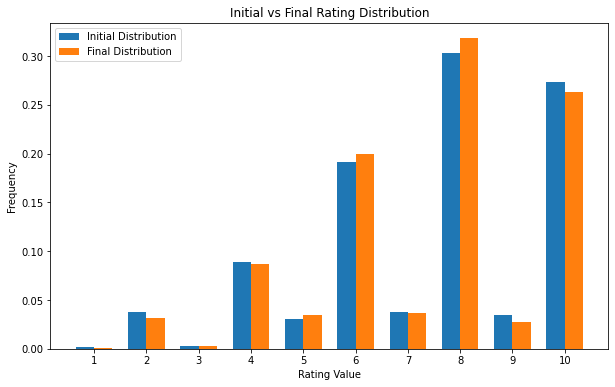


Filtering with min_ratings (min users,min games) = (11,20)
Iteration 0: 2621 users, 2126 games, 113290 ratings, KL-div: 0.0017
Iteration 1: 2230 users, 1821 games, 105308 ratings, KL-div: 0.0026
Iteration 2: 2145 users, 1752 games, 103221 ratings, KL-div: 0.0028
Iteration 3: 2121 users, 1740 games, 102754 ratings, KL-div: 0.0029
Iteration 4: 2117 users, 1733 games, 102581 ratings, KL-div: 0.0030
Iteration 5: 2115 users, 1731 games, 102523 ratings, KL-div: 0.0030
Iteration 6: 2114 users, 1731 games, 102513 ratings, KL-div: 0.0030
Converged after 7 iterations!
Number of users removed: 11509
Number of games removed: 14635


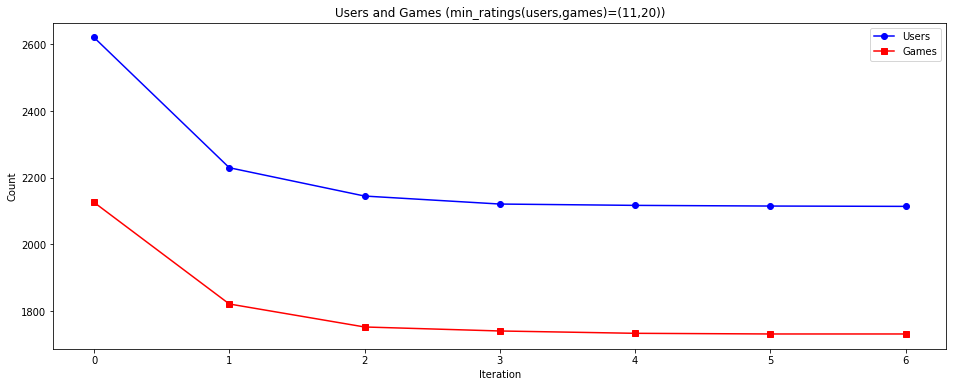

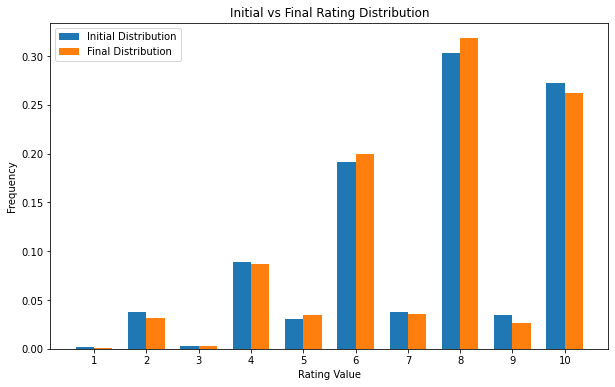


Filtering with min_ratings (min users,min games) = (12,20)
Iteration 0: 2470 users, 2126 games, 111932 ratings, KL-div: 0.0018
Iteration 1: 2100 users, 1798 games, 103549 ratings, KL-div: 0.0027
Iteration 2: 2008 users, 1728 games, 101292 ratings, KL-div: 0.0031
Iteration 3: 1982 users, 1715 games, 100764 ratings, KL-div: 0.0033
Iteration 4: 1977 users, 1711 games, 100633 ratings, KL-div: 0.0033
Iteration 5: 1977 users, 1709 games, 100595 ratings, KL-div: 0.0033
Iteration 6: 1974 users, 1709 games, 100562 ratings, KL-div: 0.0034
Iteration 7: 1974 users, 1707 games, 100524 ratings, KL-div: 0.0034
Iteration 8: 1973 users, 1707 games, 100513 ratings, KL-div: 0.0034
Converged after 9 iterations!
Number of users removed: 11650
Number of games removed: 14659


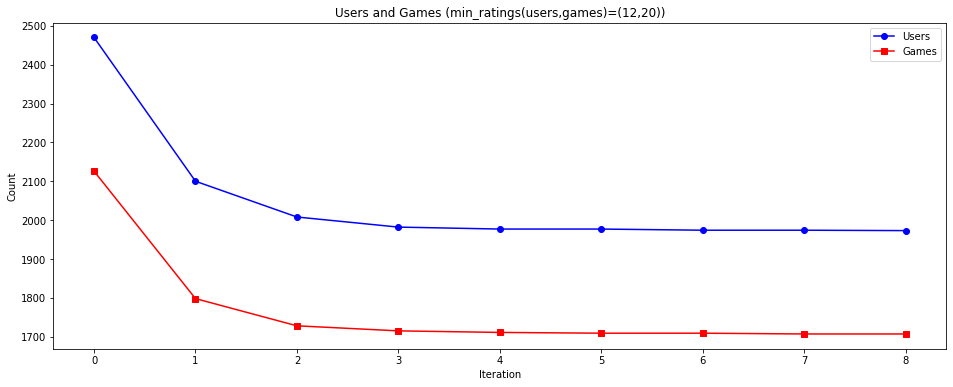

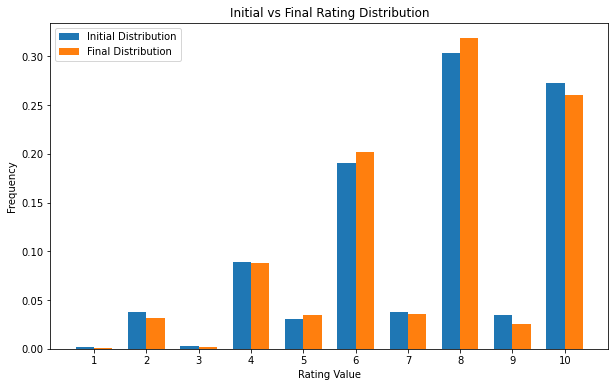


Filtering with min_ratings (min users,min games) = (13,20)
Iteration 0: 2337 users, 2126 games, 110677 ratings, KL-div: 0.0019
Iteration 1: 1979 users, 1777 games, 101796 ratings, KL-div: 0.0029
Iteration 2: 1875 users, 1719 games, 99556 ratings, KL-div: 0.0035
Iteration 3: 1853 users, 1692 games, 98792 ratings, KL-div: 0.0037
Iteration 4: 1838 users, 1689 games, 98558 ratings, KL-div: 0.0038
Iteration 5: 1838 users, 1686 games, 98501 ratings, KL-div: 0.0039
Iteration 6: 1837 users, 1686 games, 98489 ratings, KL-div: 0.0039
Iteration 7: 1837 users, 1685 games, 98470 ratings, KL-div: 0.0039
Converged after 8 iterations!
Number of users removed: 11786
Number of games removed: 14681


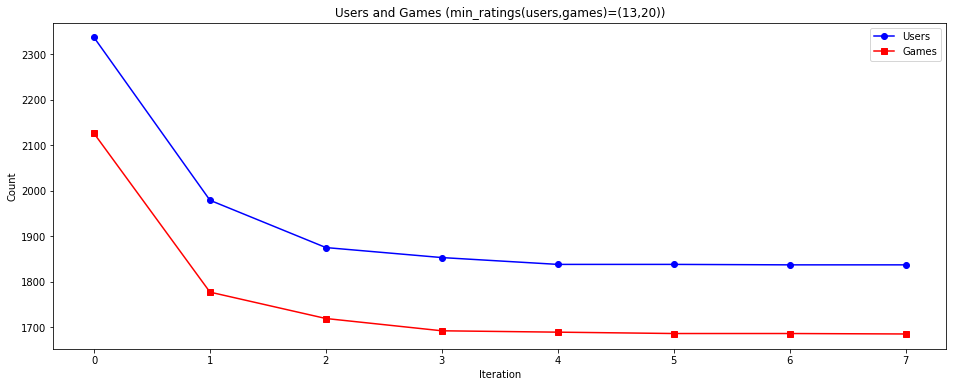

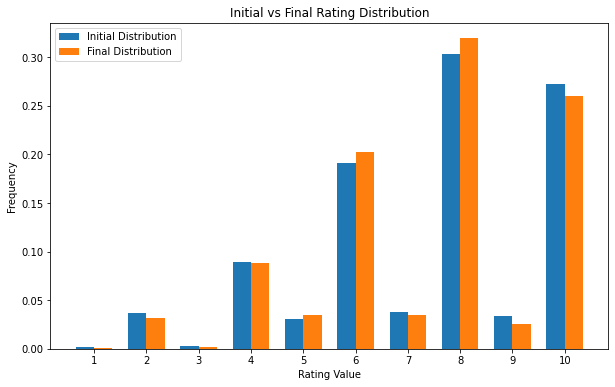


Filtering with min_ratings (min users,min games) = (14,20)
Iteration 0: 2204 users, 2126 games, 109278 ratings, KL-div: 0.0020
Iteration 1: 1851 users, 1753 games, 99809 ratings, KL-div: 0.0033
Iteration 2: 1748 users, 1689 games, 97380 ratings, KL-div: 0.0039
Iteration 3: 1722 users, 1669 games, 96673 ratings, KL-div: 0.0041
Iteration 4: 1713 users, 1658 games, 96352 ratings, KL-div: 0.0043
Iteration 5: 1711 users, 1654 games, 96250 ratings, KL-div: 0.0043
Iteration 6: 1707 users, 1654 games, 96198 ratings, KL-div: 0.0044
Converged after 7 iterations!
Number of users removed: 11916
Number of games removed: 14712


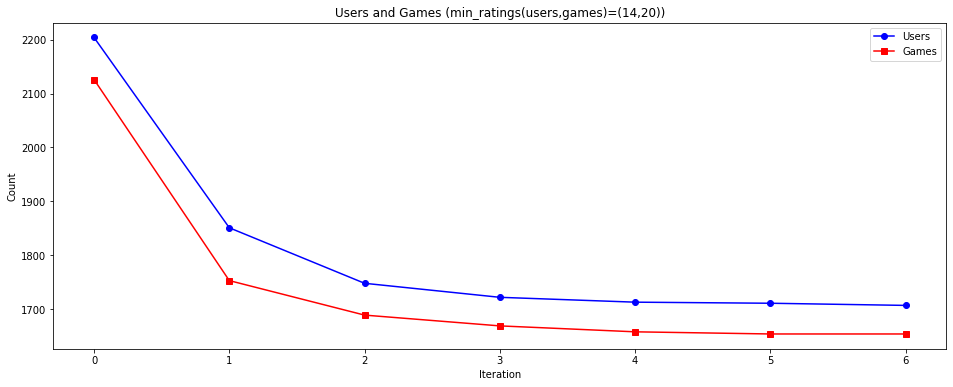

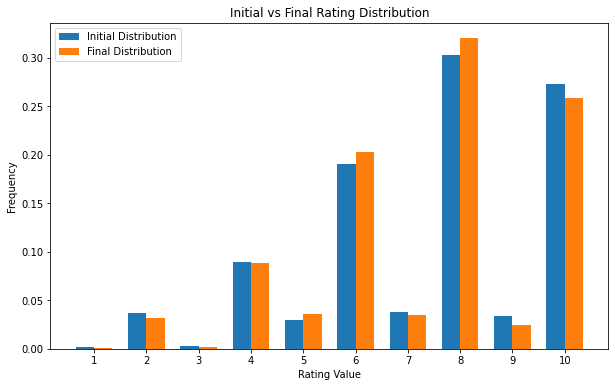


Filtering with min_ratings (min users,min games) = (15,20)
Iteration 0: 2071 users, 2126 games, 107809 ratings, KL-div: 0.0022
Iteration 1: 1743 users, 1733 games, 98043 ratings, KL-div: 0.0036
Iteration 2: 1646 users, 1671 games, 95646 ratings, KL-div: 0.0042
Iteration 3: 1626 users, 1634 games, 94684 ratings, KL-div: 0.0045
Iteration 4: 1614 users, 1623 games, 94311 ratings, KL-div: 0.0045
Iteration 5: 1611 users, 1622 games, 94250 ratings, KL-div: 0.0046
Iteration 6: 1611 users, 1620 games, 94212 ratings, KL-div: 0.0046
Iteration 7: 1610 users, 1620 games, 94198 ratings, KL-div: 0.0046
Converged after 8 iterations!
Number of users removed: 12013
Number of games removed: 14746


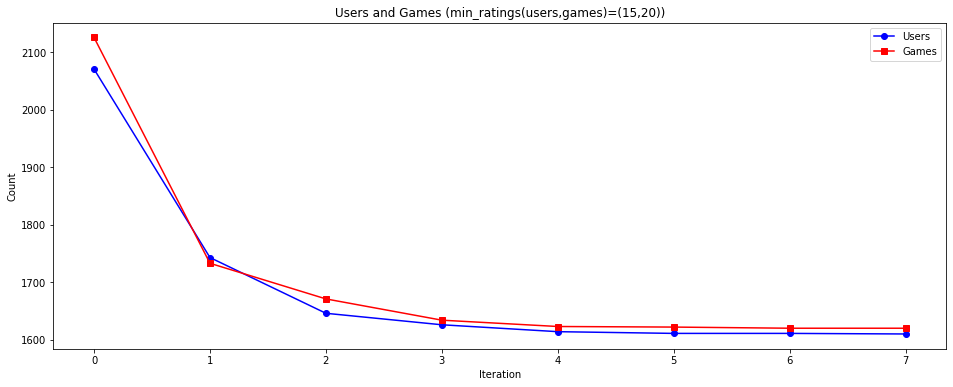

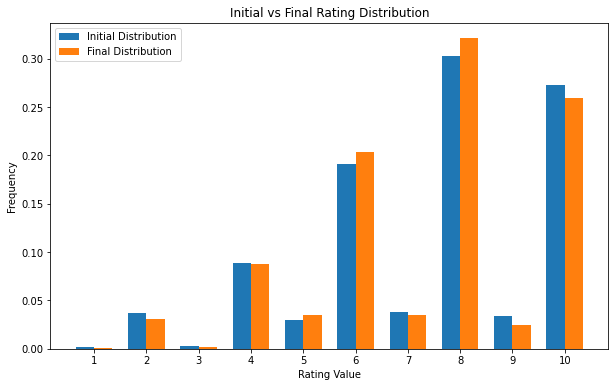


Filtering with min_ratings (min users,min games) = (16,20)
Iteration 0: 1975 users, 2126 games, 106606 ratings, KL-div: 0.0023
Iteration 1: 1644 users, 1715 games, 96339 ratings, KL-div: 0.0039
Iteration 2: 1538 users, 1640 games, 93484 ratings, KL-div: 0.0045
Iteration 3: 1526 users, 1605 games, 92655 ratings, KL-div: 0.0047
Iteration 4: 1521 users, 1604 games, 92561 ratings, KL-div: 0.0048
Iteration 5: 1521 users, 1603 games, 92542 ratings, KL-div: 0.0048
Converged after 6 iterations!
Number of users removed: 12102
Number of games removed: 14763


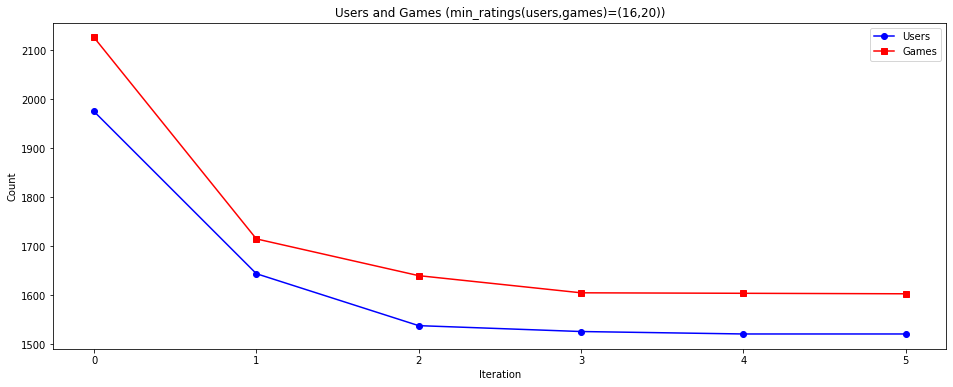

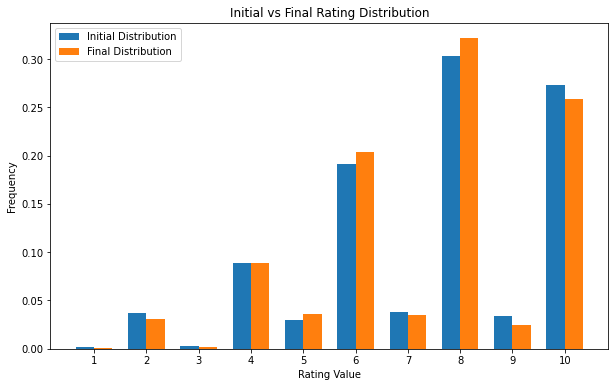


Filtering with min_ratings (min users,min games) = (18,20)
Iteration 0: 1794 users, 2126 games, 104237 ratings, KL-div: 0.0027
Iteration 1: 1496 users, 1684 games, 93553 ratings, KL-div: 0.0044
Iteration 2: 1399 users, 1610 games, 90676 ratings, KL-div: 0.0050
Iteration 3: 1376 users, 1580 games, 89726 ratings, KL-div: 0.0053
Iteration 4: 1366 users, 1573 games, 89425 ratings, KL-div: 0.0054
Iteration 5: 1365 users, 1570 games, 89351 ratings, KL-div: 0.0054
Iteration 6: 1365 users, 1569 games, 89332 ratings, KL-div: 0.0054
Iteration 7: 1364 users, 1569 games, 89315 ratings, KL-div: 0.0054
Iteration 8: 1364 users, 1567 games, 89277 ratings, KL-div: 0.0054
Converged after 9 iterations!
Number of users removed: 12259
Number of games removed: 14799


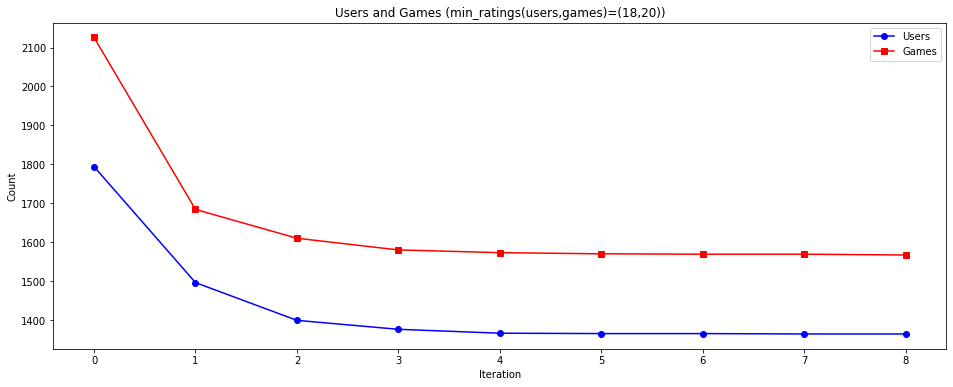

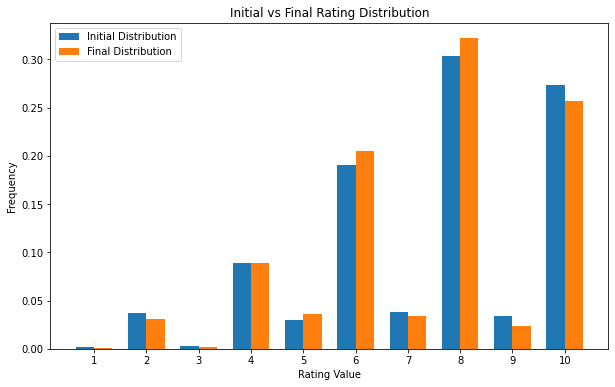


Filtering with min_ratings (min users,min games) = (20,20)
Iteration 0: 1631 users, 2126 games, 101925 ratings, KL-div: 0.0031
Iteration 1: 1370 users, 1644 games, 90720 ratings, KL-div: 0.0050
Iteration 2: 1278 users, 1573 games, 87792 ratings, KL-div: 0.0058
Iteration 3: 1266 users, 1542 games, 86995 ratings, KL-div: 0.0061
Iteration 4: 1259 users, 1537 games, 86767 ratings, KL-div: 0.0061
Iteration 5: 1257 users, 1534 games, 86672 ratings, KL-div: 0.0062
Iteration 6: 1254 users, 1534 games, 86615 ratings, KL-div: 0.0062
Converged after 7 iterations!
Number of users removed: 12369
Number of games removed: 14832


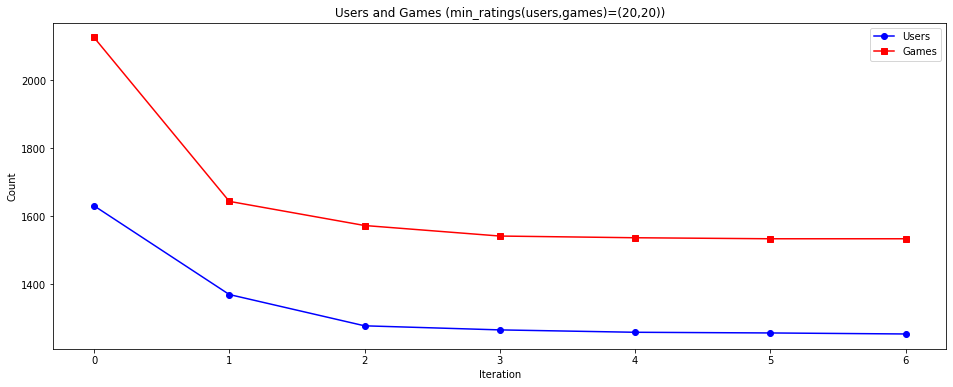

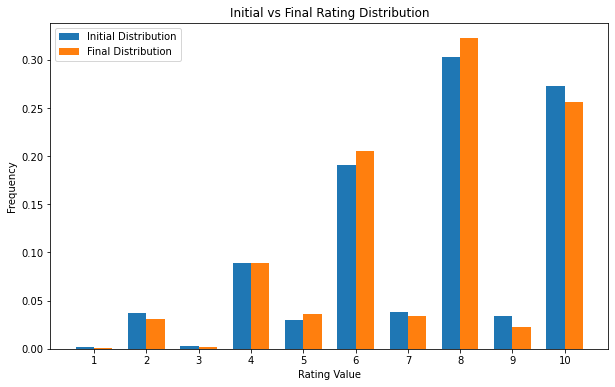


Filtering with min_ratings (min users,min games) = (22,20)
Iteration 0: 1520 users, 2126 games, 100047 ratings, KL-div: 0.0035
Iteration 1: 1266 users, 1619 games, 88338 ratings, KL-div: 0.0054
Iteration 2: 1172 users, 1545 games, 85155 ratings, KL-div: 0.0064
Iteration 3: 1152 users, 1513 games, 84138 ratings, KL-div: 0.0067
Iteration 4: 1142 users, 1505 games, 83779 ratings, KL-div: 0.0068
Iteration 5: 1139 users, 1498 games, 83583 ratings, KL-div: 0.0070
Iteration 6: 1137 users, 1497 games, 83522 ratings, KL-div: 0.0070
Iteration 7: 1135 users, 1497 games, 83480 ratings, KL-div: 0.0070
Converged after 8 iterations!
Number of users removed: 12488
Number of games removed: 14869


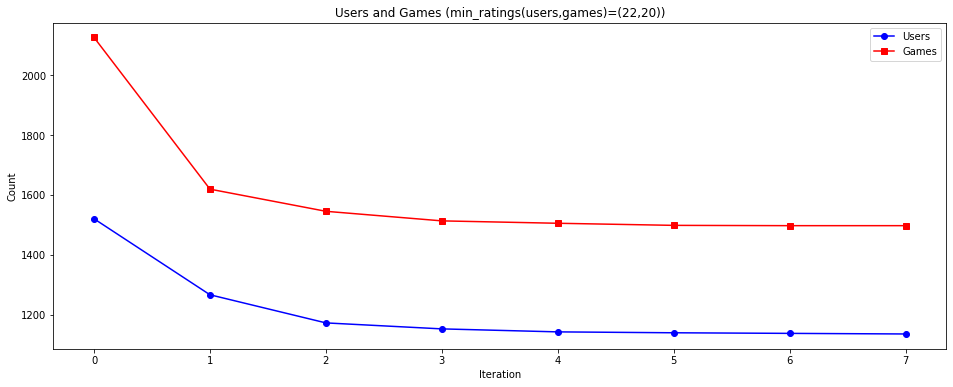

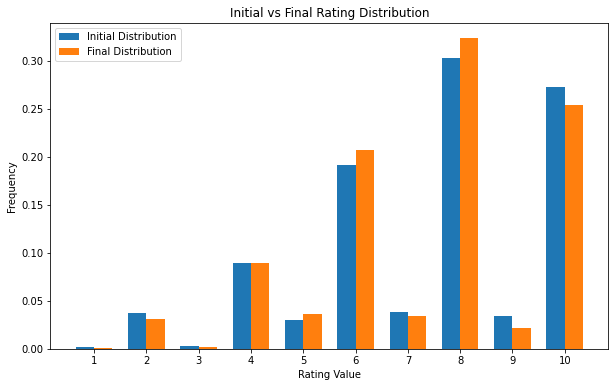


Filtering with min_ratings (min users,min games) = (25,20)
Iteration 0: 1372 users, 2126 games, 97353 ratings, KL-div: 0.0038
Iteration 1: 1136 users, 1574 games, 84806 ratings, KL-div: 0.0060
Iteration 2: 1036 users, 1506 games, 81380 ratings, KL-div: 0.0072
Iteration 3: 1023 users, 1466 games, 80339 ratings, KL-div: 0.0077
Iteration 4: 1011 users, 1458 games, 79905 ratings, KL-div: 0.0080
Iteration 5: 1008 users, 1453 games, 79739 ratings, KL-div: 0.0080
Iteration 6: 1008 users, 1450 games, 79682 ratings, KL-div: 0.0080
Iteration 7: 1007 users, 1450 games, 79658 ratings, KL-div: 0.0080
Converged after 8 iterations!
Number of users removed: 12616
Number of games removed: 14916


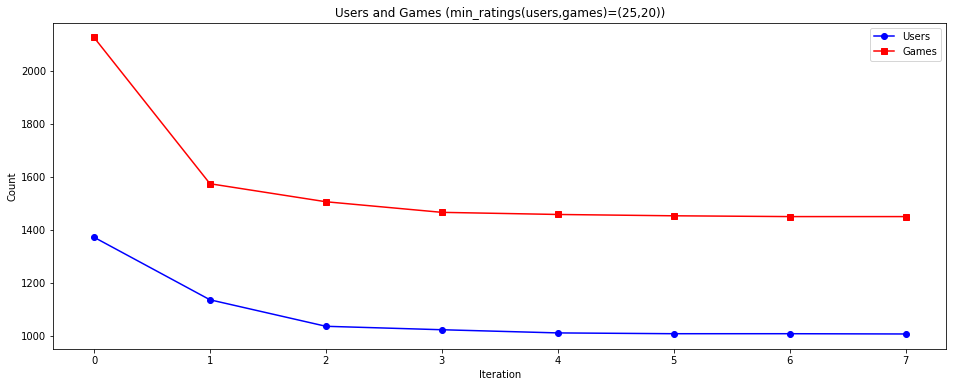

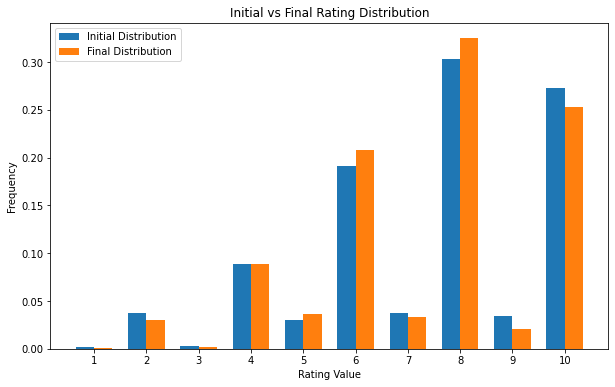


Filtering with min_ratings (min users,min games) = (10,22)
Iteration 0: 2849 users, 1994 games, 112842 ratings, KL-div: 0.0017
Iteration 1: 2357 users, 1709 games, 104329 ratings, KL-div: 0.0025
Iteration 2: 2273 users, 1640 games, 102223 ratings, KL-div: 0.0029
Iteration 3: 2250 users, 1629 games, 101788 ratings, KL-div: 0.0029
Iteration 4: 2241 users, 1622 games, 101560 ratings, KL-div: 0.0030
Iteration 5: 2238 users, 1620 games, 101491 ratings, KL-div: 0.0030
Iteration 6: 2237 users, 1619 games, 101461 ratings, KL-div: 0.0030
Iteration 7: 2236 users, 1619 games, 101452 ratings, KL-div: 0.0030
Converged after 8 iterations!
Number of users removed: 11387
Number of games removed: 14747


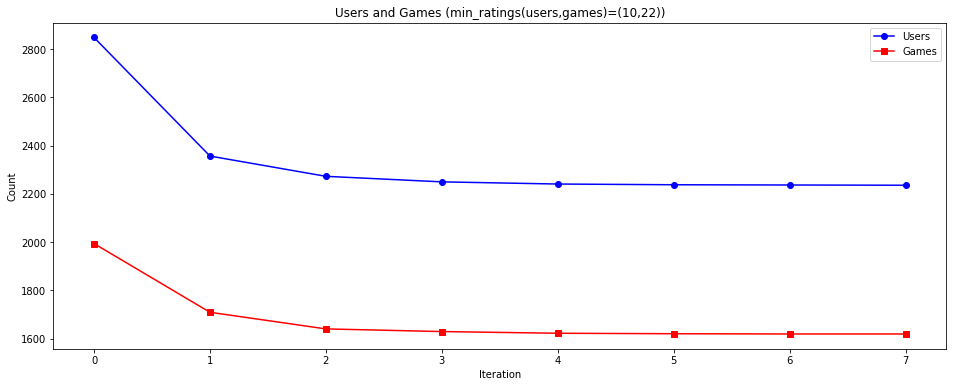

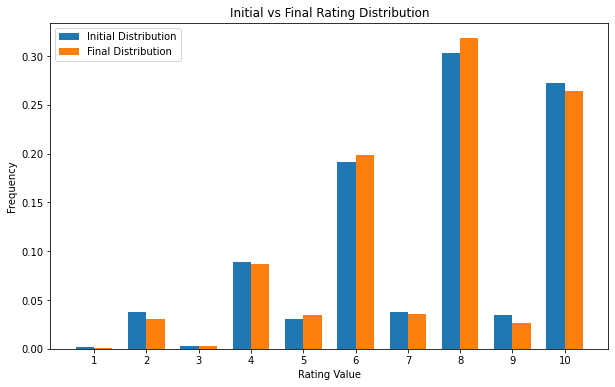


Filtering with min_ratings (min users,min games) = (11,22)
Iteration 0: 2621 users, 1994 games, 111114 ratings, KL-div: 0.0018
Iteration 1: 2195 users, 1679 games, 102213 ratings, KL-div: 0.0027
Iteration 2: 2103 users, 1619 games, 100118 ratings, KL-div: 0.0031
Iteration 3: 2078 users, 1606 games, 99604 ratings, KL-div: 0.0034
Iteration 4: 2072 users, 1601 games, 99439 ratings, KL-div: 0.0034
Iteration 5: 2070 users, 1599 games, 99377 ratings, KL-div: 0.0034
Converged after 6 iterations!
Number of users removed: 11553
Number of games removed: 14767


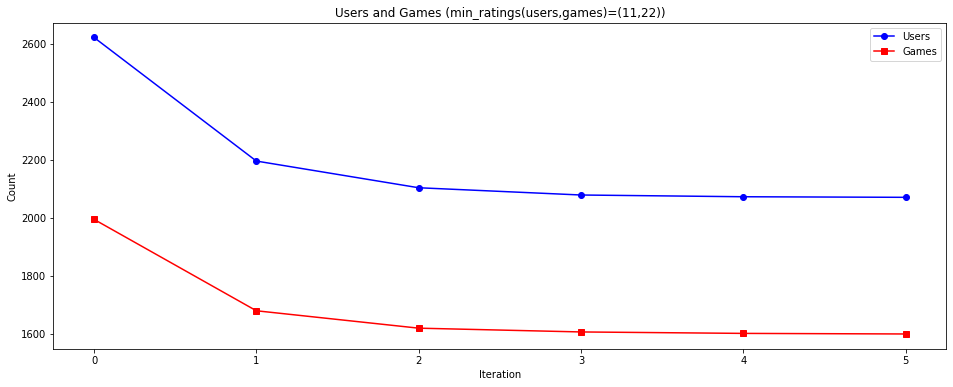

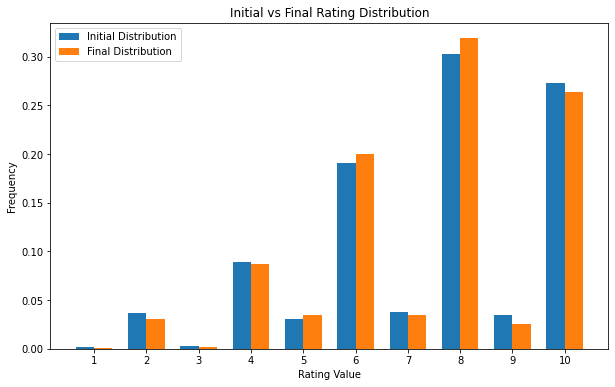


Filtering with min_ratings (min users,min games) = (12,22)
Iteration 0: 2470 users, 1994 games, 109775 ratings, KL-div: 0.0019
Iteration 1: 2070 users, 1662 games, 100597 ratings, KL-div: 0.0030
Iteration 2: 1964 users, 1601 games, 98248 ratings, KL-div: 0.0035
Iteration 3: 1938 users, 1570 games, 97321 ratings, KL-div: 0.0038
Iteration 4: 1923 users, 1567 games, 97096 ratings, KL-div: 0.0039
Iteration 5: 1922 users, 1564 games, 97022 ratings, KL-div: 0.0039
Iteration 6: 1921 users, 1564 games, 97011 ratings, KL-div: 0.0039
Converged after 7 iterations!
Number of users removed: 11702
Number of games removed: 14802


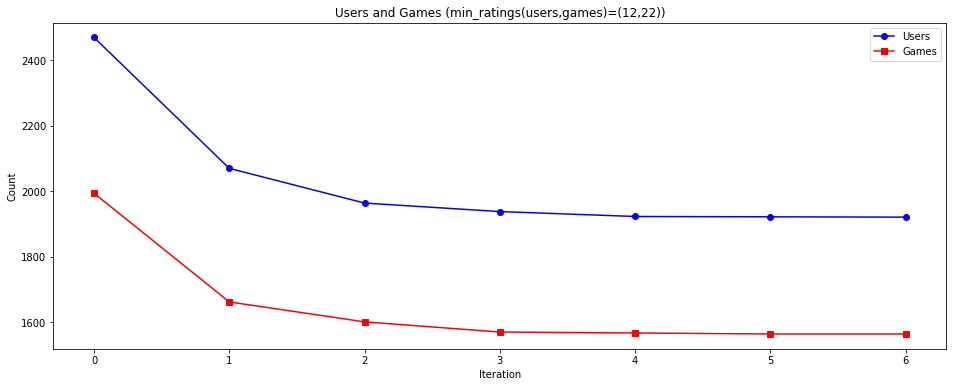

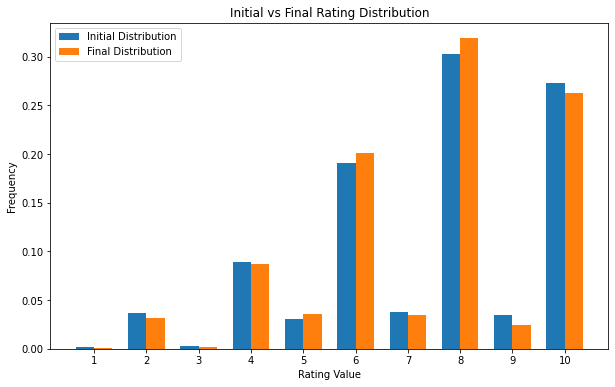


Filtering with min_ratings (min users,min games) = (13,22)
Iteration 0: 2337 users, 1994 games, 108547 ratings, KL-div: 0.0020
Iteration 1: 1948 users, 1647 games, 98918 ratings, KL-div: 0.0033
Iteration 2: 1826 users, 1576 games, 96109 ratings, KL-div: 0.0039
Iteration 3: 1792 users, 1545 games, 95069 ratings, KL-div: 0.0042
Iteration 4: 1776 users, 1540 games, 94775 ratings, KL-div: 0.0043
Iteration 5: 1773 users, 1537 games, 94676 ratings, KL-div: 0.0043
Iteration 6: 1772 users, 1536 games, 94643 ratings, KL-div: 0.0043
Iteration 7: 1772 users, 1535 games, 94622 ratings, KL-div: 0.0043
Iteration 8: 1771 users, 1535 games, 94610 ratings, KL-div: 0.0043
Converged after 9 iterations!
Number of users removed: 11852
Number of games removed: 14831


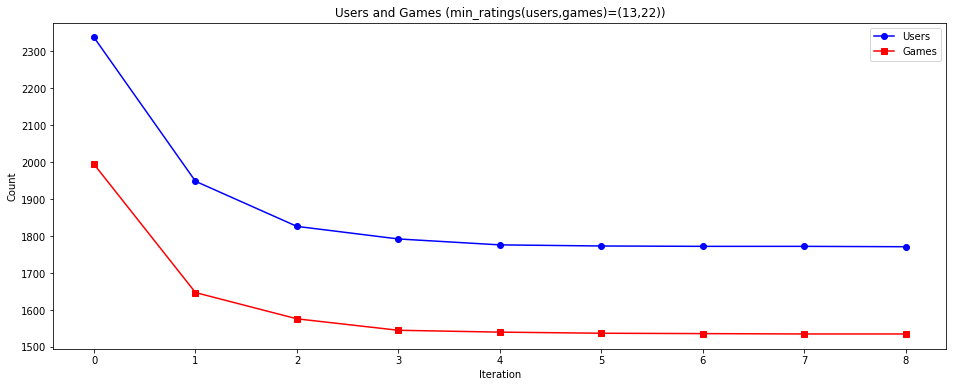

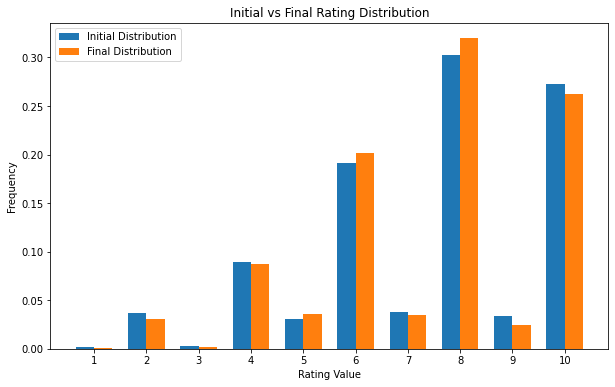


Filtering with min_ratings (min users,min games) = (14,22)
Iteration 0: 2204 users, 1994 games, 107185 ratings, KL-div: 0.0021
Iteration 1: 1828 users, 1625 games, 97033 ratings, KL-div: 0.0036
Iteration 2: 1692 users, 1546 games, 93799 ratings, KL-div: 0.0044
Iteration 3: 1666 users, 1522 games, 92977 ratings, KL-div: 0.0046
Iteration 4: 1654 users, 1518 games, 92738 ratings, KL-div: 0.0047
Iteration 5: 1654 users, 1515 games, 92675 ratings, KL-div: 0.0047
Iteration 6: 1653 users, 1515 games, 92662 ratings, KL-div: 0.0047
Converged after 7 iterations!
Number of users removed: 11970
Number of games removed: 14851


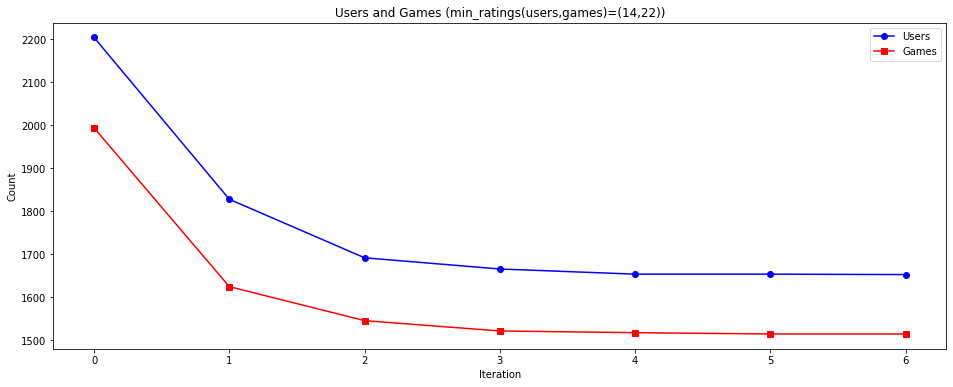

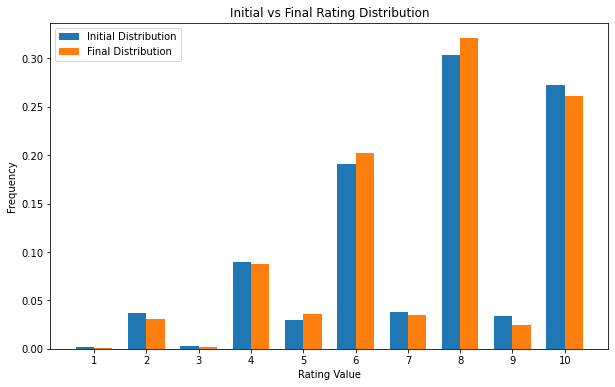


Filtering with min_ratings (min users,min games) = (15,22)
Iteration 0: 2071 users, 1994 games, 105749 ratings, KL-div: 0.0023
Iteration 1: 1718 users, 1601 games, 95157 ratings, KL-div: 0.0040
Iteration 2: 1605 users, 1526 games, 92208 ratings, KL-div: 0.0046
Iteration 3: 1586 users, 1505 games, 91514 ratings, KL-div: 0.0047
Iteration 4: 1583 users, 1502 games, 91409 ratings, KL-div: 0.0048
Iteration 5: 1581 users, 1502 games, 91381 ratings, KL-div: 0.0048
Converged after 6 iterations!
Number of users removed: 12042
Number of games removed: 14864


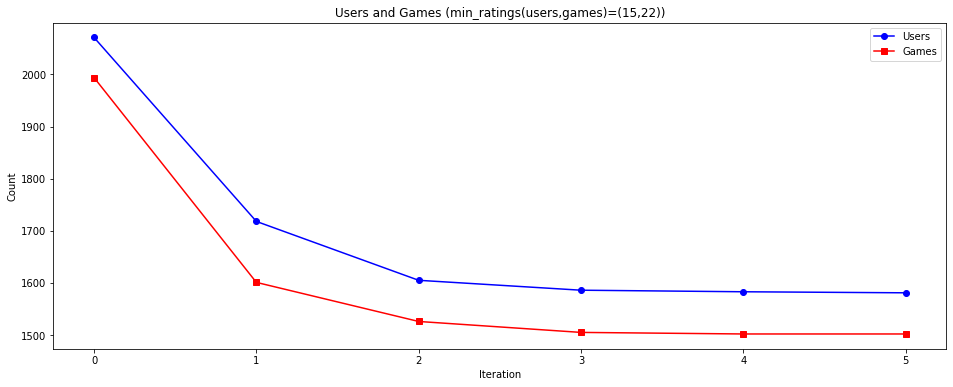

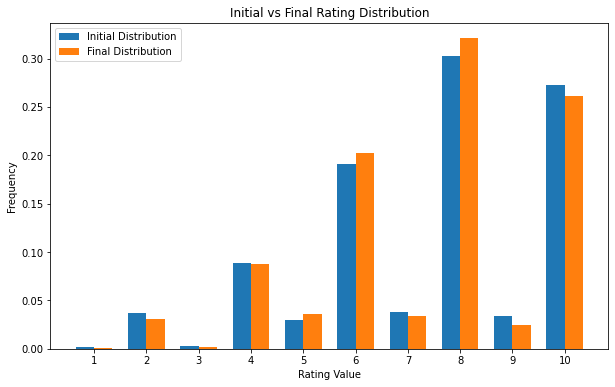


Filtering with min_ratings (min users,min games) = (16,22)
Iteration 0: 1975 users, 1994 games, 104573 ratings, KL-div: 0.0024
Iteration 1: 1617 users, 1578 games, 93306 ratings, KL-div: 0.0042
Iteration 2: 1519 users, 1514 games, 90697 ratings, KL-div: 0.0048
Iteration 3: 1498 users, 1495 games, 89991 ratings, KL-div: 0.0050
Iteration 4: 1490 users, 1490 games, 89769 ratings, KL-div: 0.0051
Iteration 5: 1489 users, 1490 games, 89754 ratings, KL-div: 0.0051
Converged after 6 iterations!
Number of users removed: 12134
Number of games removed: 14876


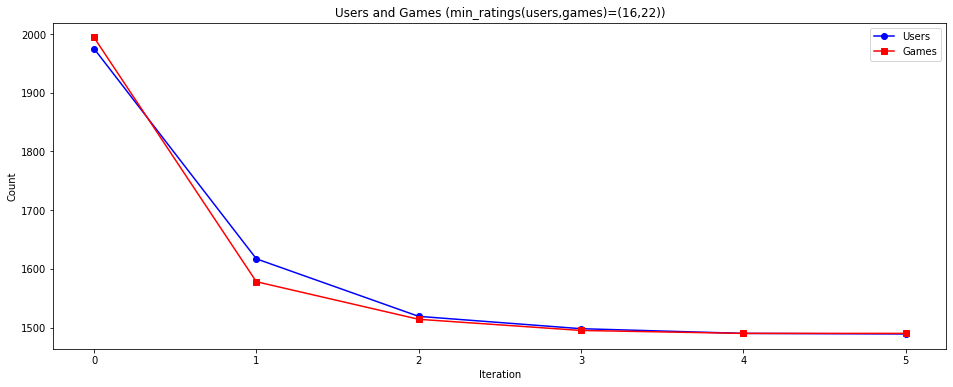

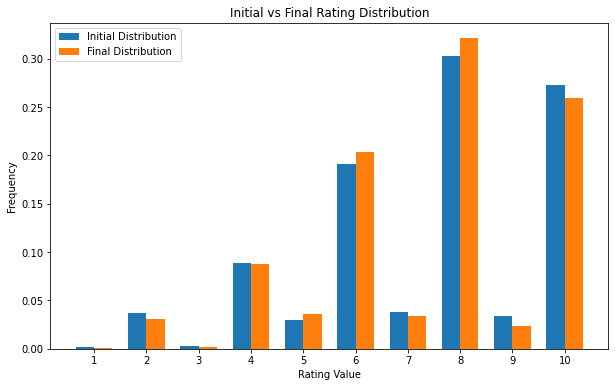


Filtering with min_ratings (min users,min games) = (18,22)
Iteration 0: 1794 users, 1994 games, 102248 ratings, KL-div: 0.0028
Iteration 1: 1477 users, 1548 games, 90644 ratings, KL-div: 0.0049
Iteration 2: 1361 users, 1489 games, 87636 ratings, KL-div: 0.0054
Iteration 3: 1344 users, 1459 games, 86731 ratings, KL-div: 0.0057
Iteration 4: 1339 users, 1456 games, 86583 ratings, KL-div: 0.0057
Iteration 5: 1338 users, 1456 games, 86566 ratings, KL-div: 0.0057
Converged after 6 iterations!
Number of users removed: 12285
Number of games removed: 14910


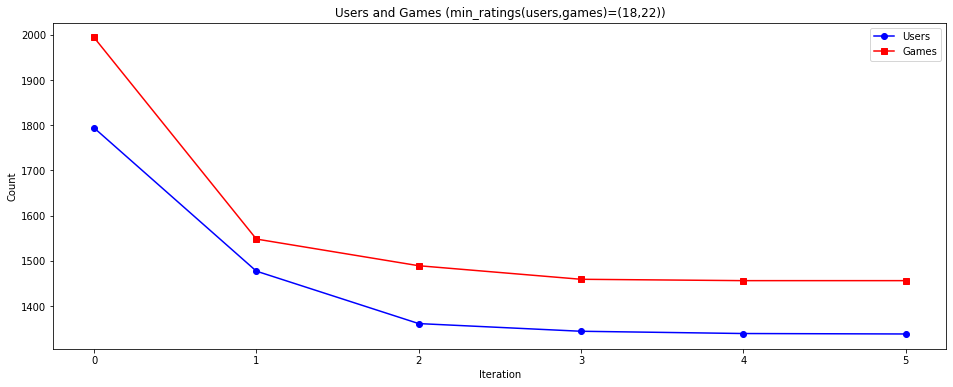

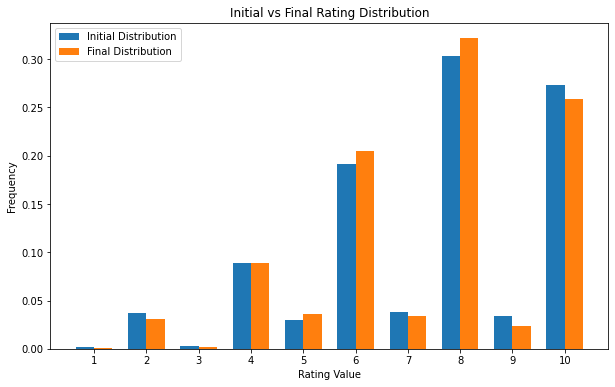


Filtering with min_ratings (min users,min games) = (20,22)
Iteration 0: 1631 users, 1994 games, 99974 ratings, KL-div: 0.0032
Iteration 1: 1351 users, 1518 games, 87972 ratings, KL-div: 0.0052
Iteration 2: 1248 users, 1457 games, 84924 ratings, KL-div: 0.0061
Iteration 3: 1229 users, 1428 games, 83974 ratings, KL-div: 0.0064
Iteration 4: 1218 users, 1421 games, 83619 ratings, KL-div: 0.0066
Iteration 5: 1214 users, 1415 games, 83417 ratings, KL-div: 0.0067
Iteration 6: 1213 users, 1415 games, 83398 ratings, KL-div: 0.0067
Iteration 7: 1213 users, 1414 games, 83377 ratings, KL-div: 0.0067
Converged after 8 iterations!
Number of users removed: 12410
Number of games removed: 14952


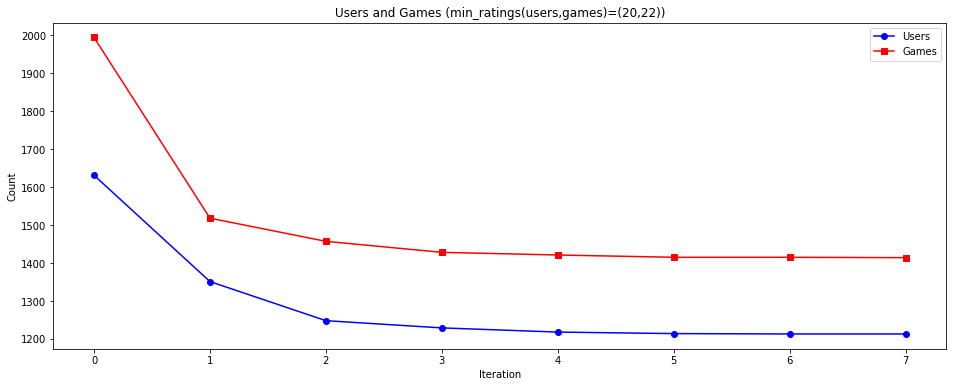

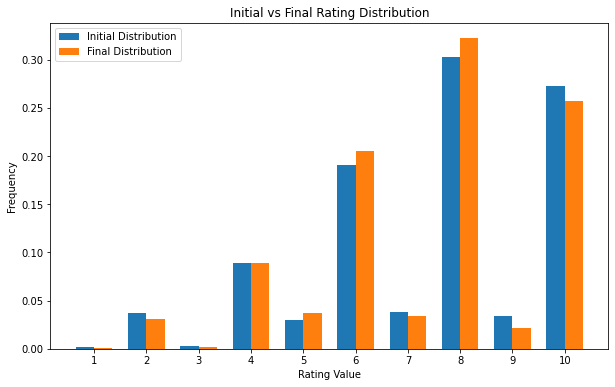


Filtering with min_ratings (min users,min games) = (22,22)
Iteration 0: 1520 users, 1994 games, 98123 ratings, KL-div: 0.0035
Iteration 1: 1250 users, 1496 games, 85659 ratings, KL-div: 0.0055
Iteration 2: 1138 users, 1431 games, 82196 ratings, KL-div: 0.0066
Iteration 3: 1118 users, 1395 games, 81046 ratings, KL-div: 0.0070
Iteration 4: 1110 users, 1383 games, 80631 ratings, KL-div: 0.0071
Iteration 5: 1105 users, 1381 games, 80484 ratings, KL-div: 0.0072
Converged after 6 iterations!
Number of users removed: 12518
Number of games removed: 14985


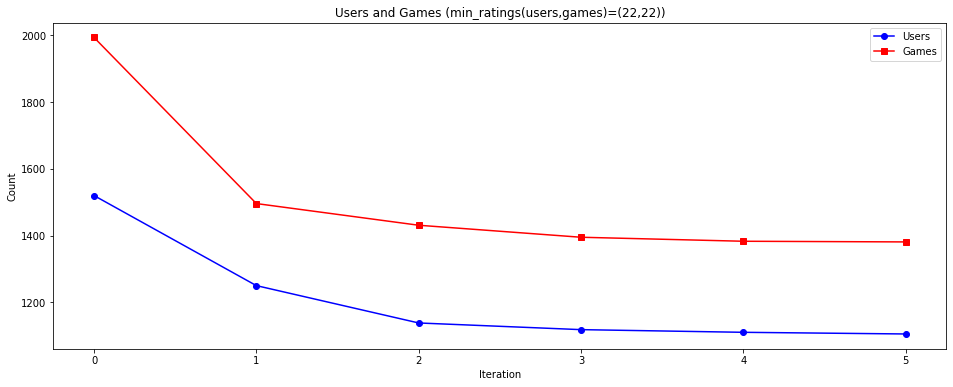

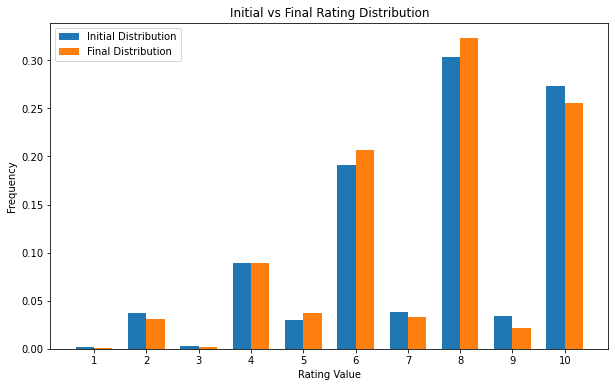


Filtering with min_ratings (min users,min games) = (25,22)
Iteration 0: 1372 users, 1994 games, 95477 ratings, KL-div: 0.0038
Iteration 1: 1116 users, 1464 games, 82281 ratings, KL-div: 0.0063
Iteration 2: 1013 users, 1391 games, 78583 ratings, KL-div: 0.0076
Iteration 3: 987 users, 1349 games, 77121 ratings, KL-div: 0.0081
Iteration 4: 972 users, 1343 games, 76641 ratings, KL-div: 0.0085
Iteration 5: 971 users, 1335 games, 76451 ratings, KL-div: 0.0087
Iteration 6: 971 users, 1333 games, 76409 ratings, KL-div: 0.0086
Iteration 7: 970 users, 1333 games, 76385 ratings, KL-div: 0.0086
Converged after 8 iterations!
Number of users removed: 12653
Number of games removed: 15033


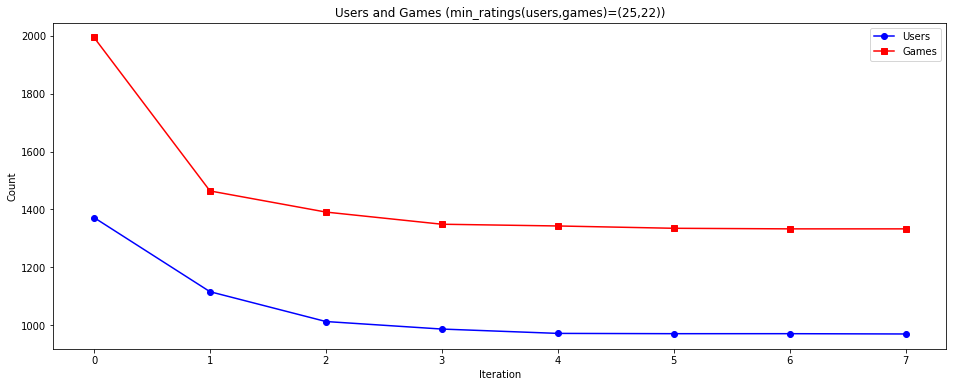

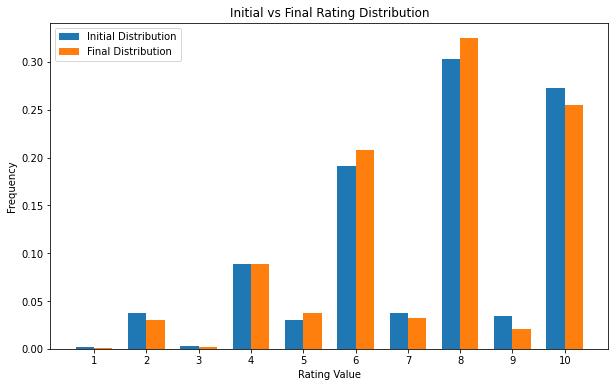


Filtering with min_ratings (min users,min games) = (10,25)
Iteration 0: 2849 users, 1809 games, 109328 ratings, KL-div: 0.0017
Iteration 1: 2309 users, 1518 games, 99774 ratings, KL-div: 0.0030
Iteration 2: 2200 users, 1465 games, 97610 ratings, KL-div: 0.0034
Iteration 3: 2169 users, 1455 games, 97097 ratings, KL-div: 0.0035
Iteration 4: 2161 users, 1452 games, 96953 ratings, KL-div: 0.0036
Iteration 5: 2158 users, 1450 games, 96878 ratings, KL-div: 0.0036
Iteration 6: 2157 users, 1450 games, 96869 ratings, KL-div: 0.0036
Converged after 7 iterations!
Number of users removed: 11466
Number of games removed: 14916


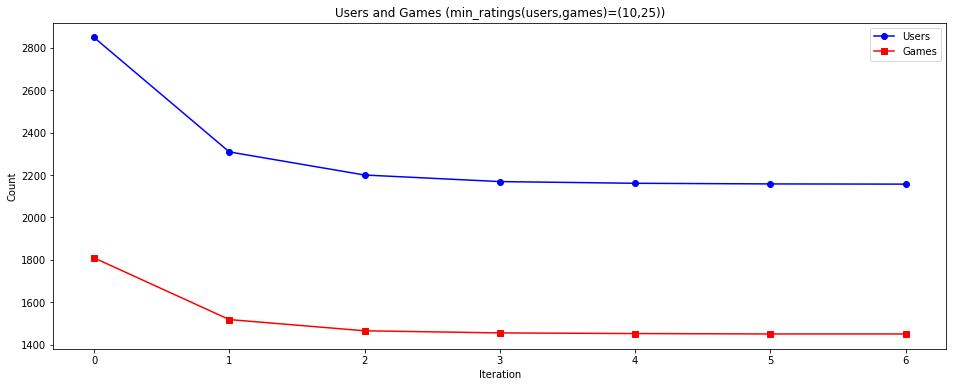

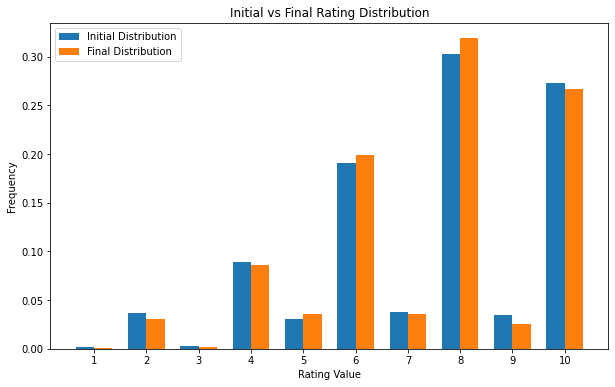


Filtering with min_ratings (min users,min games) = (11,25)
Iteration 0: 2621 users, 1809 games, 107659 ratings, KL-div: 0.0019
Iteration 1: 2146 users, 1503 games, 97905 ratings, KL-div: 0.0032
Iteration 2: 2032 users, 1448 games, 95575 ratings, KL-div: 0.0038
Iteration 3: 2004 users, 1435 games, 94993 ratings, KL-div: 0.0040
Iteration 4: 2001 users, 1434 games, 94939 ratings, KL-div: 0.0040
Iteration 5: 2000 users, 1433 games, 94905 ratings, KL-div: 0.0040
Iteration 6: 1998 users, 1431 games, 94837 ratings, KL-div: 0.0040
Iteration 7: 1997 users, 1431 games, 94827 ratings, KL-div: 0.0040
Converged after 8 iterations!
Number of users removed: 11626
Number of games removed: 14935


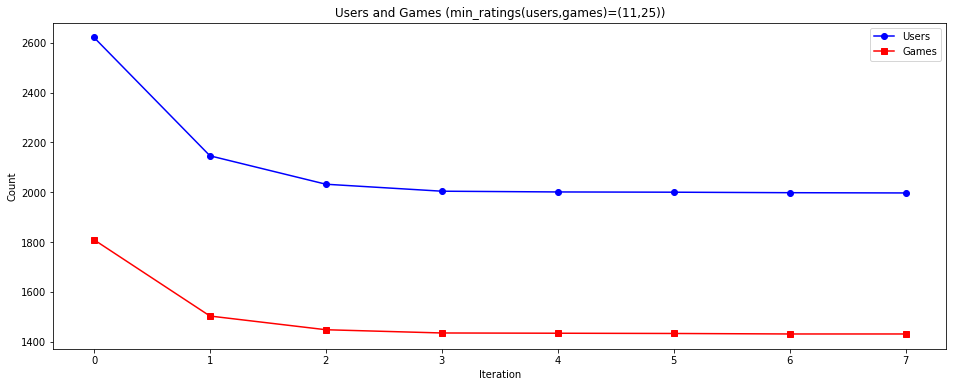

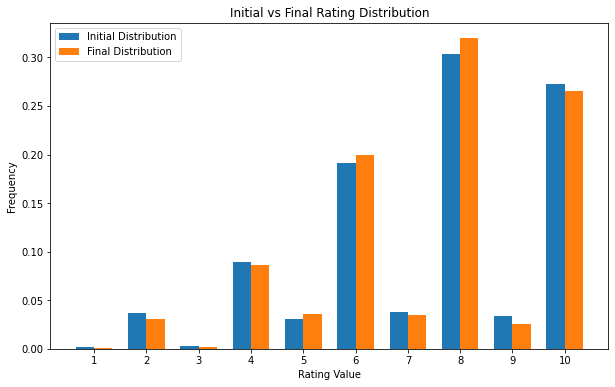


Filtering with min_ratings (min users,min games) = (12,25)
Iteration 0: 2470 users, 1809 games, 106357 ratings, KL-div: 0.0019
Iteration 1: 2023 users, 1492 games, 96410 ratings, KL-div: 0.0034
Iteration 2: 1885 users, 1431 games, 93584 ratings, KL-div: 0.0040
Iteration 3: 1849 users, 1416 games, 92844 ratings, KL-div: 0.0042
Iteration 4: 1841 users, 1410 games, 92613 ratings, KL-div: 0.0042
Iteration 5: 1836 users, 1408 games, 92510 ratings, KL-div: 0.0042
Iteration 6: 1835 users, 1408 games, 92499 ratings, KL-div: 0.0043
Converged after 7 iterations!
Number of users removed: 11788
Number of games removed: 14958


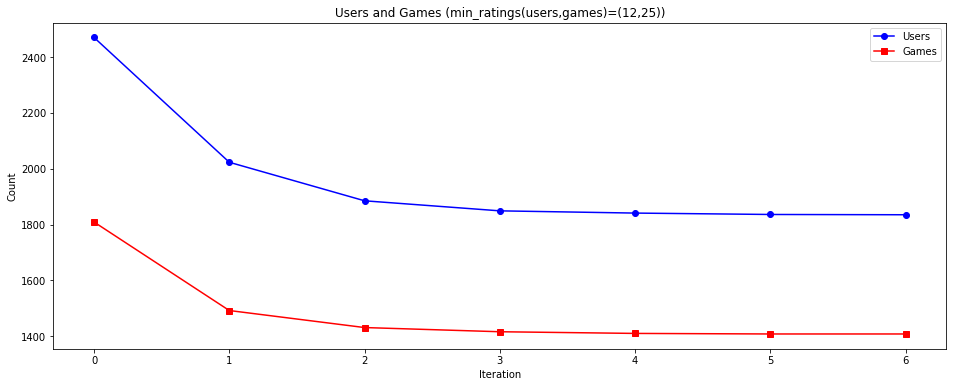

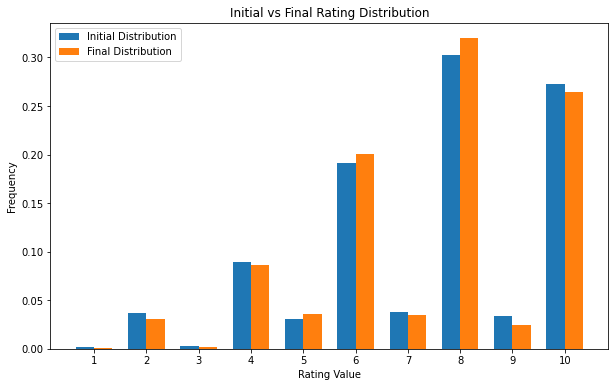


Filtering with min_ratings (min users,min games) = (13,25)
Iteration 0: 2337 users, 1809 games, 105179 ratings, KL-div: 0.0020
Iteration 1: 1891 users, 1474 games, 94545 ratings, KL-div: 0.0037
Iteration 2: 1753 users, 1416 games, 91692 ratings, KL-div: 0.0043
Iteration 3: 1731 users, 1396 games, 90969 ratings, KL-div: 0.0045
Iteration 4: 1726 users, 1390 games, 90766 ratings, KL-div: 0.0045
Iteration 5: 1724 users, 1390 games, 90742 ratings, KL-div: 0.0045
Converged after 6 iterations!
Number of users removed: 11899
Number of games removed: 14976


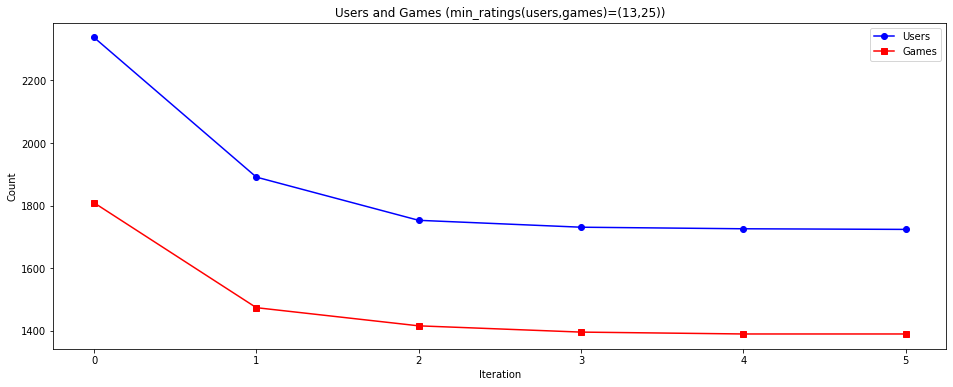

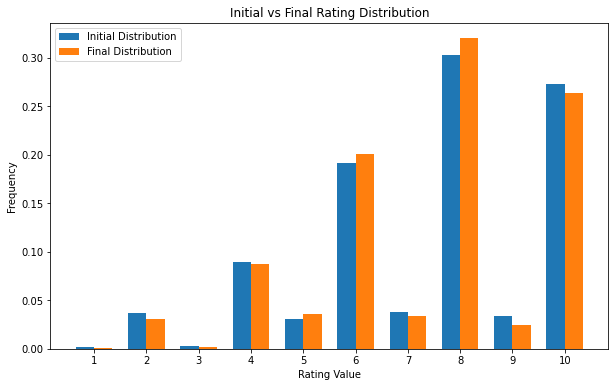


Filtering with min_ratings (min users,min games) = (14,25)
Iteration 0: 2204 users, 1809 games, 103862 ratings, KL-div: 0.0022
Iteration 1: 1778 users, 1451 games, 92708 ratings, KL-div: 0.0040
Iteration 2: 1641 users, 1395 games, 89775 ratings, KL-div: 0.0048
Iteration 3: 1626 users, 1373 games, 89064 ratings, KL-div: 0.0049
Iteration 4: 1616 users, 1372 games, 88910 ratings, KL-div: 0.0049
Iteration 5: 1616 users, 1370 games, 88862 ratings, KL-div: 0.0050
Iteration 6: 1613 users, 1370 games, 88823 ratings, KL-div: 0.0050
Converged after 7 iterations!
Number of users removed: 12010
Number of games removed: 14996


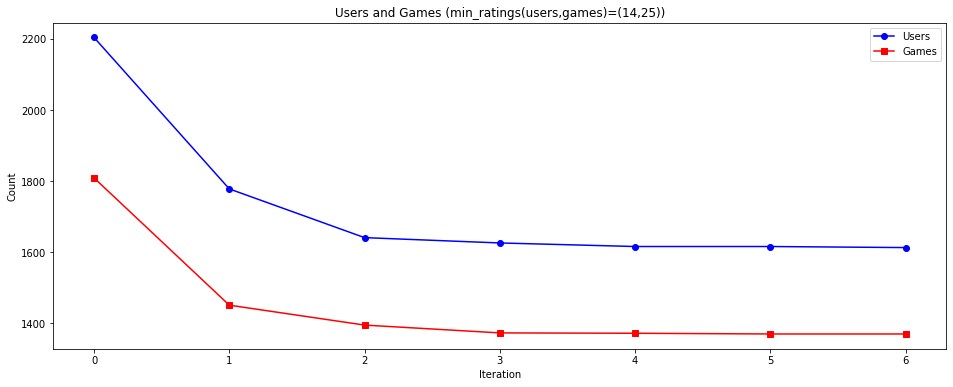

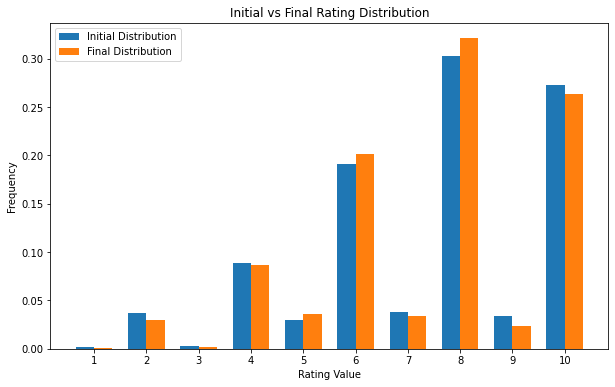


Filtering with min_ratings (min users,min games) = (15,25)
Iteration 0: 2071 users, 1809 games, 102482 ratings, KL-div: 0.0023
Iteration 1: 1686 users, 1437 games, 91231 ratings, KL-div: 0.0042
Iteration 2: 1567 users, 1384 games, 88500 ratings, KL-div: 0.0048
Iteration 3: 1543 users, 1366 games, 87746 ratings, KL-div: 0.0050
Iteration 4: 1534 users, 1361 games, 87502 ratings, KL-div: 0.0051
Iteration 5: 1531 users, 1359 games, 87412 ratings, KL-div: 0.0050
Converged after 6 iterations!
Number of users removed: 12092
Number of games removed: 15007


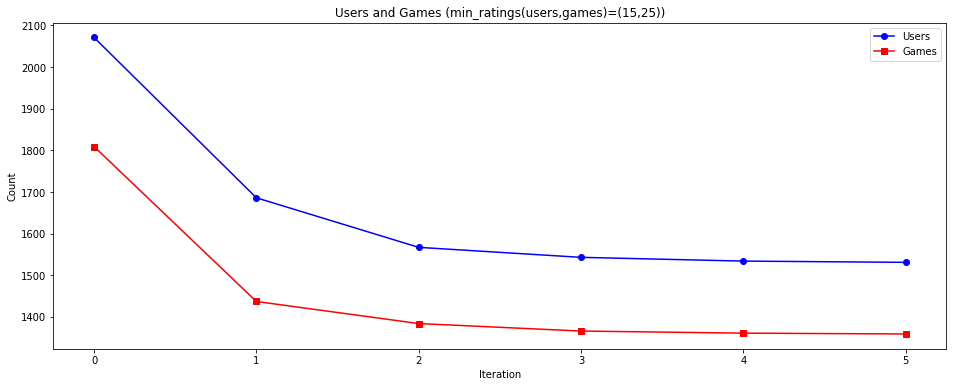

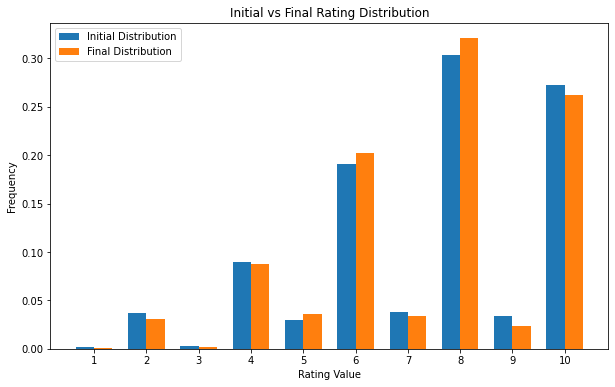


Filtering with min_ratings (min users,min games) = (16,25)
Iteration 0: 1975 users, 1809 games, 101342 ratings, KL-div: 0.0024
Iteration 1: 1571 users, 1422 games, 89322 ratings, KL-div: 0.0045
Iteration 2: 1473 users, 1362 games, 86604 ratings, KL-div: 0.0052
Iteration 3: 1453 users, 1342 games, 85838 ratings, KL-div: 0.0055
Iteration 4: 1444 users, 1338 games, 85609 ratings, KL-div: 0.0057
Iteration 5: 1441 users, 1334 games, 85468 ratings, KL-div: 0.0057
Converged after 6 iterations!
Number of users removed: 12182
Number of games removed: 15032


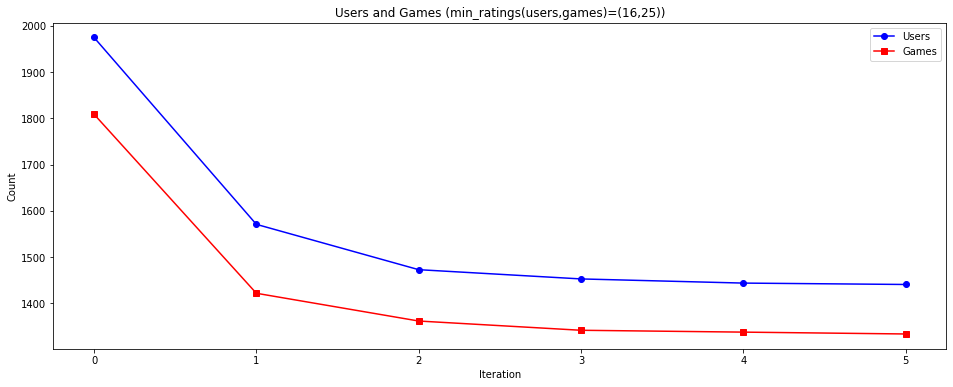

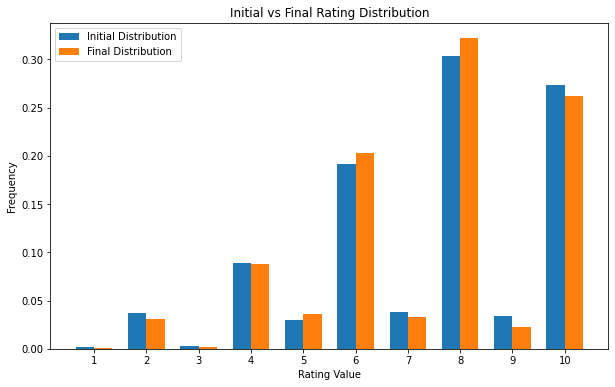


Filtering with min_ratings (min users,min games) = (18,25)
Iteration 0: 1794 users, 1809 games, 99087 ratings, KL-div: 0.0027
Iteration 1: 1439 users, 1397 games, 86797 ratings, KL-div: 0.0049
Iteration 2: 1324 users, 1336 games, 83600 ratings, KL-div: 0.0058
Iteration 3: 1303 users, 1301 games, 82427 ratings, KL-div: 0.0061
Iteration 4: 1290 users, 1296 games, 82089 ratings, KL-div: 0.0062
Iteration 5: 1287 users, 1290 games, 81895 ratings, KL-div: 0.0064
Iteration 6: 1284 users, 1289 games, 81820 ratings, KL-div: 0.0065
Iteration 7: 1284 users, 1288 games, 81796 ratings, KL-div: 0.0065
Iteration 8: 1282 users, 1288 games, 81762 ratings, KL-div: 0.0065
Converged after 9 iterations!
Number of users removed: 12341
Number of games removed: 15078


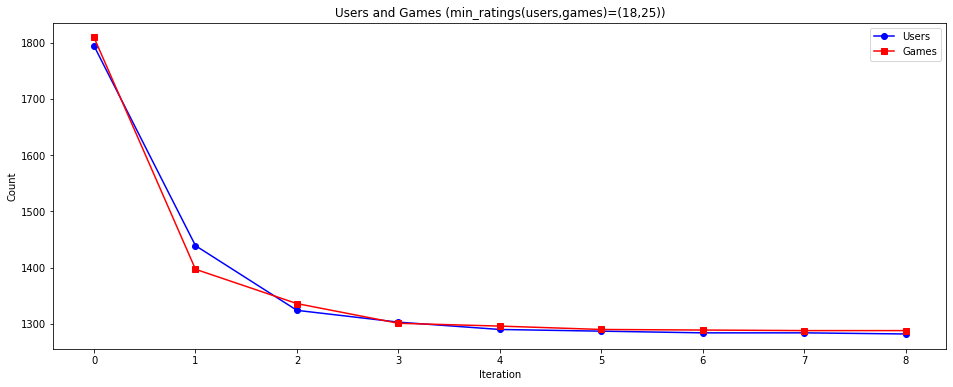

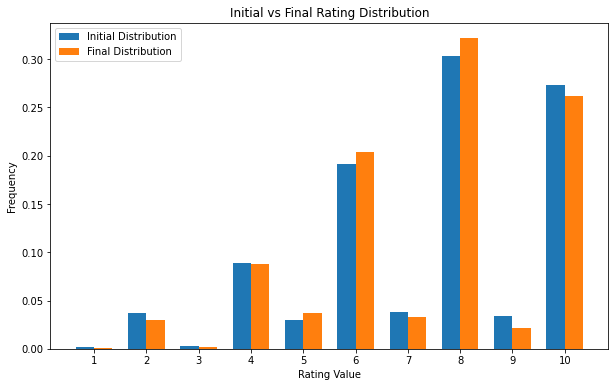


Filtering with min_ratings (min users,min games) = (20,25)
Iteration 0: 1631 users, 1809 games, 96871 ratings, KL-div: 0.0032
Iteration 1: 1317 users, 1373 games, 84249 ratings, KL-div: 0.0053
Iteration 2: 1202 users, 1302 games, 80608 ratings, KL-div: 0.0065
Iteration 3: 1185 users, 1270 games, 79545 ratings, KL-div: 0.0069
Iteration 4: 1175 users, 1265 games, 79237 ratings, KL-div: 0.0070
Iteration 5: 1173 users, 1260 games, 79079 ratings, KL-div: 0.0072
Iteration 6: 1172 users, 1260 games, 79060 ratings, KL-div: 0.0072
Iteration 7: 1172 users, 1259 games, 79036 ratings, KL-div: 0.0073
Iteration 8: 1171 users, 1259 games, 79017 ratings, KL-div: 0.0073
Converged after 9 iterations!
Number of users removed: 12452
Number of games removed: 15107


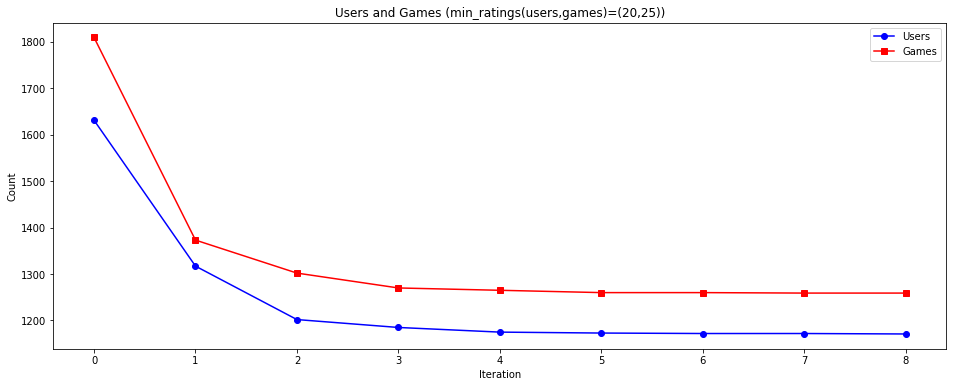

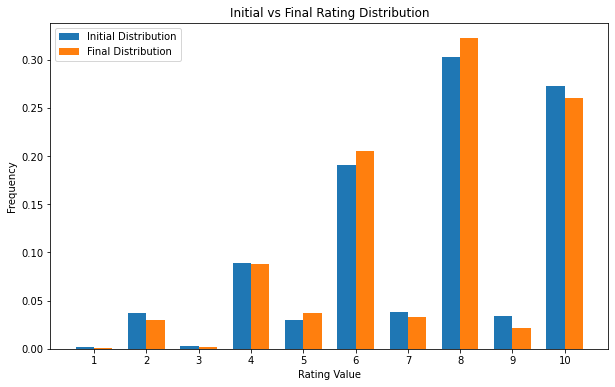


Filtering with min_ratings (min users,min games) = (22,25)
Iteration 0: 1520 users, 1809 games, 95084 ratings, KL-div: 0.0035
Iteration 1: 1221 users, 1358 games, 82133 ratings, KL-div: 0.0059
Iteration 2: 1105 users, 1281 games, 78183 ratings, KL-div: 0.0069
Iteration 3: 1075 users, 1236 games, 76519 ratings, KL-div: 0.0076
Iteration 4: 1064 users, 1224 games, 76011 ratings, KL-div: 0.0081
Iteration 5: 1061 users, 1218 games, 75808 ratings, KL-div: 0.0082
Iteration 6: 1058 users, 1215 games, 75673 ratings, KL-div: 0.0083
Iteration 7: 1055 users, 1213 games, 75563 ratings, KL-div: 0.0083
Iteration 8: 1055 users, 1211 games, 75515 ratings, KL-div: 0.0084
Iteration 9: 1054 users, 1211 games, 75494 ratings, KL-div: 0.0084


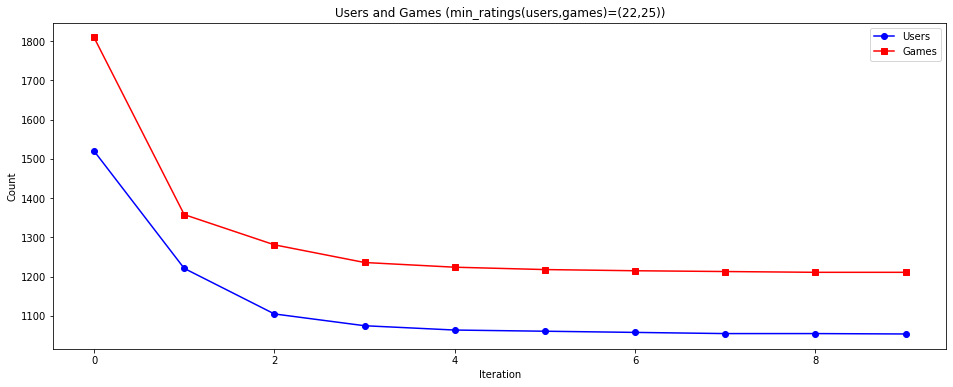

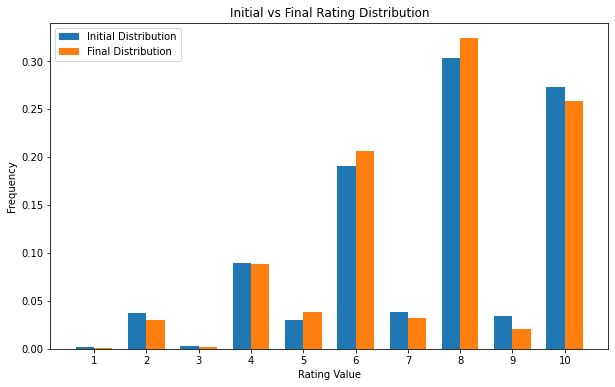


Filtering with min_ratings (min users,min games) = (25,25)
Iteration 0: 1372 users, 1809 games, 92530 ratings, KL-div: 0.0037
Iteration 1: 1096 users, 1321 games, 78787 ratings, KL-div: 0.0065
Iteration 2: 974 users, 1238 games, 74282 ratings, KL-div: 0.0080
Iteration 3: 947 users, 1185 games, 72427 ratings, KL-div: 0.0084
Iteration 4: 923 users, 1172 games, 71559 ratings, KL-div: 0.0092
Iteration 5: 918 users, 1162 games, 71210 ratings, KL-div: 0.0097
Iteration 6: 910 users, 1157 games, 70904 ratings, KL-div: 0.0105
Iteration 7: 910 users, 1154 games, 70832 ratings, KL-div: 0.0105
Iteration 8: 908 users, 1154 games, 70784 ratings, KL-div: 0.0106
Iteration 9: 908 users, 1152 games, 70736 ratings, KL-div: 0.0105


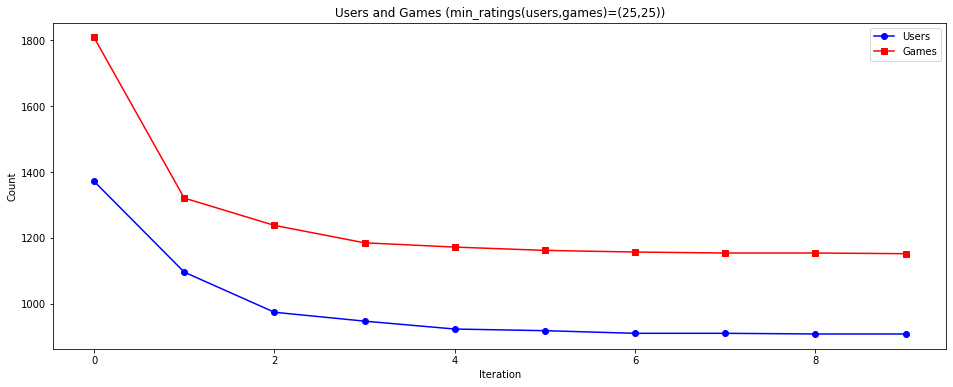

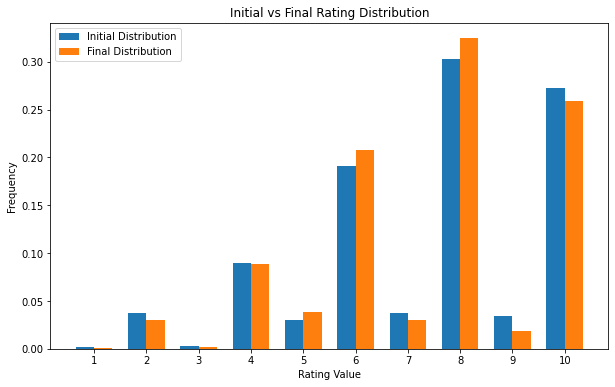

In [53]:
def pingpong(sparse_matrix, allusers, allgames, min_ratings_users, min_ratings_games, max_iterations=10, plot=True):
    """
    Iteratively filter the ratings matrix with KL-divergence tracking for information loss.
    """
    # Convert to COO format for easier filtering
    matrix = sparse_matrix.tocoo()
    users = np.array(allusers)
    games = np.array(allgames)
    
    history = []
    
    # Calculate initial rating distribution 
    # Assuming ratings are integers from 1-10
    rating_range = np.arange(1, 11) 
    initial_dist = np.zeros(len(rating_range))
    for i in range(len(rating_range)):
        initial_dist[i] = np.sum(matrix.data == rating_range[i])
    # Normalize to get probability distribution
    initial_dist = initial_dist / np.sum(initial_dist)
    
    iteration = 0
    n_users_removed = 0
    n_games_removed = 0
    
    while iteration < max_iterations:
        # Count ratings per game
        game_ratings = np.bincount(matrix.col, minlength=len(games))
        # Count ratings per user
        user_ratings = np.bincount(matrix.row, minlength=len(users))
        
        # Record stats before filtering
        n_users_before = len(users)
        n_games_before = len(games)
        
        # Find games with enough ratings
        valid_games = np.where(game_ratings >= min_ratings_games)[0]
        
        # Find users who rated enough games
        valid_users = np.where(user_ratings >= min_ratings_users)[0]
        
        if len(valid_games) == n_games_before and len(valid_users) == n_users_before:
            print(f"Converged after {iteration} iterations!")
            print("Number of users removed:", n_users_removed)
            print("Number of games removed:", n_games_removed)
            break
        
        # Filter matrix entries to keep only valid users and games
        keep = np.isin(matrix.row, valid_users) & np.isin(matrix.col, valid_games)
        
        # Create new COO matrix with filtered data
        new_row = matrix.row[keep]
        new_col = matrix.col[keep]
        new_data = matrix.data[keep]
        
        # Calculate current rating distribution
        current_dist = np.zeros(len(rating_range))
        for i in range(len(rating_range)):
            current_dist[i] = np.sum(new_data == rating_range[i])
        # Normalize
        current_dist = current_dist / np.sum(current_dist)
        
        # Calculate KL-divergence (with small epsilon to avoid division by zero)
        epsilon = 1e-10
        kl_divergence = np.sum(initial_dist * np.log((initial_dist + epsilon) / (current_dist + epsilon)))
        
        # Update row and column indices to match new dimensions
        row_mapping = {old: new for new, old in enumerate(valid_users)}
        col_mapping = {old: new for new, old in enumerate(valid_games)}
        
        new_row = np.array([row_mapping[r] for r in new_row])
        new_col = np.array([col_mapping[c] for c in new_col])
        
        # Create the new matrix
        matrix = csr_matrix((new_data, (new_row, new_col)), 
                           shape=(len(valid_users), len(valid_games)))
        # Convert back to COO for next iteration
        matrix = matrix.tocoo()
        
        # Update user and game lists
        users = users[valid_users]
        games = games[valid_games]
        
        # Increment counters
        n_users_removed += n_users_before - len(users)
        n_games_removed += n_games_before - len(games)
        
        # Record stats for this iteration
        history.append({
            'iteration': iteration,
            'users': len(users),
            'games': len(games),
            'kl_divergence': kl_divergence,  # Add KL-divergence to history
            'rating_distribution': current_dist.tolist()  # Store current distribution
        })
        
        print(f"Iteration {iteration}: {len(users)} users, {len(games)} games, {matrix.data.size} ratings, KL-div: {kl_divergence:.4f}")
        
        iteration += 1
    
    # Convert final matrix back to CSR for efficiency
    final_matrix = matrix.tocsr()
    
    # Plot the results
    if plot:
    
        fig, ax = plt.subplots(figsize=(16, 6))

        iterations = [h['iteration'] for h in history]

        # Plot users and games
        ax.plot(iterations, [h['users'] for h in history], 'b-', marker='o', label='Users')
        ax.plot(iterations, [h['games'] for h in history], 'r-', marker='s', label='Games')

        # Correctly use ax methods
        ax.set_ylabel('Count')
        ax.set_xlabel('Iteration')
        ax.set_title(f'Users and Games (min_ratings(users,games)=({min_ratings_users},{min_ratings_games}))')

        ax.legend()

        # Show the plot
        plt.show()
        # Also plot the initial vs final rating distribution
        if history:
            plt.figure(figsize=(10, 6))
            bar_width = 0.35
            x = np.arange(len(rating_range))
            
            plt.bar(x - bar_width/2, initial_dist, bar_width, label='Initial Distribution')
            plt.bar(x + bar_width/2, history[-1]['rating_distribution'], bar_width, label='Final Distribution')
            
            plt.xlabel('Rating Value')
            plt.ylabel('Frequency')
            plt.title('Initial vs Final Rating Distribution')
            plt.xticks(x, rating_range)
            plt.legend()
            plt.show()
  
    return final_matrix, users.tolist(), games.tolist(), history

# Run for different min_ratings values
results = {}

min_games = [10,11,12,13,14,15,16,18,20,22,25]
min_users = [10,11,12,13,14,15,16,18,20,22,25]

for g in min_games:
    for u in min_users:
        print(f"\nFiltering with min_ratings (min users,min games) = ({u},{g})")
        filtered_matrix, filtered_users, filtered_games, history = pingpong(
            sparse_ratings_matrix, allusers, allgames, u, g)

        results[(u,g)] = {
            'matrix': filtered_matrix,
            'users': filtered_users,
            'games': filtered_games,
            'history': history
        }


In [69]:
comparison_rows = []

for min_user in min_users:
    for min_game in min_games:
        key = (min_user, min_game)
        result = results[key]

        row_data = {
            'min_user_ratings': min_user,
            'min_game_ratings': min_game,
        }

        if 'users' in result:
            if isinstance(result['users'], (list, set, dict, np.ndarray)):
                row_data['users'] = len(result['users'])
            else:
                row_data['users'] = result['users']

        if 'games' in result:
            if isinstance(result['games'], (list, set, dict, np.ndarray)):
                row_data['games'] = len(result['games'])
            else:
                row_data['games'] = result['games']

        if 'matrix' in result and hasattr(result['matrix'], 'nnz'):
            row_data['ratings'] = result['matrix'].nnz
        elif 'ratings' in result:
            row_data['ratings'] = result['ratings']

        # Add KL-divergence from the last iteration
        if 'history' in result and result['history']:
            row_data['kl_divergence'] = result['history'][-1].get('kl_divergence', float('nan'))
        
        row_data["density"] = row_data['ratings'] / (row_data['users'] * row_data['games'])
        row_data['avg_ratings_per_user'] = row_data['ratings'] / row_data['users']
        row_data['avg_ratings_per_game'] = row_data['ratings'] / row_data['games']
        row_data['data_retention'] = row_data['ratings'] / sparse_ratings_matrix.nnz
        
        comparison_rows.append(row_data)
        
comparison_df = pd.DataFrame(comparison_rows)

# Normalize metrics to [0,1] scale
comparison_df["normalized_density"] = (comparison_df["density"] - comparison_df["density"].min()) / (comparison_df["density"].max() - comparison_df["density"].min())
comparison_df["normalized_retention"] = (comparison_df["data_retention"] - comparison_df["data_retention"].min()) / (comparison_df["data_retention"].max() - comparison_df["data_retention"].min())

# Normalize KL-divergence (lower is better, so invert)
kl_min = comparison_df["kl_divergence"].min()
kl_max = comparison_df["kl_divergence"].max()
comparison_df["normalized_kl"] = 1 - (comparison_df["kl_divergence"] - kl_min) / (kl_max - kl_min)


# Calculate harmonic mean with KL-divergence/fill rate / data retention
comparison_df["harmonic_mean"] = 3 * (comparison_df["normalized_density"] * comparison_df["normalized_retention"] * comparison_df["normalized_kl"]) / (
    comparison_df["normalized_density"] * comparison_df["normalized_retention"] + 
    comparison_df["normalized_density"] * comparison_df["normalized_kl"] + 
    comparison_df["normalized_retention"] * comparison_df["normalized_kl"]
)

# Define weights (must sum to 1)
w_density = 0.2      # Less weight for density
w_retention = 0.4    # More weight for data retention
w_kl = 0.4          # More weight for KL-divergence

# Calculate weighted harmonic mean
comparison_df["harmonic_mean"] = 1 / (
    w_density / comparison_df["normalized_density"] + 
    w_retention / comparison_df["normalized_retention"] + 
    w_kl / comparison_df["normalized_kl"]
)

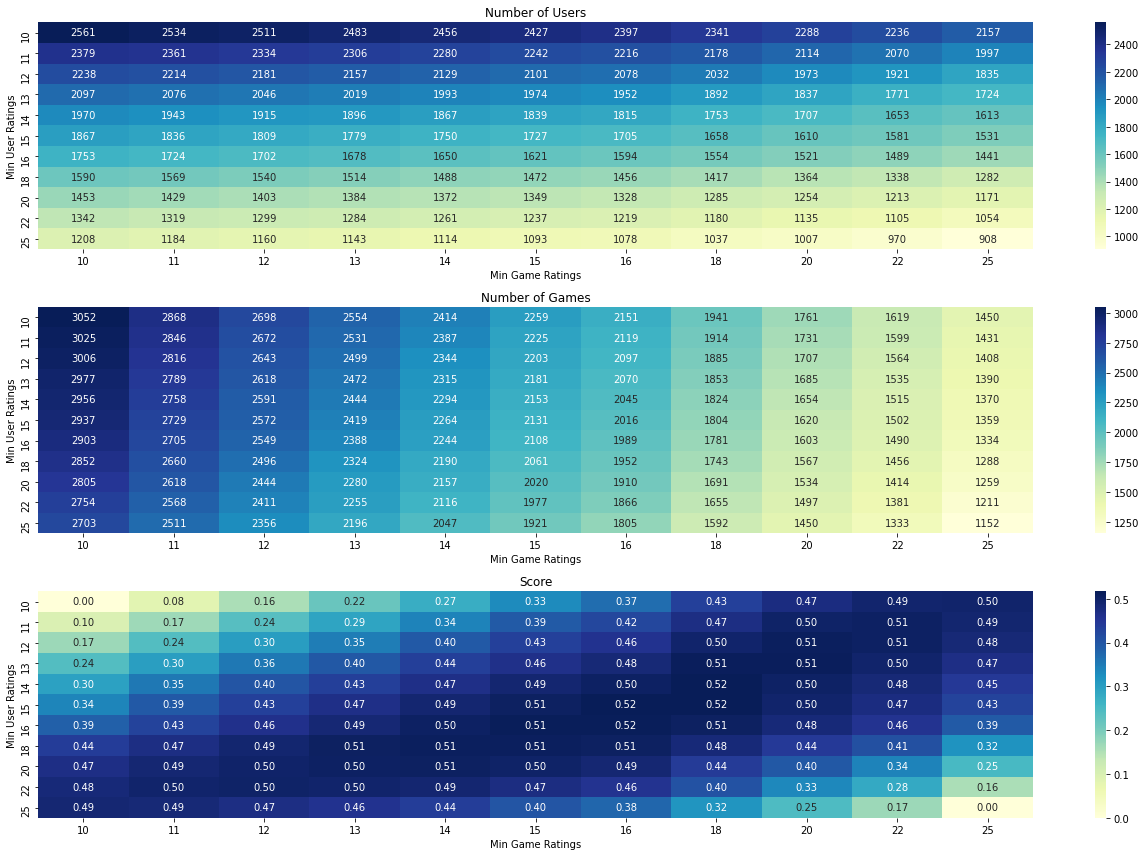

In [70]:
# Create heatmaps for key metrics
fig, axes = plt.subplots(3, 1, figsize=(18, 12))
axes = axes.flatten()

# Define which metrics to show in heatmaps
heatmap_metrics = ['users', 'games', 'harmonic_mean']
titles = ['Number of Users', 'Number of Games', 'Score']

for i, (metric, title) in enumerate(zip(heatmap_metrics, titles)):
    if i < len(axes) and metric in comparison_df.columns:
        pivot_data = comparison_df.pivot(index='min_user_ratings', columns='min_game_ratings', values=metric)
        # Use different colormap for KL-divergence (lower is better)
        cmap = "YlOrRd_r" if metric == 'kl_divergence' else "YlGnBu"
        sns.heatmap(pivot_data, annot=True, cmap=cmap, fmt=".4f" if metric in ['kl_divergence'] 
                   else ".2f" if metric in ['density', 'data_retention', 'harmonic_mean'] else ".0f", ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel('Min Game Ratings')
        axes[i].set_ylabel('Min User Ratings')

plt.tight_layout()
plt.show()

In [71]:
best_index = comparison_df["harmonic_mean"].argmax()
best_combo = comparison_df.iloc[best_index]
best_combo

min_user_ratings           14.000000
min_game_ratings           18.000000
users                    1753.000000
games                    1824.000000
ratings                 99928.000000
kl_divergence               0.003796
density                     0.031252
avg_ratings_per_user       57.003993
avg_ratings_per_game       54.785088
data_retention              0.567547
normalized_density          0.295422
normalized_retention        0.537240
normalized_kl               0.783693
harmonic_mean               0.517612
Name: 51, dtype: float64